In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Insert the directory
import sys
sys.path.insert(0,"/content/drive/MyDrive/Colab Notebooks/ONNMIST/new_code")

import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm

from model.ONN import ONNModel
from utils.loss_metrics import loss, grad, optimizer_init
from utils.utils_func import data_loader, detector_regions
import matplotlib.pyplot as plt




In [4]:
# Load parameters
downsample = 4
planeSpacing = 25.14e-3
wavelength = 1565e-9
pixelSize = downsample*8e-6
Nx = 256 / downsample # 64
Ny = 256 / downsample # 64
size = [64, 64]
epoch_num = 10
batch_size = 25

In [5]:
# Check devices
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print(f"Found GPU at: {device_name}\n")
else:
    device_name = "/device:CPU:0"
    print(f"No GPU found, using {device_name}\n")

Found GPU at: /device:GPU:0



In [6]:
#load date
train_set, train_lab, test_set, test_lab = data_loader(64)
#convert to tensors
tf_train_set = tf.convert_to_tensor(train_set[0:5000], dtype=tf.complex64)
# tf_test_set = tf.convert_to_tensor(test_set, dtype=tf.complex64)
tf_train_lab = train_lab[0:5000]

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
#initialize optimizer
learning_rate = 5e-3
optimizer = optimizer_init(learning_rate)

In [14]:
train_steps = int(len(tf_train_set) / batch_size)

In [8]:
with tf.device(device_name):
    ONN_block = ONNModel(size, planeSpacing, wavelength, Nx, Ny, pixelSize, 7)

In [17]:
with tf.device(device_name):
        
        # training loop
        for epoch in tqdm(range(epoch_num)):
                loss_avg = tf.keras.metrics.Mean()
                acc = tf.keras.metrics.CategoricalAccuracy()

                step_len = len(tf_train_set)
                lab_len = len(tf_train_lab)
                assert step_len == lab_len, "Train set and input label length not matched!"

                for step in tqdm(range(train_steps)):

                        x_batch = tf_train_set[step*batch_size:(step+1)*batch_size]
                        y_batch = tf_train_lab[step*batch_size:(step+1)*batch_size]
                
                        loss_val, grad_val = grad(ONN_block, y_batch, x_batch)
                        optimizer.apply_gradients(zip(grad_val, ONN_block.trainable_variables))

                        # Track progress
                        loss_avg.update_state(loss_val) # add current loss

                        # Update accuracy
                        y_pred = []
                        for z in range(len(x_batch)):
                            pred = ONN_block(x_batch[z], training=True)
                            y_pred.append(tf.argmax(detector_regions(pred)).numpy())
                        
                        acc.update_state(y_batch, y_pred)

                        print(f"\nStep :[{step+1}/{train_steps}]; Loss :{loss_avg.result():.4f}, Accuracy :{acc.result():.4%}")
                print(f"\nEpoch :[{epoch+1}/{epoch_num}]; Loss :{loss_avg.result():.4f}, Accuracy :{acc.result():.4%}")

        print("\nTraining completed!\n")

    

  0%|          | 1/200 [00:03<10:35,  3.19s/it]


Step :[1/200]; Loss :1.5414, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:38,  3.23s/it]


Step :[2/200]; Loss :1.5823, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:26,  3.18s/it]


Step :[3/200]; Loss :1.5090, Accuracy :0.0000%



  2%|▏         | 4/200 [00:14<12:56,  3.96s/it]


Step :[4/200]; Loss :1.4543, Accuracy :0.0000%



  2%|▎         | 5/200 [00:21<16:34,  5.10s/it]


Step :[5/200]; Loss :1.4348, Accuracy :20.0000%



  3%|▎         | 6/200 [00:24<14:15,  4.41s/it]


Step :[6/200]; Loss :1.4770, Accuracy :33.3333%



  4%|▎         | 7/200 [00:28<12:51,  4.00s/it]


Step :[7/200]; Loss :1.4860, Accuracy :28.5714%



  4%|▍         | 8/200 [00:31<11:58,  3.74s/it]


Step :[8/200]; Loss :1.5074, Accuracy :37.5000%



  4%|▍         | 9/200 [00:34<11:35,  3.64s/it]


Step :[9/200]; Loss :1.4818, Accuracy :44.4444%



  5%|▌         | 10/200 [00:37<11:11,  3.53s/it]


Step :[10/200]; Loss :1.4795, Accuracy :50.0000%



  6%|▌         | 11/200 [00:41<10:45,  3.42s/it]


Step :[11/200]; Loss :1.4914, Accuracy :45.4545%



  6%|▌         | 12/200 [00:44<10:27,  3.34s/it]


Step :[12/200]; Loss :1.4780, Accuracy :50.0000%



  6%|▋         | 13/200 [00:47<10:12,  3.28s/it]


Step :[13/200]; Loss :1.4744, Accuracy :46.1538%



  7%|▋         | 14/200 [00:50<10:01,  3.23s/it]


Step :[14/200]; Loss :1.4698, Accuracy :42.8571%



  8%|▊         | 15/200 [00:53<09:53,  3.21s/it]


Step :[15/200]; Loss :1.4682, Accuracy :46.6667%



  8%|▊         | 16/200 [00:56<09:43,  3.17s/it]


Step :[16/200]; Loss :1.4660, Accuracy :50.0000%



  8%|▊         | 17/200 [00:59<09:35,  3.14s/it]


Step :[17/200]; Loss :1.4801, Accuracy :52.9412%



  9%|▉         | 18/200 [01:02<09:31,  3.14s/it]


Step :[18/200]; Loss :1.4727, Accuracy :50.0000%



 10%|▉         | 19/200 [01:06<09:25,  3.13s/it]


Step :[19/200]; Loss :1.4654, Accuracy :47.3684%



 10%|█         | 20/200 [01:09<09:23,  3.13s/it]


Step :[20/200]; Loss :1.4740, Accuracy :50.0000%



 10%|█         | 21/200 [01:12<09:18,  3.12s/it]


Step :[21/200]; Loss :1.4875, Accuracy :47.6190%



 11%|█         | 22/200 [01:15<09:13,  3.11s/it]


Step :[22/200]; Loss :1.4972, Accuracy :50.0000%



 12%|█▏        | 23/200 [01:18<09:15,  3.14s/it]


Step :[23/200]; Loss :1.5000, Accuracy :52.1739%



 12%|█▏        | 24/200 [01:21<09:18,  3.17s/it]


Step :[24/200]; Loss :1.5082, Accuracy :54.1667%



 12%|█▎        | 25/200 [01:25<09:26,  3.24s/it]


Step :[25/200]; Loss :1.5184, Accuracy :52.0000%



 13%|█▎        | 26/200 [01:28<09:15,  3.19s/it]


Step :[26/200]; Loss :1.5280, Accuracy :50.0000%



 14%|█▎        | 27/200 [01:31<09:08,  3.17s/it]


Step :[27/200]; Loss :1.5315, Accuracy :48.1481%



 14%|█▍        | 28/200 [01:34<08:58,  3.13s/it]


Step :[28/200]; Loss :1.5294, Accuracy :50.0000%



 14%|█▍        | 29/200 [01:37<08:54,  3.13s/it]


Step :[29/200]; Loss :1.5265, Accuracy :48.2759%



 15%|█▌        | 30/200 [01:40<08:50,  3.12s/it]


Step :[30/200]; Loss :1.5254, Accuracy :50.0000%



 16%|█▌        | 31/200 [01:43<08:46,  3.11s/it]


Step :[31/200]; Loss :1.5224, Accuracy :48.3871%



 16%|█▌        | 32/200 [01:46<08:41,  3.10s/it]


Step :[32/200]; Loss :1.5208, Accuracy :46.8750%



 16%|█▋        | 33/200 [01:49<08:35,  3.09s/it]


Step :[33/200]; Loss :1.5199, Accuracy :48.4848%



 17%|█▋        | 34/200 [01:53<08:31,  3.08s/it]


Step :[34/200]; Loss :1.5190, Accuracy :47.0588%



 18%|█▊        | 35/200 [01:56<08:30,  3.09s/it]


Step :[35/200]; Loss :1.5180, Accuracy :45.7143%



 18%|█▊        | 36/200 [01:59<08:26,  3.09s/it]


Step :[36/200]; Loss :1.5180, Accuracy :44.4444%



 18%|█▊        | 37/200 [02:02<08:34,  3.15s/it]


Step :[37/200]; Loss :1.5227, Accuracy :45.9459%



 19%|█▉        | 38/200 [02:05<08:26,  3.13s/it]


Step :[38/200]; Loss :1.5239, Accuracy :44.7368%



 20%|█▉        | 39/200 [02:08<08:20,  3.11s/it]


Step :[39/200]; Loss :1.5262, Accuracy :43.5897%



 20%|██        | 40/200 [02:11<08:20,  3.13s/it]


Step :[40/200]; Loss :1.5254, Accuracy :45.0000%



 20%|██        | 41/200 [02:15<09:02,  3.41s/it]


Step :[41/200]; Loss :1.5302, Accuracy :43.9024%



 21%|██        | 42/200 [02:19<09:23,  3.57s/it]


Step :[42/200]; Loss :1.5326, Accuracy :42.8571%



 22%|██▏       | 43/200 [02:22<08:56,  3.42s/it]


Step :[43/200]; Loss :1.5382, Accuracy :41.8605%



 22%|██▏       | 44/200 [02:25<08:37,  3.31s/it]


Step :[44/200]; Loss :1.5389, Accuracy :40.9091%



 22%|██▎       | 45/200 [02:29<08:24,  3.25s/it]


Step :[45/200]; Loss :1.5435, Accuracy :40.0000%



 23%|██▎       | 46/200 [02:32<08:17,  3.23s/it]


Step :[46/200]; Loss :1.5486, Accuracy :39.1304%



 24%|██▎       | 47/200 [02:35<08:07,  3.19s/it]


Step :[47/200]; Loss :1.5526, Accuracy :38.2979%



 24%|██▍       | 48/200 [02:38<08:04,  3.19s/it]


Step :[48/200]; Loss :1.5463, Accuracy :37.5000%



 24%|██▍       | 49/200 [02:41<07:58,  3.17s/it]


Step :[49/200]; Loss :1.5436, Accuracy :36.7347%



 25%|██▌       | 50/200 [02:44<07:49,  3.13s/it]


Step :[50/200]; Loss :1.5450, Accuracy :36.0000%



 26%|██▌       | 51/200 [02:47<07:44,  3.12s/it]


Step :[51/200]; Loss :1.5400, Accuracy :35.2941%



 26%|██▌       | 52/200 [02:50<07:42,  3.13s/it]


Step :[52/200]; Loss :1.5412, Accuracy :34.6154%



 26%|██▋       | 53/200 [02:53<07:36,  3.10s/it]


Step :[53/200]; Loss :1.5383, Accuracy :33.9623%



 27%|██▋       | 54/200 [02:57<07:31,  3.09s/it]


Step :[54/200]; Loss :1.5377, Accuracy :33.3333%



 28%|██▊       | 55/200 [03:00<07:28,  3.09s/it]


Step :[55/200]; Loss :1.5348, Accuracy :32.7273%



 28%|██▊       | 56/200 [03:03<07:30,  3.13s/it]


Step :[56/200]; Loss :1.5309, Accuracy :33.9286%



 28%|██▊       | 57/200 [03:06<07:24,  3.11s/it]


Step :[57/200]; Loss :1.5321, Accuracy :33.3333%



 29%|██▉       | 58/200 [03:09<07:21,  3.11s/it]


Step :[58/200]; Loss :1.5318, Accuracy :34.4828%



 30%|██▉       | 59/200 [03:12<07:18,  3.11s/it]


Step :[59/200]; Loss :1.5324, Accuracy :33.8983%



 30%|███       | 60/200 [03:15<07:15,  3.11s/it]


Step :[60/200]; Loss :1.5298, Accuracy :35.0000%



 30%|███       | 61/200 [03:18<07:10,  3.10s/it]


Step :[61/200]; Loss :1.5313, Accuracy :36.0656%



 31%|███       | 62/200 [03:21<07:08,  3.11s/it]


Step :[62/200]; Loss :1.5321, Accuracy :37.0968%



 32%|███▏      | 63/200 [03:25<07:09,  3.14s/it]


Step :[63/200]; Loss :1.5345, Accuracy :38.0952%



 32%|███▏      | 64/200 [03:28<07:05,  3.13s/it]


Step :[64/200]; Loss :1.5351, Accuracy :37.5000%



 32%|███▎      | 65/200 [03:31<07:00,  3.12s/it]


Step :[65/200]; Loss :1.5359, Accuracy :36.9231%



 33%|███▎      | 66/200 [03:34<06:59,  3.13s/it]


Step :[66/200]; Loss :1.5319, Accuracy :36.3636%



 34%|███▎      | 67/200 [03:37<06:54,  3.12s/it]


Step :[67/200]; Loss :1.5331, Accuracy :37.3134%



 34%|███▍      | 68/200 [03:40<06:50,  3.11s/it]


Step :[68/200]; Loss :1.5314, Accuracy :36.7647%



 34%|███▍      | 69/200 [03:43<06:47,  3.11s/it]


Step :[69/200]; Loss :1.5288, Accuracy :37.6812%



 35%|███▌      | 70/200 [03:46<06:42,  3.10s/it]


Step :[70/200]; Loss :1.5267, Accuracy :37.1429%



 36%|███▌      | 71/200 [03:49<06:37,  3.08s/it]


Step :[71/200]; Loss :1.5263, Accuracy :38.0282%



 36%|███▌      | 72/200 [03:52<06:33,  3.08s/it]


Step :[72/200]; Loss :1.5242, Accuracy :37.5000%



 36%|███▋      | 73/200 [03:56<06:31,  3.08s/it]


Step :[73/200]; Loss :1.5263, Accuracy :38.3562%



 37%|███▋      | 74/200 [03:59<06:29,  3.09s/it]


Step :[74/200]; Loss :1.5243, Accuracy :37.8378%



 38%|███▊      | 75/200 [04:02<06:28,  3.10s/it]


Step :[75/200]; Loss :1.5233, Accuracy :38.6667%



 38%|███▊      | 76/200 [04:05<06:27,  3.12s/it]


Step :[76/200]; Loss :1.5235, Accuracy :38.1579%



 38%|███▊      | 77/200 [04:08<06:22,  3.11s/it]


Step :[77/200]; Loss :1.5231, Accuracy :38.9610%



 39%|███▉      | 78/200 [04:11<06:19,  3.11s/it]


Step :[78/200]; Loss :1.5234, Accuracy :38.4615%



 40%|███▉      | 79/200 [04:14<06:15,  3.11s/it]


Step :[79/200]; Loss :1.5224, Accuracy :37.9747%



 40%|████      | 80/200 [04:17<06:14,  3.12s/it]


Step :[80/200]; Loss :1.5217, Accuracy :37.5000%



 40%|████      | 81/200 [04:21<06:10,  3.11s/it]


Step :[81/200]; Loss :1.5199, Accuracy :38.2716%



 41%|████      | 82/200 [04:24<06:06,  3.10s/it]


Step :[82/200]; Loss :1.5198, Accuracy :37.8049%



 42%|████▏     | 83/200 [04:27<06:02,  3.10s/it]


Step :[83/200]; Loss :1.5183, Accuracy :38.5542%



 42%|████▏     | 84/200 [04:30<05:59,  3.10s/it]


Step :[84/200]; Loss :1.5162, Accuracy :39.2857%



 42%|████▎     | 85/200 [04:33<05:58,  3.12s/it]


Step :[85/200]; Loss :1.5138, Accuracy :38.8235%



 43%|████▎     | 86/200 [04:36<05:55,  3.12s/it]


Step :[86/200]; Loss :1.5134, Accuracy :38.3721%



 44%|████▎     | 87/200 [04:39<05:51,  3.11s/it]


Step :[87/200]; Loss :1.5110, Accuracy :39.0805%



 44%|████▍     | 88/200 [04:42<05:51,  3.14s/it]


Step :[88/200]; Loss :1.5094, Accuracy :38.6364%



 44%|████▍     | 89/200 [04:45<05:47,  3.13s/it]


Step :[89/200]; Loss :1.5100, Accuracy :39.3258%



 45%|████▌     | 90/200 [04:49<05:42,  3.12s/it]


Step :[90/200]; Loss :1.5090, Accuracy :40.0000%



 46%|████▌     | 91/200 [04:52<05:39,  3.11s/it]


Step :[91/200]; Loss :1.5077, Accuracy :40.6593%



 46%|████▌     | 92/200 [04:55<05:35,  3.11s/it]


Step :[92/200]; Loss :1.5084, Accuracy :40.2174%



 46%|████▋     | 93/200 [04:58<05:33,  3.11s/it]


Step :[93/200]; Loss :1.5097, Accuracy :40.8602%



 47%|████▋     | 94/200 [05:01<05:29,  3.11s/it]


Step :[94/200]; Loss :1.5094, Accuracy :40.4255%



 48%|████▊     | 95/200 [05:04<05:29,  3.14s/it]


Step :[95/200]; Loss :1.5093, Accuracy :41.0526%



 48%|████▊     | 96/200 [05:07<05:24,  3.12s/it]


Step :[96/200]; Loss :1.5094, Accuracy :40.6250%



 48%|████▊     | 97/200 [05:10<05:22,  3.13s/it]


Step :[97/200]; Loss :1.5107, Accuracy :41.2371%



 49%|████▉     | 98/200 [05:14<05:19,  3.13s/it]


Step :[98/200]; Loss :1.5124, Accuracy :41.8367%



 50%|████▉     | 99/200 [05:17<05:16,  3.13s/it]


Step :[99/200]; Loss :1.5125, Accuracy :41.4141%



 50%|█████     | 100/200 [05:20<05:13,  3.13s/it]


Step :[100/200]; Loss :1.5114, Accuracy :42.0000%



 50%|█████     | 101/200 [05:23<05:09,  3.12s/it]


Step :[101/200]; Loss :1.5104, Accuracy :41.5842%



 51%|█████     | 102/200 [05:26<05:05,  3.11s/it]


Step :[102/200]; Loss :1.5097, Accuracy :41.1765%



 52%|█████▏    | 103/200 [05:29<05:00,  3.10s/it]


Step :[103/200]; Loss :1.5101, Accuracy :40.7767%



 52%|█████▏    | 104/200 [05:32<04:58,  3.11s/it]


Step :[104/200]; Loss :1.5094, Accuracy :40.3846%



 52%|█████▎    | 105/200 [05:36<05:18,  3.35s/it]


Step :[105/200]; Loss :1.5094, Accuracy :40.9524%



 53%|█████▎    | 106/200 [05:40<05:32,  3.53s/it]


Step :[106/200]; Loss :1.5086, Accuracy :40.5660%



 54%|█████▎    | 107/200 [05:43<05:17,  3.41s/it]


Step :[107/200]; Loss :1.5076, Accuracy :41.1215%



 54%|█████▍    | 108/200 [05:46<05:04,  3.31s/it]


Step :[108/200]; Loss :1.5082, Accuracy :41.6667%



 55%|█████▍    | 109/200 [05:49<04:57,  3.26s/it]


Step :[109/200]; Loss :1.5089, Accuracy :41.2844%



 55%|█████▌    | 110/200 [05:53<04:50,  3.23s/it]


Step :[110/200]; Loss :1.5087, Accuracy :40.9091%



 56%|█████▌    | 111/200 [05:56<04:45,  3.21s/it]


Step :[111/200]; Loss :1.5095, Accuracy :40.5405%



 56%|█████▌    | 112/200 [05:59<04:40,  3.19s/it]


Step :[112/200]; Loss :1.5098, Accuracy :40.1786%



 56%|█████▋    | 113/200 [06:02<04:37,  3.19s/it]


Step :[113/200]; Loss :1.5097, Accuracy :39.8230%



 57%|█████▋    | 114/200 [06:05<04:33,  3.18s/it]


Step :[114/200]; Loss :1.5085, Accuracy :39.4737%



 57%|█████▊    | 115/200 [06:08<04:28,  3.16s/it]


Step :[115/200]; Loss :1.5071, Accuracy :39.1304%



 58%|█████▊    | 116/200 [06:11<04:24,  3.15s/it]


Step :[116/200]; Loss :1.5042, Accuracy :39.6552%



 58%|█████▊    | 117/200 [06:15<04:22,  3.16s/it]


Step :[117/200]; Loss :1.5047, Accuracy :40.1709%



 59%|█████▉    | 118/200 [06:18<04:17,  3.15s/it]


Step :[118/200]; Loss :1.5043, Accuracy :39.8305%



 60%|█████▉    | 119/200 [06:21<04:17,  3.18s/it]


Step :[119/200]; Loss :1.5048, Accuracy :39.4958%



 60%|██████    | 120/200 [06:24<04:13,  3.16s/it]


Step :[120/200]; Loss :1.5050, Accuracy :39.1667%



 60%|██████    | 121/200 [06:27<04:08,  3.14s/it]


Step :[121/200]; Loss :1.5048, Accuracy :38.8430%



 61%|██████    | 122/200 [06:30<04:03,  3.13s/it]


Step :[122/200]; Loss :1.5057, Accuracy :38.5246%



 62%|██████▏   | 123/200 [06:33<04:00,  3.12s/it]


Step :[123/200]; Loss :1.5074, Accuracy :38.2114%



 62%|██████▏   | 124/200 [06:37<03:56,  3.11s/it]


Step :[124/200]; Loss :1.5088, Accuracy :37.9032%



 62%|██████▎   | 125/200 [06:40<03:52,  3.10s/it]


Step :[125/200]; Loss :1.5088, Accuracy :37.6000%



 63%|██████▎   | 126/200 [06:43<03:53,  3.15s/it]


Step :[126/200]; Loss :1.5084, Accuracy :37.3016%



 64%|██████▎   | 127/200 [06:46<03:49,  3.15s/it]


Step :[127/200]; Loss :1.5093, Accuracy :37.0079%



 64%|██████▍   | 128/200 [06:49<03:46,  3.15s/it]


Step :[128/200]; Loss :1.5091, Accuracy :36.7188%



 64%|██████▍   | 129/200 [06:52<03:42,  3.13s/it]


Step :[129/200]; Loss :1.5105, Accuracy :36.4341%



 65%|██████▌   | 130/200 [06:55<03:38,  3.13s/it]


Step :[130/200]; Loss :1.5103, Accuracy :36.1538%



 66%|██████▌   | 131/200 [06:58<03:35,  3.12s/it]


Step :[131/200]; Loss :1.5114, Accuracy :35.8779%



 66%|██████▌   | 132/200 [07:02<03:31,  3.11s/it]


Step :[132/200]; Loss :1.5116, Accuracy :36.3636%



 66%|██████▋   | 133/200 [07:05<03:27,  3.10s/it]


Step :[133/200]; Loss :1.5124, Accuracy :36.0902%



 67%|██████▋   | 134/200 [07:08<03:27,  3.14s/it]


Step :[134/200]; Loss :1.5101, Accuracy :35.8209%



 68%|██████▊   | 135/200 [07:11<03:24,  3.15s/it]


Step :[135/200]; Loss :1.5123, Accuracy :35.5556%



 68%|██████▊   | 136/200 [07:14<03:20,  3.13s/it]


Step :[136/200]; Loss :1.5121, Accuracy :35.2941%



 68%|██████▊   | 137/200 [07:17<03:16,  3.13s/it]


Step :[137/200]; Loss :1.5122, Accuracy :35.0365%



 69%|██████▉   | 138/200 [07:20<03:13,  3.13s/it]


Step :[138/200]; Loss :1.5127, Accuracy :34.7826%



 70%|██████▉   | 139/200 [07:23<03:09,  3.11s/it]


Step :[139/200]; Loss :1.5136, Accuracy :34.5324%



 70%|███████   | 140/200 [07:27<03:05,  3.09s/it]


Step :[140/200]; Loss :1.5133, Accuracy :34.2857%



 70%|███████   | 141/200 [07:30<03:03,  3.11s/it]


Step :[141/200]; Loss :1.5149, Accuracy :34.0426%



 71%|███████   | 142/200 [07:33<03:00,  3.11s/it]


Step :[142/200]; Loss :1.5157, Accuracy :33.8028%



 72%|███████▏  | 143/200 [07:36<02:56,  3.10s/it]


Step :[143/200]; Loss :1.5149, Accuracy :33.5664%



 72%|███████▏  | 144/200 [07:39<02:55,  3.14s/it]


Step :[144/200]; Loss :1.5149, Accuracy :33.3333%



 72%|███████▎  | 145/200 [07:42<02:54,  3.18s/it]


Step :[145/200]; Loss :1.5130, Accuracy :33.1034%



 73%|███████▎  | 146/200 [07:45<02:50,  3.15s/it]


Step :[146/200]; Loss :1.5132, Accuracy :33.5616%



 74%|███████▎  | 147/200 [07:49<02:46,  3.13s/it]


Step :[147/200]; Loss :1.5114, Accuracy :33.3333%



 74%|███████▍  | 148/200 [07:52<02:42,  3.12s/it]


Step :[148/200]; Loss :1.5110, Accuracy :33.1081%



 74%|███████▍  | 149/200 [07:55<02:39,  3.13s/it]


Step :[149/200]; Loss :1.5101, Accuracy :32.8859%



 75%|███████▌  | 150/200 [07:58<02:37,  3.14s/it]


Step :[150/200]; Loss :1.5101, Accuracy :32.6667%



 76%|███████▌  | 151/200 [08:01<02:33,  3.13s/it]


Step :[151/200]; Loss :1.5107, Accuracy :32.4503%



 76%|███████▌  | 152/200 [08:04<02:30,  3.14s/it]


Step :[152/200]; Loss :1.5107, Accuracy :32.8947%



 76%|███████▋  | 153/200 [08:07<02:27,  3.14s/it]


Step :[153/200]; Loss :1.5113, Accuracy :33.3333%



 77%|███████▋  | 154/200 [08:11<02:25,  3.17s/it]


Step :[154/200]; Loss :1.5106, Accuracy :33.1169%



 78%|███████▊  | 155/200 [08:14<02:23,  3.18s/it]


Step :[155/200]; Loss :1.5113, Accuracy :33.5484%



 78%|███████▊  | 156/200 [08:18<02:35,  3.52s/it]


Step :[156/200]; Loss :1.5103, Accuracy :33.3333%



 78%|███████▊  | 157/200 [08:22<02:33,  3.57s/it]


Step :[157/200]; Loss :1.5109, Accuracy :33.1210%



 79%|███████▉  | 158/200 [08:25<02:24,  3.44s/it]


Step :[158/200]; Loss :1.5106, Accuracy :32.9114%



 80%|███████▉  | 159/200 [08:28<02:16,  3.32s/it]


Step :[159/200]; Loss :1.5105, Accuracy :33.3333%



 80%|████████  | 160/200 [08:31<02:10,  3.26s/it]


Step :[160/200]; Loss :1.5110, Accuracy :33.1250%



 80%|████████  | 161/200 [08:34<02:05,  3.21s/it]


Step :[161/200]; Loss :1.5109, Accuracy :33.5404%



 81%|████████  | 162/200 [08:37<02:00,  3.18s/it]


Step :[162/200]; Loss :1.5108, Accuracy :33.3333%



 82%|████████▏ | 163/200 [08:40<01:57,  3.18s/it]


Step :[163/200]; Loss :1.5112, Accuracy :33.7423%



 82%|████████▏ | 164/200 [08:44<01:54,  3.18s/it]


Step :[164/200]; Loss :1.5112, Accuracy :33.5366%



 82%|████████▎ | 165/200 [08:47<01:49,  3.14s/it]


Step :[165/200]; Loss :1.5111, Accuracy :33.3333%



 83%|████████▎ | 166/200 [08:50<01:45,  3.12s/it]


Step :[166/200]; Loss :1.5117, Accuracy :33.1325%



 84%|████████▎ | 167/200 [08:53<01:41,  3.09s/it]


Step :[167/200]; Loss :1.5124, Accuracy :32.9341%



 84%|████████▍ | 168/200 [08:56<01:38,  3.09s/it]


Step :[168/200]; Loss :1.5122, Accuracy :33.3333%



 84%|████████▍ | 169/200 [08:59<01:36,  3.12s/it]


Step :[169/200]; Loss :1.5124, Accuracy :33.1361%



 85%|████████▌ | 170/200 [09:02<01:33,  3.11s/it]


Step :[170/200]; Loss :1.5119, Accuracy :32.9412%



 86%|████████▌ | 171/200 [09:05<01:30,  3.10s/it]


Step :[171/200]; Loss :1.5120, Accuracy :32.7485%



 86%|████████▌ | 172/200 [09:08<01:27,  3.12s/it]


Step :[172/200]; Loss :1.5111, Accuracy :33.1395%



 86%|████████▋ | 173/200 [09:12<01:24,  3.12s/it]


Step :[173/200]; Loss :1.5118, Accuracy :33.5260%



 87%|████████▋ | 174/200 [09:15<01:21,  3.12s/it]


Step :[174/200]; Loss :1.5124, Accuracy :33.3333%



 88%|████████▊ | 175/200 [09:18<01:17,  3.11s/it]


Step :[175/200]; Loss :1.5126, Accuracy :33.1429%



 88%|████████▊ | 176/200 [09:21<01:14,  3.12s/it]


Step :[176/200]; Loss :1.5140, Accuracy :32.9545%



 88%|████████▊ | 177/200 [09:24<01:11,  3.12s/it]


Step :[177/200]; Loss :1.5145, Accuracy :33.3333%



 89%|████████▉ | 178/200 [09:27<01:08,  3.12s/it]


Step :[178/200]; Loss :1.5148, Accuracy :33.1461%



 90%|████████▉ | 179/200 [09:30<01:05,  3.12s/it]


Step :[179/200]; Loss :1.5151, Accuracy :32.9609%



 90%|█████████ | 180/200 [09:33<01:02,  3.12s/it]


Step :[180/200]; Loss :1.5151, Accuracy :32.7778%



 90%|█████████ | 181/200 [09:36<00:59,  3.12s/it]


Step :[181/200]; Loss :1.5144, Accuracy :32.5967%



 91%|█████████ | 182/200 [09:40<00:56,  3.11s/it]


Step :[182/200]; Loss :1.5133, Accuracy :32.4176%



 92%|█████████▏| 183/200 [09:43<00:52,  3.11s/it]


Step :[183/200]; Loss :1.5125, Accuracy :32.2404%



 92%|█████████▏| 184/200 [09:46<00:49,  3.11s/it]


Step :[184/200]; Loss :1.5111, Accuracy :32.6087%



 92%|█████████▎| 185/200 [09:49<00:46,  3.12s/it]


Step :[185/200]; Loss :1.5110, Accuracy :32.4324%



 93%|█████████▎| 186/200 [09:52<00:43,  3.11s/it]


Step :[186/200]; Loss :1.5110, Accuracy :32.7957%



 94%|█████████▎| 187/200 [09:55<00:40,  3.09s/it]


Step :[187/200]; Loss :1.5099, Accuracy :33.1551%



 94%|█████████▍| 188/200 [09:58<00:37,  3.10s/it]


Step :[188/200]; Loss :1.5098, Accuracy :32.9787%



 94%|█████████▍| 189/200 [10:01<00:33,  3.09s/it]


Step :[189/200]; Loss :1.5094, Accuracy :32.8042%



 95%|█████████▌| 190/200 [10:04<00:30,  3.09s/it]


Step :[190/200]; Loss :1.5089, Accuracy :32.6316%



 96%|█████████▌| 191/200 [10:07<00:27,  3.11s/it]


Step :[191/200]; Loss :1.5097, Accuracy :32.9843%



 96%|█████████▌| 192/200 [10:11<00:25,  3.14s/it]


Step :[192/200]; Loss :1.5099, Accuracy :32.8125%



 96%|█████████▋| 193/200 [10:14<00:21,  3.13s/it]


Step :[193/200]; Loss :1.5111, Accuracy :32.6425%



 97%|█████████▋| 194/200 [10:17<00:18,  3.14s/it]


Step :[194/200]; Loss :1.5115, Accuracy :32.9897%



 98%|█████████▊| 195/200 [10:20<00:15,  3.15s/it]


Step :[195/200]; Loss :1.5111, Accuracy :32.8205%



 98%|█████████▊| 196/200 [10:23<00:12,  3.13s/it]


Step :[196/200]; Loss :1.5100, Accuracy :33.1633%



 98%|█████████▊| 197/200 [10:26<00:09,  3.11s/it]


Step :[197/200]; Loss :1.5100, Accuracy :33.5025%



 99%|█████████▉| 198/200 [10:29<00:06,  3.11s/it]


Step :[198/200]; Loss :1.5107, Accuracy :33.3333%



100%|█████████▉| 199/200 [10:33<00:03,  3.12s/it]


Step :[199/200]; Loss :1.5109, Accuracy :33.1658%



 10%|█         | 1/10 [10:36<1:35:26, 636.30s/it]


Step :[200/200]; Loss :1.5107, Accuracy :33.5000%

Epoch :[1/10]; Loss :1.5107, Accuracy :33.5000%



  0%|          | 1/200 [00:03<10:07,  3.05s/it]


Step :[1/200]; Loss :1.5331, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:22,  3.14s/it]


Step :[2/200]; Loss :1.5743, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:10,  3.10s/it]


Step :[3/200]; Loss :1.5008, Accuracy :0.0000%



  2%|▏         | 4/200 [00:12<10:02,  3.08s/it]


Step :[4/200]; Loss :1.4455, Accuracy :0.0000%



  2%|▎         | 5/200 [00:15<09:59,  3.08s/it]


Step :[5/200]; Loss :1.4260, Accuracy :20.0000%



  3%|▎         | 6/200 [00:18<09:57,  3.08s/it]


Step :[6/200]; Loss :1.4684, Accuracy :33.3333%



  4%|▎         | 7/200 [00:21<09:54,  3.08s/it]


Step :[7/200]; Loss :1.4774, Accuracy :28.5714%



  4%|▍         | 8/200 [00:24<09:56,  3.11s/it]


Step :[8/200]; Loss :1.4986, Accuracy :37.5000%



  4%|▍         | 9/200 [00:27<09:57,  3.13s/it]


Step :[9/200]; Loss :1.4730, Accuracy :44.4444%



  5%|▌         | 10/200 [00:31<09:56,  3.14s/it]


Step :[10/200]; Loss :1.4705, Accuracy :50.0000%



  6%|▌         | 11/200 [00:34<09:56,  3.16s/it]


Step :[11/200]; Loss :1.4825, Accuracy :45.4545%



  6%|▌         | 12/200 [00:37<09:58,  3.18s/it]


Step :[12/200]; Loss :1.4691, Accuracy :50.0000%



  6%|▋         | 13/200 [00:40<09:50,  3.16s/it]


Step :[13/200]; Loss :1.4653, Accuracy :46.1538%



  7%|▋         | 14/200 [00:43<09:45,  3.15s/it]


Step :[14/200]; Loss :1.4604, Accuracy :42.8571%



  8%|▊         | 15/200 [00:46<09:40,  3.14s/it]


Step :[15/200]; Loss :1.4587, Accuracy :46.6667%



  8%|▊         | 16/200 [00:50<10:00,  3.26s/it]


Step :[16/200]; Loss :1.4564, Accuracy :50.0000%



  8%|▊         | 17/200 [00:54<11:02,  3.62s/it]


Step :[17/200]; Loss :1.4706, Accuracy :52.9412%



  9%|▉         | 18/200 [00:58<10:32,  3.47s/it]


Step :[18/200]; Loss :1.4632, Accuracy :50.0000%



 10%|▉         | 19/200 [01:01<10:08,  3.36s/it]


Step :[19/200]; Loss :1.4560, Accuracy :47.3684%



 10%|█         | 20/200 [01:04<09:49,  3.28s/it]


Step :[20/200]; Loss :1.4647, Accuracy :50.0000%



 10%|█         | 21/200 [01:07<09:39,  3.24s/it]


Step :[21/200]; Loss :1.4782, Accuracy :47.6190%



 11%|█         | 22/200 [01:10<09:29,  3.20s/it]


Step :[22/200]; Loss :1.4880, Accuracy :50.0000%



 12%|█▏        | 23/200 [01:13<09:19,  3.16s/it]


Step :[23/200]; Loss :1.4909, Accuracy :52.1739%



 12%|█▏        | 24/200 [01:16<09:12,  3.14s/it]


Step :[24/200]; Loss :1.4991, Accuracy :54.1667%



 12%|█▎        | 25/200 [01:19<09:07,  3.13s/it]


Step :[25/200]; Loss :1.5094, Accuracy :52.0000%



 13%|█▎        | 26/200 [01:22<09:11,  3.17s/it]


Step :[26/200]; Loss :1.5190, Accuracy :50.0000%



 14%|█▎        | 27/200 [01:26<09:04,  3.14s/it]


Step :[27/200]; Loss :1.5226, Accuracy :48.1481%



 14%|█▍        | 28/200 [01:29<09:00,  3.14s/it]


Step :[28/200]; Loss :1.5205, Accuracy :50.0000%



 14%|█▍        | 29/200 [01:32<08:56,  3.14s/it]


Step :[29/200]; Loss :1.5174, Accuracy :48.2759%



 15%|█▌        | 30/200 [01:35<08:53,  3.14s/it]


Step :[30/200]; Loss :1.5164, Accuracy :50.0000%



 16%|█▌        | 31/200 [01:38<08:48,  3.13s/it]


Step :[31/200]; Loss :1.5132, Accuracy :48.3871%



 16%|█▌        | 32/200 [01:41<08:43,  3.11s/it]


Step :[32/200]; Loss :1.5117, Accuracy :46.8750%



 16%|█▋        | 33/200 [01:44<08:40,  3.12s/it]


Step :[33/200]; Loss :1.5107, Accuracy :48.4848%



 17%|█▋        | 34/200 [01:47<08:37,  3.12s/it]


Step :[34/200]; Loss :1.5097, Accuracy :47.0588%



 18%|█▊        | 35/200 [01:51<08:35,  3.13s/it]


Step :[35/200]; Loss :1.5088, Accuracy :45.7143%



 18%|█▊        | 36/200 [01:54<08:30,  3.11s/it]


Step :[36/200]; Loss :1.5088, Accuracy :44.4444%



 18%|█▊        | 37/200 [01:57<08:25,  3.10s/it]


Step :[37/200]; Loss :1.5135, Accuracy :45.9459%



 19%|█▉        | 38/200 [02:00<08:20,  3.09s/it]


Step :[38/200]; Loss :1.5147, Accuracy :44.7368%



 20%|█▉        | 39/200 [02:03<08:16,  3.08s/it]


Step :[39/200]; Loss :1.5170, Accuracy :43.5897%



 20%|██        | 40/200 [02:06<08:19,  3.12s/it]


Step :[40/200]; Loss :1.5163, Accuracy :45.0000%



 20%|██        | 41/200 [02:09<08:13,  3.10s/it]


Step :[41/200]; Loss :1.5210, Accuracy :43.9024%



 21%|██        | 42/200 [02:12<08:09,  3.10s/it]


Step :[42/200]; Loss :1.5236, Accuracy :42.8571%



 22%|██▏       | 43/200 [02:15<08:05,  3.09s/it]


Step :[43/200]; Loss :1.5291, Accuracy :41.8605%



 22%|██▏       | 44/200 [02:18<08:04,  3.11s/it]


Step :[44/200]; Loss :1.5299, Accuracy :40.9091%



 22%|██▎       | 45/200 [02:22<08:02,  3.12s/it]


Step :[45/200]; Loss :1.5345, Accuracy :40.0000%



 23%|██▎       | 46/200 [02:25<07:59,  3.11s/it]


Step :[46/200]; Loss :1.5397, Accuracy :39.1304%



 24%|██▎       | 47/200 [02:28<07:53,  3.10s/it]


Step :[47/200]; Loss :1.5437, Accuracy :38.2979%



 24%|██▍       | 48/200 [02:31<07:50,  3.10s/it]


Step :[48/200]; Loss :1.5374, Accuracy :37.5000%



 24%|██▍       | 49/200 [02:34<07:45,  3.08s/it]


Step :[49/200]; Loss :1.5347, Accuracy :36.7347%



 25%|██▌       | 50/200 [02:37<07:51,  3.14s/it]


Step :[50/200]; Loss :1.5361, Accuracy :36.0000%



 26%|██▌       | 51/200 [02:40<07:47,  3.14s/it]


Step :[51/200]; Loss :1.5310, Accuracy :35.2941%



 26%|██▌       | 52/200 [02:43<07:42,  3.13s/it]


Step :[52/200]; Loss :1.5322, Accuracy :34.6154%



 26%|██▋       | 53/200 [02:46<07:39,  3.13s/it]


Step :[53/200]; Loss :1.5293, Accuracy :33.9623%



 27%|██▋       | 54/200 [02:50<07:34,  3.11s/it]


Step :[54/200]; Loss :1.5286, Accuracy :33.3333%



 28%|██▊       | 55/200 [02:53<07:30,  3.11s/it]


Step :[55/200]; Loss :1.5258, Accuracy :32.7273%



 28%|██▊       | 56/200 [02:56<07:28,  3.11s/it]


Step :[56/200]; Loss :1.5218, Accuracy :33.9286%



 28%|██▊       | 57/200 [02:59<07:26,  3.12s/it]


Step :[57/200]; Loss :1.5230, Accuracy :33.3333%



 29%|██▉       | 58/200 [03:02<07:22,  3.11s/it]


Step :[58/200]; Loss :1.5227, Accuracy :34.4828%



 30%|██▉       | 59/200 [03:05<07:18,  3.11s/it]


Step :[59/200]; Loss :1.5233, Accuracy :33.8983%



 30%|███       | 60/200 [03:08<07:14,  3.10s/it]


Step :[60/200]; Loss :1.5207, Accuracy :35.0000%



 30%|███       | 61/200 [03:11<07:11,  3.11s/it]


Step :[61/200]; Loss :1.5223, Accuracy :36.0656%



 31%|███       | 62/200 [03:14<07:08,  3.11s/it]


Step :[62/200]; Loss :1.5231, Accuracy :37.0968%



 32%|███▏      | 63/200 [03:18<07:05,  3.11s/it]


Step :[63/200]; Loss :1.5255, Accuracy :38.0952%



 32%|███▏      | 64/200 [03:21<07:03,  3.11s/it]


Step :[64/200]; Loss :1.5260, Accuracy :37.5000%



 32%|███▎      | 65/200 [03:24<06:57,  3.09s/it]


Step :[65/200]; Loss :1.5269, Accuracy :36.9231%



 33%|███▎      | 66/200 [03:27<06:54,  3.09s/it]


Step :[66/200]; Loss :1.5228, Accuracy :36.3636%



 34%|███▎      | 67/200 [03:30<06:50,  3.09s/it]


Step :[67/200]; Loss :1.5240, Accuracy :37.3134%



 34%|███▍      | 68/200 [03:33<06:48,  3.09s/it]


Step :[68/200]; Loss :1.5224, Accuracy :36.7647%



 34%|███▍      | 69/200 [03:36<06:48,  3.12s/it]


Step :[69/200]; Loss :1.5198, Accuracy :37.6812%



 35%|███▌      | 70/200 [03:39<06:46,  3.13s/it]


Step :[70/200]; Loss :1.5177, Accuracy :37.1429%



 36%|███▌      | 71/200 [03:42<06:43,  3.13s/it]


Step :[71/200]; Loss :1.5173, Accuracy :38.0282%



 36%|███▌      | 72/200 [03:46<06:39,  3.12s/it]


Step :[72/200]; Loss :1.5152, Accuracy :37.5000%



 36%|███▋      | 73/200 [03:49<06:36,  3.12s/it]


Step :[73/200]; Loss :1.5173, Accuracy :38.3562%



 37%|███▋      | 74/200 [03:52<06:32,  3.11s/it]


Step :[74/200]; Loss :1.5153, Accuracy :37.8378%



 38%|███▊      | 75/200 [03:56<07:18,  3.51s/it]


Step :[75/200]; Loss :1.5143, Accuracy :38.6667%



 38%|███▊      | 76/200 [04:00<07:23,  3.58s/it]


Step :[76/200]; Loss :1.5144, Accuracy :38.1579%



 38%|███▊      | 77/200 [04:03<07:03,  3.44s/it]


Step :[77/200]; Loss :1.5141, Accuracy :38.9610%



 39%|███▉      | 78/200 [04:06<06:48,  3.35s/it]


Step :[78/200]; Loss :1.5143, Accuracy :38.4615%



 40%|███▉      | 79/200 [04:09<06:37,  3.28s/it]


Step :[79/200]; Loss :1.5133, Accuracy :37.9747%



 40%|████      | 80/200 [04:12<06:27,  3.23s/it]


Step :[80/200]; Loss :1.5126, Accuracy :37.5000%



 40%|████      | 81/200 [04:16<06:25,  3.24s/it]


Step :[81/200]; Loss :1.5107, Accuracy :38.2716%



 41%|████      | 82/200 [04:19<06:18,  3.21s/it]


Step :[82/200]; Loss :1.5106, Accuracy :37.8049%



 42%|████▏     | 83/200 [04:22<06:10,  3.17s/it]


Step :[83/200]; Loss :1.5092, Accuracy :38.5542%



 42%|████▏     | 84/200 [04:25<06:05,  3.15s/it]


Step :[84/200]; Loss :1.5071, Accuracy :39.2857%



 42%|████▎     | 85/200 [04:28<05:59,  3.12s/it]


Step :[85/200]; Loss :1.5046, Accuracy :38.8235%



 43%|████▎     | 86/200 [04:31<05:55,  3.12s/it]


Step :[86/200]; Loss :1.5042, Accuracy :39.5349%



 44%|████▎     | 87/200 [04:34<05:53,  3.13s/it]


Step :[87/200]; Loss :1.5018, Accuracy :40.2299%



 44%|████▍     | 88/200 [04:38<05:52,  3.15s/it]


Step :[88/200]; Loss :1.5002, Accuracy :39.7727%



 44%|████▍     | 89/200 [04:41<05:50,  3.16s/it]


Step :[89/200]; Loss :1.5008, Accuracy :40.4494%



 45%|████▌     | 90/200 [04:44<05:45,  3.14s/it]


Step :[90/200]; Loss :1.4997, Accuracy :41.1111%



 46%|████▌     | 91/200 [04:47<05:40,  3.13s/it]


Step :[91/200]; Loss :1.4985, Accuracy :41.7582%



 46%|████▌     | 92/200 [04:50<05:35,  3.11s/it]


Step :[92/200]; Loss :1.4992, Accuracy :41.3043%



 46%|████▋     | 93/200 [04:53<05:30,  3.09s/it]


Step :[93/200]; Loss :1.5005, Accuracy :41.9355%



 47%|████▋     | 94/200 [04:56<05:28,  3.10s/it]


Step :[94/200]; Loss :1.5001, Accuracy :41.4894%



 48%|████▊     | 95/200 [04:59<05:24,  3.09s/it]


Step :[95/200]; Loss :1.5001, Accuracy :42.1053%



 48%|████▊     | 96/200 [05:02<05:21,  3.09s/it]


Step :[96/200]; Loss :1.5002, Accuracy :41.6667%



 48%|████▊     | 97/200 [05:05<05:18,  3.09s/it]


Step :[97/200]; Loss :1.5015, Accuracy :42.2680%



 49%|████▉     | 98/200 [05:09<05:17,  3.12s/it]


Step :[98/200]; Loss :1.5032, Accuracy :42.8571%



 50%|████▉     | 99/200 [05:12<05:14,  3.11s/it]


Step :[99/200]; Loss :1.5034, Accuracy :42.4242%



 50%|█████     | 100/200 [05:15<05:10,  3.10s/it]


Step :[100/200]; Loss :1.5023, Accuracy :43.0000%



 50%|█████     | 101/200 [05:18<05:06,  3.10s/it]


Step :[101/200]; Loss :1.5012, Accuracy :42.5743%



 51%|█████     | 102/200 [05:21<05:02,  3.09s/it]


Step :[102/200]; Loss :1.5006, Accuracy :42.1569%



 52%|█████▏    | 103/200 [05:24<04:58,  3.08s/it]


Step :[103/200]; Loss :1.5009, Accuracy :41.7476%



 52%|█████▏    | 104/200 [05:27<04:55,  3.08s/it]


Step :[104/200]; Loss :1.5002, Accuracy :41.3462%



 52%|█████▎    | 105/200 [05:30<04:51,  3.07s/it]


Step :[105/200]; Loss :1.5003, Accuracy :41.9048%



 53%|█████▎    | 106/200 [05:33<04:51,  3.10s/it]


Step :[106/200]; Loss :1.4995, Accuracy :41.5094%



 54%|█████▎    | 107/200 [05:37<04:52,  3.15s/it]


Step :[107/200]; Loss :1.4984, Accuracy :42.0561%



 54%|█████▍    | 108/200 [05:40<04:51,  3.17s/it]


Step :[108/200]; Loss :1.4990, Accuracy :42.5926%



 55%|█████▍    | 109/200 [05:43<04:49,  3.18s/it]


Step :[109/200]; Loss :1.4997, Accuracy :42.2018%



 55%|█████▌    | 110/200 [05:46<04:45,  3.17s/it]


Step :[110/200]; Loss :1.4995, Accuracy :41.8182%



 56%|█████▌    | 111/200 [05:49<04:40,  3.15s/it]


Step :[111/200]; Loss :1.5003, Accuracy :41.4414%



 56%|█████▌    | 112/200 [05:52<04:36,  3.14s/it]


Step :[112/200]; Loss :1.5006, Accuracy :41.0714%



 56%|█████▋    | 113/200 [05:55<04:32,  3.13s/it]


Step :[113/200]; Loss :1.5005, Accuracy :40.7080%



 57%|█████▋    | 114/200 [05:59<04:28,  3.12s/it]


Step :[114/200]; Loss :1.4994, Accuracy :40.3509%



 57%|█████▊    | 115/200 [06:02<04:25,  3.12s/it]


Step :[115/200]; Loss :1.4980, Accuracy :40.0000%



 58%|█████▊    | 116/200 [06:05<04:22,  3.12s/it]


Step :[116/200]; Loss :1.4951, Accuracy :40.5172%



 58%|█████▊    | 117/200 [06:08<04:17,  3.10s/it]


Step :[117/200]; Loss :1.4956, Accuracy :41.0256%



 59%|█████▉    | 118/200 [06:11<04:13,  3.09s/it]


Step :[118/200]; Loss :1.4951, Accuracy :40.6780%



 60%|█████▉    | 119/200 [06:14<04:12,  3.11s/it]


Step :[119/200]; Loss :1.4957, Accuracy :40.3361%



 60%|██████    | 120/200 [06:17<04:09,  3.11s/it]


Step :[120/200]; Loss :1.4958, Accuracy :40.0000%



 60%|██████    | 121/200 [06:20<04:05,  3.10s/it]


Step :[121/200]; Loss :1.4957, Accuracy :39.6694%



 61%|██████    | 122/200 [06:23<04:00,  3.09s/it]


Step :[122/200]; Loss :1.4966, Accuracy :39.3443%



 62%|██████▏   | 123/200 [06:26<03:57,  3.09s/it]


Step :[123/200]; Loss :1.4983, Accuracy :39.0244%



 62%|██████▏   | 124/200 [06:29<03:54,  3.08s/it]


Step :[124/200]; Loss :1.4997, Accuracy :38.7097%



 62%|██████▎   | 125/200 [06:33<03:51,  3.08s/it]


Step :[125/200]; Loss :1.4997, Accuracy :38.4000%



 63%|██████▎   | 126/200 [06:36<03:48,  3.09s/it]


Step :[126/200]; Loss :1.4994, Accuracy :38.0952%



 64%|██████▎   | 127/200 [06:39<03:46,  3.10s/it]


Step :[127/200]; Loss :1.5003, Accuracy :37.7953%



 64%|██████▍   | 128/200 [06:42<03:45,  3.13s/it]


Step :[128/200]; Loss :1.5000, Accuracy :37.5000%



 64%|██████▍   | 129/200 [06:45<03:41,  3.13s/it]


Step :[129/200]; Loss :1.5015, Accuracy :37.2093%



 65%|██████▌   | 130/200 [06:48<03:38,  3.12s/it]


Step :[130/200]; Loss :1.5012, Accuracy :36.9231%



 66%|██████▌   | 131/200 [06:51<03:36,  3.13s/it]


Step :[131/200]; Loss :1.5024, Accuracy :36.6412%



 66%|██████▌   | 132/200 [06:54<03:32,  3.12s/it]


Step :[132/200]; Loss :1.5026, Accuracy :37.1212%



 66%|██████▋   | 133/200 [06:58<03:28,  3.11s/it]


Step :[133/200]; Loss :1.5033, Accuracy :36.8421%



 67%|██████▋   | 134/200 [07:01<03:24,  3.10s/it]


Step :[134/200]; Loss :1.5011, Accuracy :36.5672%



 68%|██████▊   | 135/200 [07:04<03:21,  3.10s/it]


Step :[135/200]; Loss :1.5032, Accuracy :36.2963%



 68%|██████▊   | 136/200 [07:07<03:21,  3.15s/it]


Step :[136/200]; Loss :1.5031, Accuracy :36.0294%



 68%|██████▊   | 137/200 [07:10<03:16,  3.12s/it]


Step :[137/200]; Loss :1.5032, Accuracy :35.7664%



 69%|██████▉   | 138/200 [07:13<03:13,  3.13s/it]


Step :[138/200]; Loss :1.5037, Accuracy :35.5072%



 70%|██████▉   | 139/200 [07:18<03:43,  3.67s/it]


Step :[139/200]; Loss :1.5046, Accuracy :35.2518%



 70%|███████   | 140/200 [07:22<03:38,  3.64s/it]


Step :[140/200]; Loss :1.5044, Accuracy :35.0000%



 70%|███████   | 141/200 [07:25<03:25,  3.48s/it]


Step :[141/200]; Loss :1.5059, Accuracy :34.7518%



 71%|███████   | 142/200 [07:28<03:15,  3.36s/it]


Step :[142/200]; Loss :1.5068, Accuracy :34.5070%



 72%|███████▏  | 143/200 [07:31<03:07,  3.29s/it]


Step :[143/200]; Loss :1.5059, Accuracy :34.2657%



 72%|███████▏  | 144/200 [07:34<03:00,  3.22s/it]


Step :[144/200]; Loss :1.5059, Accuracy :34.0278%



 72%|███████▎  | 145/200 [07:37<02:55,  3.19s/it]


Step :[145/200]; Loss :1.5040, Accuracy :33.7931%



 73%|███████▎  | 146/200 [07:40<02:50,  3.17s/it]


Step :[146/200]; Loss :1.5043, Accuracy :34.2466%



 74%|███████▎  | 147/200 [07:44<02:48,  3.19s/it]


Step :[147/200]; Loss :1.5024, Accuracy :34.0136%



 74%|███████▍  | 148/200 [07:47<02:43,  3.15s/it]


Step :[148/200]; Loss :1.5020, Accuracy :33.7838%



 74%|███████▍  | 149/200 [07:50<02:40,  3.14s/it]


Step :[149/200]; Loss :1.5012, Accuracy :33.5570%



 75%|███████▌  | 150/200 [07:53<02:36,  3.14s/it]


Step :[150/200]; Loss :1.5011, Accuracy :33.3333%



 76%|███████▌  | 151/200 [07:56<02:33,  3.13s/it]


Step :[151/200]; Loss :1.5017, Accuracy :33.1126%



 76%|███████▌  | 152/200 [07:59<02:29,  3.11s/it]


Step :[152/200]; Loss :1.5018, Accuracy :33.5526%



 76%|███████▋  | 153/200 [08:02<02:25,  3.11s/it]


Step :[153/200]; Loss :1.5023, Accuracy :33.9869%



 77%|███████▋  | 154/200 [08:05<02:21,  3.09s/it]


Step :[154/200]; Loss :1.5017, Accuracy :33.7662%



 78%|███████▊  | 155/200 [08:08<02:20,  3.11s/it]


Step :[155/200]; Loss :1.5024, Accuracy :34.1935%



 78%|███████▊  | 156/200 [08:11<02:16,  3.10s/it]


Step :[156/200]; Loss :1.5014, Accuracy :33.9744%



 78%|███████▊  | 157/200 [08:14<02:12,  3.09s/it]


Step :[157/200]; Loss :1.5020, Accuracy :33.7580%



 79%|███████▉  | 158/200 [08:18<02:09,  3.09s/it]


Step :[158/200]; Loss :1.5017, Accuracy :33.5443%



 80%|███████▉  | 159/200 [08:21<02:07,  3.10s/it]


Step :[159/200]; Loss :1.5016, Accuracy :33.9623%



 80%|████████  | 160/200 [08:24<02:04,  3.11s/it]


Step :[160/200]; Loss :1.5021, Accuracy :33.7500%



 80%|████████  | 161/200 [08:27<02:01,  3.11s/it]


Step :[161/200]; Loss :1.5020, Accuracy :34.1615%



 81%|████████  | 162/200 [08:30<01:58,  3.12s/it]


Step :[162/200]; Loss :1.5018, Accuracy :34.5679%



 82%|████████▏ | 163/200 [08:33<01:55,  3.11s/it]


Step :[163/200]; Loss :1.5023, Accuracy :34.9693%



 82%|████████▏ | 164/200 [08:36<01:52,  3.11s/it]


Step :[164/200]; Loss :1.5023, Accuracy :34.7561%



 82%|████████▎ | 165/200 [08:39<01:49,  3.12s/it]


Step :[165/200]; Loss :1.5022, Accuracy :34.5455%



 83%|████████▎ | 166/200 [08:43<01:46,  3.14s/it]


Step :[166/200]; Loss :1.5028, Accuracy :34.3374%



 84%|████████▎ | 167/200 [08:46<01:44,  3.16s/it]


Step :[167/200]; Loss :1.5035, Accuracy :34.1317%



 84%|████████▍ | 168/200 [08:49<01:40,  3.14s/it]


Step :[168/200]; Loss :1.5033, Accuracy :34.5238%



 84%|████████▍ | 169/200 [08:52<01:36,  3.12s/it]


Step :[169/200]; Loss :1.5034, Accuracy :34.3195%



 85%|████████▌ | 170/200 [08:55<01:33,  3.12s/it]


Step :[170/200]; Loss :1.5030, Accuracy :34.1176%



 86%|████████▌ | 171/200 [08:58<01:30,  3.12s/it]


Step :[171/200]; Loss :1.5031, Accuracy :33.9181%



 86%|████████▌ | 172/200 [09:01<01:27,  3.11s/it]


Step :[172/200]; Loss :1.5022, Accuracy :34.3023%



 86%|████████▋ | 173/200 [09:04<01:23,  3.10s/it]


Step :[173/200]; Loss :1.5029, Accuracy :34.6821%



 87%|████████▋ | 174/200 [09:07<01:20,  3.09s/it]


Step :[174/200]; Loss :1.5035, Accuracy :34.4828%



 88%|████████▊ | 175/200 [09:11<01:17,  3.09s/it]


Step :[175/200]; Loss :1.5038, Accuracy :34.2857%



 88%|████████▊ | 176/200 [09:14<01:14,  3.12s/it]


Step :[176/200]; Loss :1.5051, Accuracy :34.0909%



 88%|████████▊ | 177/200 [09:17<01:11,  3.10s/it]


Step :[177/200]; Loss :1.5056, Accuracy :34.4633%



 89%|████████▉ | 178/200 [09:20<01:07,  3.09s/it]


Step :[178/200]; Loss :1.5059, Accuracy :34.2697%



 90%|████████▉ | 179/200 [09:23<01:04,  3.09s/it]


Step :[179/200]; Loss :1.5063, Accuracy :34.0782%



 90%|█████████ | 180/200 [09:26<01:01,  3.08s/it]


Step :[180/200]; Loss :1.5063, Accuracy :33.8889%



 90%|█████████ | 181/200 [09:29<00:58,  3.08s/it]


Step :[181/200]; Loss :1.5055, Accuracy :33.7017%



 91%|█████████ | 182/200 [09:32<00:55,  3.08s/it]


Step :[182/200]; Loss :1.5044, Accuracy :33.5165%



 92%|█████████▏| 183/200 [09:35<00:52,  3.09s/it]


Step :[183/200]; Loss :1.5037, Accuracy :33.3333%



 92%|█████████▏| 184/200 [09:38<00:49,  3.09s/it]


Step :[184/200]; Loss :1.5022, Accuracy :33.6957%



 92%|█████████▎| 185/200 [09:41<00:46,  3.08s/it]


Step :[185/200]; Loss :1.5021, Accuracy :33.5135%



 93%|█████████▎| 186/200 [09:45<00:43,  3.09s/it]


Step :[186/200]; Loss :1.5021, Accuracy :33.8710%



 94%|█████████▎| 187/200 [09:48<00:40,  3.09s/it]


Step :[187/200]; Loss :1.5010, Accuracy :34.2246%



 94%|█████████▍| 188/200 [09:51<00:37,  3.10s/it]


Step :[188/200]; Loss :1.5010, Accuracy :34.0426%



 94%|█████████▍| 189/200 [09:54<00:34,  3.10s/it]


Step :[189/200]; Loss :1.5005, Accuracy :33.8624%



 95%|█████████▌| 190/200 [09:57<00:31,  3.11s/it]


Step :[190/200]; Loss :1.5001, Accuracy :33.6842%



 96%|█████████▌| 191/200 [10:00<00:27,  3.10s/it]


Step :[191/200]; Loss :1.5009, Accuracy :34.0314%



 96%|█████████▌| 192/200 [10:03<00:24,  3.09s/it]


Step :[192/200]; Loss :1.5010, Accuracy :33.8542%



 96%|█████████▋| 193/200 [10:06<00:21,  3.09s/it]


Step :[193/200]; Loss :1.5023, Accuracy :33.6788%



 97%|█████████▋| 194/200 [10:09<00:18,  3.09s/it]


Step :[194/200]; Loss :1.5026, Accuracy :34.0206%



 98%|█████████▊| 195/200 [10:12<00:15,  3.09s/it]


Step :[195/200]; Loss :1.5023, Accuracy :33.8462%



 98%|█████████▊| 196/200 [10:16<00:12,  3.11s/it]


Step :[196/200]; Loss :1.5012, Accuracy :34.1837%



 98%|█████████▊| 197/200 [10:19<00:09,  3.11s/it]


Step :[197/200]; Loss :1.5012, Accuracy :34.5178%



 99%|█████████▉| 198/200 [10:22<00:06,  3.13s/it]


Step :[198/200]; Loss :1.5019, Accuracy :34.3434%



100%|█████████▉| 199/200 [10:25<00:03,  3.12s/it]


Step :[199/200]; Loss :1.5021, Accuracy :34.1709%



 20%|██        | 2/10 [21:04<1:24:13, 631.73s/it]


Step :[200/200]; Loss :1.5019, Accuracy :34.5000%

Epoch :[2/10]; Loss :1.5019, Accuracy :34.5000%



  0%|          | 1/200 [00:03<10:18,  3.11s/it]


Step :[1/200]; Loss :1.5261, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:10,  3.09s/it]


Step :[2/200]; Loss :1.5674, Accuracy :0.0000%



  2%|▏         | 3/200 [00:10<12:07,  3.69s/it]


Step :[3/200]; Loss :1.4937, Accuracy :0.0000%



  2%|▏         | 4/200 [00:14<12:20,  3.78s/it]


Step :[4/200]; Loss :1.4379, Accuracy :0.0000%



  2%|▎         | 5/200 [00:17<11:37,  3.58s/it]


Step :[5/200]; Loss :1.4184, Accuracy :20.0000%



  3%|▎         | 6/200 [00:20<11:04,  3.42s/it]


Step :[6/200]; Loss :1.4610, Accuracy :33.3333%



  4%|▎         | 7/200 [00:24<10:45,  3.35s/it]


Step :[7/200]; Loss :1.4698, Accuracy :28.5714%



  4%|▍         | 8/200 [00:27<10:34,  3.31s/it]


Step :[8/200]; Loss :1.4909, Accuracy :37.5000%



  4%|▍         | 9/200 [00:30<10:19,  3.24s/it]


Step :[9/200]; Loss :1.4653, Accuracy :44.4444%



  5%|▌         | 10/200 [00:33<10:06,  3.19s/it]


Step :[10/200]; Loss :1.4628, Accuracy :50.0000%



  6%|▌         | 11/200 [00:36<09:59,  3.17s/it]


Step :[11/200]; Loss :1.4749, Accuracy :45.4545%



  6%|▌         | 12/200 [00:39<09:52,  3.15s/it]


Step :[12/200]; Loss :1.4614, Accuracy :50.0000%



  6%|▋         | 13/200 [00:42<09:45,  3.13s/it]


Step :[13/200]; Loss :1.4574, Accuracy :46.1538%



  7%|▋         | 14/200 [00:45<09:40,  3.12s/it]


Step :[14/200]; Loss :1.4524, Accuracy :42.8571%



  8%|▊         | 15/200 [00:48<09:36,  3.12s/it]


Step :[15/200]; Loss :1.4506, Accuracy :46.6667%



  8%|▊         | 16/200 [00:52<09:30,  3.10s/it]


Step :[16/200]; Loss :1.4481, Accuracy :50.0000%



  8%|▊         | 17/200 [00:55<09:24,  3.08s/it]


Step :[17/200]; Loss :1.4623, Accuracy :52.9412%



  9%|▉         | 18/200 [00:58<09:20,  3.08s/it]


Step :[18/200]; Loss :1.4550, Accuracy :50.0000%



 10%|▉         | 19/200 [01:01<09:15,  3.07s/it]


Step :[19/200]; Loss :1.4479, Accuracy :47.3684%



 10%|█         | 20/200 [01:04<09:11,  3.06s/it]


Step :[20/200]; Loss :1.4566, Accuracy :50.0000%



 10%|█         | 21/200 [01:07<09:16,  3.11s/it]


Step :[21/200]; Loss :1.4702, Accuracy :47.6190%



 11%|█         | 22/200 [01:10<09:12,  3.10s/it]


Step :[22/200]; Loss :1.4801, Accuracy :50.0000%



 12%|█▏        | 23/200 [01:13<09:05,  3.08s/it]


Step :[23/200]; Loss :1.4830, Accuracy :52.1739%



 12%|█▏        | 24/200 [01:16<09:03,  3.09s/it]


Step :[24/200]; Loss :1.4912, Accuracy :54.1667%



 12%|█▎        | 25/200 [01:19<09:00,  3.09s/it]


Step :[25/200]; Loss :1.5016, Accuracy :52.0000%



 13%|█▎        | 26/200 [01:22<08:56,  3.08s/it]


Step :[26/200]; Loss :1.5112, Accuracy :50.0000%



 14%|█▎        | 27/200 [01:25<08:51,  3.07s/it]


Step :[27/200]; Loss :1.5149, Accuracy :48.1481%



 14%|█▍        | 28/200 [01:29<08:53,  3.10s/it]


Step :[28/200]; Loss :1.5128, Accuracy :50.0000%



 14%|█▍        | 29/200 [01:32<08:57,  3.14s/it]


Step :[29/200]; Loss :1.5096, Accuracy :48.2759%



 15%|█▌        | 30/200 [01:35<08:49,  3.11s/it]


Step :[30/200]; Loss :1.5087, Accuracy :50.0000%



 16%|█▌        | 31/200 [01:38<08:45,  3.11s/it]


Step :[31/200]; Loss :1.5053, Accuracy :48.3871%



 16%|█▌        | 32/200 [01:41<08:41,  3.11s/it]


Step :[32/200]; Loss :1.5038, Accuracy :46.8750%



 16%|█▋        | 33/200 [01:44<08:37,  3.10s/it]


Step :[33/200]; Loss :1.5027, Accuracy :48.4848%



 17%|█▋        | 34/200 [01:47<08:40,  3.14s/it]


Step :[34/200]; Loss :1.5017, Accuracy :47.0588%



 18%|█▊        | 35/200 [01:51<08:39,  3.15s/it]


Step :[35/200]; Loss :1.5009, Accuracy :45.7143%



 18%|█▊        | 36/200 [01:54<08:35,  3.14s/it]


Step :[36/200]; Loss :1.5009, Accuracy :44.4444%



 18%|█▊        | 37/200 [01:57<08:31,  3.14s/it]


Step :[37/200]; Loss :1.5056, Accuracy :45.9459%



 19%|█▉        | 38/200 [02:00<08:27,  3.13s/it]


Step :[38/200]; Loss :1.5068, Accuracy :47.3684%



 20%|█▉        | 39/200 [02:03<08:24,  3.13s/it]


Step :[39/200]; Loss :1.5090, Accuracy :46.1538%



 20%|██        | 40/200 [02:06<08:20,  3.13s/it]


Step :[40/200]; Loss :1.5083, Accuracy :47.5000%



 20%|██        | 41/200 [02:09<08:16,  3.12s/it]


Step :[41/200]; Loss :1.5131, Accuracy :46.3415%



 21%|██        | 42/200 [02:12<08:14,  3.13s/it]


Step :[42/200]; Loss :1.5157, Accuracy :45.2381%



 22%|██▏       | 43/200 [02:16<08:11,  3.13s/it]


Step :[43/200]; Loss :1.5213, Accuracy :44.1860%



 22%|██▏       | 44/200 [02:19<08:13,  3.17s/it]


Step :[44/200]; Loss :1.5222, Accuracy :43.1818%



 22%|██▎       | 45/200 [02:22<08:08,  3.15s/it]


Step :[45/200]; Loss :1.5268, Accuracy :42.2222%



 23%|██▎       | 46/200 [02:25<08:03,  3.14s/it]


Step :[46/200]; Loss :1.5320, Accuracy :41.3043%



 24%|██▎       | 47/200 [02:28<07:59,  3.13s/it]


Step :[47/200]; Loss :1.5360, Accuracy :42.5532%



 24%|██▍       | 48/200 [02:31<07:52,  3.11s/it]


Step :[48/200]; Loss :1.5297, Accuracy :41.6667%



 24%|██▍       | 49/200 [02:34<07:48,  3.11s/it]


Step :[49/200]; Loss :1.5270, Accuracy :40.8163%



 25%|██▌       | 50/200 [02:37<07:45,  3.11s/it]


Step :[50/200]; Loss :1.5284, Accuracy :40.0000%



 26%|██▌       | 51/200 [02:40<07:42,  3.10s/it]


Step :[51/200]; Loss :1.5233, Accuracy :39.2157%



 26%|██▌       | 52/200 [02:44<07:39,  3.11s/it]


Step :[52/200]; Loss :1.5245, Accuracy :38.4615%



 26%|██▋       | 53/200 [02:47<07:34,  3.09s/it]


Step :[53/200]; Loss :1.5215, Accuracy :37.7358%



 27%|██▋       | 54/200 [02:50<07:34,  3.11s/it]


Step :[54/200]; Loss :1.5208, Accuracy :37.0370%



 28%|██▊       | 55/200 [02:53<07:30,  3.10s/it]


Step :[55/200]; Loss :1.5180, Accuracy :36.3636%



 28%|██▊       | 56/200 [02:56<07:27,  3.11s/it]


Step :[56/200]; Loss :1.5140, Accuracy :37.5000%



 28%|██▊       | 57/200 [02:59<07:22,  3.10s/it]


Step :[57/200]; Loss :1.5152, Accuracy :36.8421%



 29%|██▉       | 58/200 [03:02<07:19,  3.09s/it]


Step :[58/200]; Loss :1.5149, Accuracy :37.9310%



 30%|██▉       | 59/200 [03:05<07:15,  3.09s/it]


Step :[59/200]; Loss :1.5155, Accuracy :37.2881%



 30%|███       | 60/200 [03:09<07:19,  3.14s/it]


Step :[60/200]; Loss :1.5129, Accuracy :38.3333%



 30%|███       | 61/200 [03:12<07:14,  3.12s/it]


Step :[61/200]; Loss :1.5145, Accuracy :39.3443%



 31%|███       | 62/200 [03:15<07:12,  3.13s/it]


Step :[62/200]; Loss :1.5153, Accuracy :40.3226%



 32%|███▏      | 63/200 [03:18<07:07,  3.12s/it]


Step :[63/200]; Loss :1.5177, Accuracy :41.2698%



 32%|███▏      | 64/200 [03:21<07:03,  3.12s/it]


Step :[64/200]; Loss :1.5182, Accuracy :40.6250%



 32%|███▎      | 65/200 [03:24<06:59,  3.11s/it]


Step :[65/200]; Loss :1.5191, Accuracy :40.0000%



 33%|███▎      | 66/200 [03:27<06:56,  3.11s/it]


Step :[66/200]; Loss :1.5150, Accuracy :39.3939%



 34%|███▎      | 67/200 [03:30<06:54,  3.11s/it]


Step :[67/200]; Loss :1.5162, Accuracy :40.2985%



 34%|███▍      | 68/200 [03:35<07:45,  3.53s/it]


Step :[68/200]; Loss :1.5146, Accuracy :39.7059%



 34%|███▍      | 69/200 [03:39<07:51,  3.60s/it]


Step :[69/200]; Loss :1.5120, Accuracy :40.5797%



 35%|███▌      | 70/200 [03:42<07:26,  3.43s/it]


Step :[70/200]; Loss :1.5099, Accuracy :40.0000%



 36%|███▌      | 71/200 [03:45<07:09,  3.33s/it]


Step :[71/200]; Loss :1.5094, Accuracy :40.8451%



 36%|███▌      | 72/200 [03:48<06:59,  3.28s/it]


Step :[72/200]; Loss :1.5074, Accuracy :40.2778%



 36%|███▋      | 73/200 [03:51<06:53,  3.26s/it]


Step :[73/200]; Loss :1.5096, Accuracy :41.0959%



 37%|███▋      | 74/200 [03:54<06:42,  3.19s/it]


Step :[74/200]; Loss :1.5075, Accuracy :40.5405%



 38%|███▊      | 75/200 [03:57<06:35,  3.16s/it]


Step :[75/200]; Loss :1.5065, Accuracy :41.3333%



 38%|███▊      | 76/200 [04:00<06:29,  3.14s/it]


Step :[76/200]; Loss :1.5066, Accuracy :40.7895%



 38%|███▊      | 77/200 [04:03<06:24,  3.13s/it]


Step :[77/200]; Loss :1.5062, Accuracy :41.5584%



 39%|███▉      | 78/200 [04:06<06:17,  3.10s/it]


Step :[78/200]; Loss :1.5065, Accuracy :41.0256%



 40%|███▉      | 79/200 [04:09<06:15,  3.10s/it]


Step :[79/200]; Loss :1.5054, Accuracy :40.5063%



 40%|████      | 80/200 [04:13<06:12,  3.10s/it]


Step :[80/200]; Loss :1.5047, Accuracy :40.0000%



 40%|████      | 81/200 [04:16<06:08,  3.09s/it]


Step :[81/200]; Loss :1.5028, Accuracy :40.7407%



 41%|████      | 82/200 [04:19<06:07,  3.11s/it]


Step :[82/200]; Loss :1.5027, Accuracy :40.2439%



 42%|████▏     | 83/200 [04:22<06:05,  3.12s/it]


Step :[83/200]; Loss :1.5013, Accuracy :40.9639%



 42%|████▏     | 84/200 [04:25<05:59,  3.10s/it]


Step :[84/200]; Loss :1.4992, Accuracy :41.6667%



 42%|████▎     | 85/200 [04:28<05:58,  3.12s/it]


Step :[85/200]; Loss :1.4966, Accuracy :42.3529%



 43%|████▎     | 86/200 [04:31<05:54,  3.11s/it]


Step :[86/200]; Loss :1.4962, Accuracy :43.0233%



 44%|████▎     | 87/200 [04:34<05:48,  3.09s/it]


Step :[87/200]; Loss :1.4938, Accuracy :43.6782%



 44%|████▍     | 88/200 [04:37<05:45,  3.09s/it]


Step :[88/200]; Loss :1.4922, Accuracy :43.1818%



 44%|████▍     | 89/200 [04:40<05:42,  3.09s/it]


Step :[89/200]; Loss :1.4929, Accuracy :43.8202%



 45%|████▌     | 90/200 [04:44<05:40,  3.09s/it]


Step :[90/200]; Loss :1.4918, Accuracy :44.4444%



 46%|████▌     | 91/200 [04:47<05:40,  3.13s/it]


Step :[91/200]; Loss :1.4905, Accuracy :45.0549%



 46%|████▌     | 92/200 [04:50<05:40,  3.15s/it]


Step :[92/200]; Loss :1.4912, Accuracy :44.5652%



 46%|████▋     | 93/200 [04:53<05:36,  3.14s/it]


Step :[93/200]; Loss :1.4925, Accuracy :45.1613%



 47%|████▋     | 94/200 [04:56<05:31,  3.13s/it]


Step :[94/200]; Loss :1.4921, Accuracy :44.6809%



 48%|████▊     | 95/200 [04:59<05:26,  3.11s/it]


Step :[95/200]; Loss :1.4921, Accuracy :45.2632%



 48%|████▊     | 96/200 [05:02<05:21,  3.09s/it]


Step :[96/200]; Loss :1.4922, Accuracy :44.7917%



 48%|████▊     | 97/200 [05:05<05:18,  3.09s/it]


Step :[97/200]; Loss :1.4936, Accuracy :45.3608%



 49%|████▉     | 98/200 [05:09<05:15,  3.09s/it]


Step :[98/200]; Loss :1.4953, Accuracy :45.9184%



 50%|████▉     | 99/200 [05:12<05:12,  3.10s/it]


Step :[99/200]; Loss :1.4954, Accuracy :45.4545%



 50%|█████     | 100/200 [05:15<05:09,  3.10s/it]


Step :[100/200]; Loss :1.4944, Accuracy :46.0000%



 50%|█████     | 101/200 [05:18<05:09,  3.12s/it]


Step :[101/200]; Loss :1.4933, Accuracy :45.5446%



 51%|█████     | 102/200 [05:21<05:06,  3.12s/it]


Step :[102/200]; Loss :1.4926, Accuracy :45.0980%



 52%|█████▏    | 103/200 [05:24<05:03,  3.13s/it]


Step :[103/200]; Loss :1.4930, Accuracy :44.6602%



 52%|█████▏    | 104/200 [05:27<05:03,  3.16s/it]


Step :[104/200]; Loss :1.4923, Accuracy :44.2308%



 52%|█████▎    | 105/200 [05:31<04:59,  3.15s/it]


Step :[105/200]; Loss :1.4924, Accuracy :44.7619%



 53%|█████▎    | 106/200 [05:34<04:57,  3.16s/it]


Step :[106/200]; Loss :1.4916, Accuracy :44.3396%



 54%|█████▎    | 107/200 [05:37<04:53,  3.15s/it]


Step :[107/200]; Loss :1.4905, Accuracy :44.8598%



 54%|█████▍    | 108/200 [05:40<04:48,  3.13s/it]


Step :[108/200]; Loss :1.4911, Accuracy :45.3704%



 55%|█████▍    | 109/200 [05:43<04:42,  3.11s/it]


Step :[109/200]; Loss :1.4918, Accuracy :44.9541%



 55%|█████▌    | 110/200 [05:46<04:38,  3.10s/it]


Step :[110/200]; Loss :1.4916, Accuracy :44.5455%



 56%|█████▌    | 111/200 [05:49<04:35,  3.10s/it]


Step :[111/200]; Loss :1.4924, Accuracy :44.1441%



 56%|█████▌    | 112/200 [05:52<04:34,  3.12s/it]


Step :[112/200]; Loss :1.4927, Accuracy :43.7500%



 56%|█████▋    | 113/200 [05:56<04:33,  3.14s/it]


Step :[113/200]; Loss :1.4926, Accuracy :43.3628%



 57%|█████▋    | 114/200 [05:59<04:29,  3.13s/it]


Step :[114/200]; Loss :1.4914, Accuracy :42.9825%



 57%|█████▊    | 115/200 [06:02<04:25,  3.12s/it]


Step :[115/200]; Loss :1.4901, Accuracy :42.6087%



 58%|█████▊    | 116/200 [06:05<04:21,  3.11s/it]


Step :[116/200]; Loss :1.4872, Accuracy :43.1034%



 58%|█████▊    | 117/200 [06:08<04:18,  3.11s/it]


Step :[117/200]; Loss :1.4876, Accuracy :43.5897%



 59%|█████▉    | 118/200 [06:11<04:15,  3.12s/it]


Step :[118/200]; Loss :1.4872, Accuracy :43.2203%



 60%|█████▉    | 119/200 [06:14<04:11,  3.11s/it]


Step :[119/200]; Loss :1.4878, Accuracy :42.8571%



 60%|██████    | 120/200 [06:17<04:09,  3.12s/it]


Step :[120/200]; Loss :1.4879, Accuracy :43.3333%



 60%|██████    | 121/200 [06:20<04:06,  3.12s/it]


Step :[121/200]; Loss :1.4878, Accuracy :42.9752%



 61%|██████    | 122/200 [06:24<04:07,  3.17s/it]


Step :[122/200]; Loss :1.4887, Accuracy :42.6230%



 62%|██████▏   | 123/200 [06:27<04:01,  3.14s/it]


Step :[123/200]; Loss :1.4905, Accuracy :42.2764%



 62%|██████▏   | 124/200 [06:30<03:57,  3.13s/it]


Step :[124/200]; Loss :1.4919, Accuracy :41.9355%



 62%|██████▎   | 125/200 [06:33<03:53,  3.11s/it]


Step :[125/200]; Loss :1.4919, Accuracy :41.6000%



 63%|██████▎   | 126/200 [06:36<03:50,  3.11s/it]


Step :[126/200]; Loss :1.4916, Accuracy :41.2698%



 64%|██████▎   | 127/200 [06:39<03:46,  3.11s/it]


Step :[127/200]; Loss :1.4925, Accuracy :40.9449%



 64%|██████▍   | 128/200 [06:42<03:43,  3.11s/it]


Step :[128/200]; Loss :1.4922, Accuracy :40.6250%



 64%|██████▍   | 129/200 [06:45<03:40,  3.10s/it]


Step :[129/200]; Loss :1.4937, Accuracy :40.3101%



 65%|██████▌   | 130/200 [06:48<03:36,  3.09s/it]


Step :[130/200]; Loss :1.4934, Accuracy :40.0000%



 66%|██████▌   | 131/200 [06:52<03:35,  3.12s/it]


Step :[131/200]; Loss :1.4946, Accuracy :39.6947%



 66%|██████▌   | 132/200 [06:55<03:32,  3.13s/it]


Step :[132/200]; Loss :1.4948, Accuracy :40.1515%



 66%|██████▋   | 133/200 [06:58<03:37,  3.25s/it]


Step :[133/200]; Loss :1.4955, Accuracy :39.8496%



 67%|██████▋   | 134/200 [07:03<03:59,  3.63s/it]


Step :[134/200]; Loss :1.4932, Accuracy :39.5522%



 68%|██████▊   | 135/200 [07:06<03:47,  3.49s/it]


Step :[135/200]; Loss :1.4954, Accuracy :39.2593%



 68%|██████▊   | 136/200 [07:09<03:35,  3.37s/it]


Step :[136/200]; Loss :1.4952, Accuracy :38.9706%



 68%|██████▊   | 137/200 [07:12<03:27,  3.29s/it]


Step :[137/200]; Loss :1.4954, Accuracy :38.6861%



 69%|██████▉   | 138/200 [07:15<03:19,  3.22s/it]


Step :[138/200]; Loss :1.4959, Accuracy :38.4058%



 70%|██████▉   | 139/200 [07:18<03:14,  3.18s/it]


Step :[139/200]; Loss :1.4968, Accuracy :38.1295%



 70%|███████   | 140/200 [07:21<03:10,  3.17s/it]


Step :[140/200]; Loss :1.4966, Accuracy :37.8571%



 70%|███████   | 141/200 [07:25<03:06,  3.16s/it]


Step :[141/200]; Loss :1.4982, Accuracy :37.5887%



 71%|███████   | 142/200 [07:28<03:02,  3.14s/it]


Step :[142/200]; Loss :1.4990, Accuracy :37.3239%



 72%|███████▏  | 143/200 [07:31<02:58,  3.13s/it]


Step :[143/200]; Loss :1.4982, Accuracy :37.0629%



 72%|███████▏  | 144/200 [07:34<02:54,  3.11s/it]


Step :[144/200]; Loss :1.4982, Accuracy :36.8056%



 72%|███████▎  | 145/200 [07:37<02:50,  3.11s/it]


Step :[145/200]; Loss :1.4963, Accuracy :36.5517%



 73%|███████▎  | 146/200 [07:40<02:47,  3.10s/it]


Step :[146/200]; Loss :1.4966, Accuracy :36.9863%



 74%|███████▎  | 147/200 [07:43<02:44,  3.10s/it]


Step :[147/200]; Loss :1.4947, Accuracy :36.7347%



 74%|███████▍  | 148/200 [07:46<02:41,  3.10s/it]


Step :[148/200]; Loss :1.4943, Accuracy :37.1622%



 74%|███████▍  | 149/200 [07:49<02:37,  3.09s/it]


Step :[149/200]; Loss :1.4935, Accuracy :36.9128%



 75%|███████▌  | 150/200 [07:52<02:34,  3.10s/it]


Step :[150/200]; Loss :1.4934, Accuracy :36.6667%



 76%|███████▌  | 151/200 [07:56<02:32,  3.12s/it]


Step :[151/200]; Loss :1.4940, Accuracy :36.4238%



 76%|███████▌  | 152/200 [07:59<02:28,  3.10s/it]


Step :[152/200]; Loss :1.4941, Accuracy :36.8421%



 76%|███████▋  | 153/200 [08:02<02:27,  3.14s/it]


Step :[153/200]; Loss :1.4946, Accuracy :37.2549%



 77%|███████▋  | 154/200 [08:05<02:24,  3.13s/it]


Step :[154/200]; Loss :1.4940, Accuracy :37.0130%



 78%|███████▊  | 155/200 [08:08<02:20,  3.12s/it]


Step :[155/200]; Loss :1.4946, Accuracy :37.4194%



 78%|███████▊  | 156/200 [08:11<02:16,  3.10s/it]


Step :[156/200]; Loss :1.4937, Accuracy :37.1795%



 78%|███████▊  | 157/200 [08:14<02:12,  3.09s/it]


Step :[157/200]; Loss :1.4943, Accuracy :36.9427%



 79%|███████▉  | 158/200 [08:17<02:10,  3.10s/it]


Step :[158/200]; Loss :1.4939, Accuracy :36.7089%



 80%|███████▉  | 159/200 [08:20<02:07,  3.10s/it]


Step :[159/200]; Loss :1.4939, Accuracy :37.1069%



 80%|████████  | 160/200 [08:24<02:03,  3.09s/it]


Step :[160/200]; Loss :1.4944, Accuracy :37.5000%



 80%|████████  | 161/200 [08:27<02:01,  3.13s/it]


Step :[161/200]; Loss :1.4943, Accuracy :37.8882%



 81%|████████  | 162/200 [08:30<01:58,  3.11s/it]


Step :[162/200]; Loss :1.4941, Accuracy :38.2716%



 82%|████████▏ | 163/200 [08:33<01:54,  3.10s/it]


Step :[163/200]; Loss :1.4946, Accuracy :38.6503%



 82%|████████▏ | 164/200 [08:36<01:51,  3.10s/it]


Step :[164/200]; Loss :1.4945, Accuracy :38.4146%



 82%|████████▎ | 165/200 [08:39<01:48,  3.09s/it]


Step :[165/200]; Loss :1.4944, Accuracy :38.1818%



 83%|████████▎ | 166/200 [08:42<01:45,  3.09s/it]


Step :[166/200]; Loss :1.4951, Accuracy :37.9518%



 84%|████████▎ | 167/200 [08:45<01:42,  3.09s/it]


Step :[167/200]; Loss :1.4958, Accuracy :37.7246%



 84%|████████▍ | 168/200 [08:48<01:38,  3.09s/it]


Step :[168/200]; Loss :1.4956, Accuracy :38.0952%



 84%|████████▍ | 169/200 [08:51<01:36,  3.10s/it]


Step :[169/200]; Loss :1.4957, Accuracy :37.8698%



 85%|████████▌ | 170/200 [08:55<01:33,  3.11s/it]


Step :[170/200]; Loss :1.4953, Accuracy :37.6471%



 86%|████████▌ | 171/200 [08:58<01:30,  3.12s/it]


Step :[171/200]; Loss :1.4953, Accuracy :37.4269%



 86%|████████▌ | 172/200 [09:01<01:27,  3.11s/it]


Step :[172/200]; Loss :1.4945, Accuracy :37.7907%



 86%|████████▋ | 173/200 [09:04<01:24,  3.11s/it]


Step :[173/200]; Loss :1.4952, Accuracy :38.1503%



 87%|████████▋ | 174/200 [09:07<01:20,  3.11s/it]


Step :[174/200]; Loss :1.4958, Accuracy :37.9310%



 88%|████████▊ | 175/200 [09:10<01:17,  3.11s/it]


Step :[175/200]; Loss :1.4961, Accuracy :37.7143%



 88%|████████▊ | 176/200 [09:13<01:14,  3.11s/it]


Step :[176/200]; Loss :1.4974, Accuracy :37.5000%



 88%|████████▊ | 177/200 [09:16<01:11,  3.11s/it]


Step :[177/200]; Loss :1.4979, Accuracy :37.8531%



 89%|████████▉ | 178/200 [09:20<01:08,  3.13s/it]


Step :[178/200]; Loss :1.4982, Accuracy :37.6404%



 90%|████████▉ | 179/200 [09:23<01:05,  3.12s/it]


Step :[179/200]; Loss :1.4986, Accuracy :37.4302%



 90%|█████████ | 180/200 [09:26<01:02,  3.14s/it]


Step :[180/200]; Loss :1.4986, Accuracy :37.2222%



 90%|█████████ | 181/200 [09:29<00:59,  3.15s/it]


Step :[181/200]; Loss :1.4979, Accuracy :37.0166%



 91%|█████████ | 182/200 [09:32<00:56,  3.16s/it]


Step :[182/200]; Loss :1.4967, Accuracy :36.8132%



 92%|█████████▏| 183/200 [09:35<00:53,  3.13s/it]


Step :[183/200]; Loss :1.4960, Accuracy :36.6120%



 92%|█████████▏| 184/200 [09:38<00:50,  3.15s/it]


Step :[184/200]; Loss :1.4946, Accuracy :36.9565%



 92%|█████████▎| 185/200 [09:42<00:46,  3.13s/it]


Step :[185/200]; Loss :1.4944, Accuracy :36.7568%



 93%|█████████▎| 186/200 [09:45<00:43,  3.11s/it]


Step :[186/200]; Loss :1.4944, Accuracy :37.0968%



 94%|█████████▎| 187/200 [09:48<00:40,  3.10s/it]


Step :[187/200]; Loss :1.4933, Accuracy :37.4332%



 94%|█████████▍| 188/200 [09:51<00:37,  3.11s/it]


Step :[188/200]; Loss :1.4933, Accuracy :37.2340%



 94%|█████████▍| 189/200 [09:54<00:34,  3.10s/it]


Step :[189/200]; Loss :1.4928, Accuracy :37.0370%



 95%|█████████▌| 190/200 [09:57<00:31,  3.12s/it]


Step :[190/200]; Loss :1.4924, Accuracy :36.8421%



 96%|█████████▌| 191/200 [10:00<00:27,  3.11s/it]


Step :[191/200]; Loss :1.4932, Accuracy :37.1728%



 96%|█████████▌| 192/200 [10:03<00:24,  3.12s/it]


Step :[192/200]; Loss :1.4934, Accuracy :36.9792%



 96%|█████████▋| 193/200 [10:06<00:21,  3.11s/it]


Step :[193/200]; Loss :1.4946, Accuracy :37.3057%



 97%|█████████▋| 194/200 [10:09<00:18,  3.09s/it]


Step :[194/200]; Loss :1.4950, Accuracy :37.6289%



 98%|█████████▊| 195/200 [10:13<00:15,  3.10s/it]


Step :[195/200]; Loss :1.4946, Accuracy :37.4359%



 98%|█████████▊| 196/200 [10:16<00:12,  3.09s/it]


Step :[196/200]; Loss :1.4936, Accuracy :37.7551%



 98%|█████████▊| 197/200 [10:19<00:09,  3.09s/it]


Step :[197/200]; Loss :1.4935, Accuracy :38.0711%



 99%|█████████▉| 198/200 [10:22<00:06,  3.09s/it]


Step :[198/200]; Loss :1.4942, Accuracy :37.8788%



100%|█████████▉| 199/200 [10:26<00:03,  3.48s/it]


Step :[199/200]; Loss :1.4945, Accuracy :37.6884%



 30%|███       | 3/10 [31:35<1:13:39, 631.29s/it]


Step :[200/200]; Loss :1.4943, Accuracy :38.0000%

Epoch :[3/10]; Loss :1.4943, Accuracy :38.0000%



  0%|          | 1/200 [00:03<10:08,  3.06s/it]


Step :[1/200]; Loss :1.5201, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:18,  3.12s/it]


Step :[2/200]; Loss :1.5613, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:15,  3.12s/it]


Step :[3/200]; Loss :1.4874, Accuracy :0.0000%



  2%|▏         | 4/200 [00:12<10:13,  3.13s/it]


Step :[4/200]; Loss :1.4312, Accuracy :0.0000%



  2%|▎         | 5/200 [00:15<10:15,  3.15s/it]


Step :[5/200]; Loss :1.4117, Accuracy :20.0000%



  3%|▎         | 6/200 [00:18<10:07,  3.13s/it]


Step :[6/200]; Loss :1.4544, Accuracy :33.3333%



  4%|▎         | 7/200 [00:21<10:04,  3.13s/it]


Step :[7/200]; Loss :1.4632, Accuracy :42.8571%



  4%|▍         | 8/200 [00:25<09:58,  3.12s/it]


Step :[8/200]; Loss :1.4842, Accuracy :50.0000%



  4%|▍         | 9/200 [00:28<09:57,  3.13s/it]


Step :[9/200]; Loss :1.4585, Accuracy :55.5556%



  5%|▌         | 10/200 [00:31<09:51,  3.11s/it]


Step :[10/200]; Loss :1.4560, Accuracy :60.0000%



  6%|▌         | 11/200 [00:34<09:44,  3.09s/it]


Step :[11/200]; Loss :1.4682, Accuracy :54.5455%



  6%|▌         | 12/200 [00:37<09:42,  3.10s/it]


Step :[12/200]; Loss :1.4546, Accuracy :58.3333%



  6%|▋         | 13/200 [00:40<09:36,  3.09s/it]


Step :[13/200]; Loss :1.4506, Accuracy :53.8462%



  7%|▋         | 14/200 [00:43<09:38,  3.11s/it]


Step :[14/200]; Loss :1.4453, Accuracy :50.0000%



  8%|▊         | 15/200 [00:46<09:43,  3.15s/it]


Step :[15/200]; Loss :1.4435, Accuracy :53.3333%



  8%|▊         | 16/200 [00:49<09:37,  3.14s/it]


Step :[16/200]; Loss :1.4409, Accuracy :56.2500%



  8%|▊         | 17/200 [00:53<09:34,  3.14s/it]


Step :[17/200]; Loss :1.4552, Accuracy :58.8235%



  9%|▉         | 18/200 [00:56<09:28,  3.12s/it]


Step :[18/200]; Loss :1.4479, Accuracy :55.5556%



 10%|▉         | 19/200 [00:59<09:23,  3.11s/it]


Step :[19/200]; Loss :1.4409, Accuracy :52.6316%



 10%|█         | 20/200 [01:02<09:18,  3.10s/it]


Step :[20/200]; Loss :1.4496, Accuracy :55.0000%



 10%|█         | 21/200 [01:05<09:12,  3.09s/it]


Step :[21/200]; Loss :1.4633, Accuracy :52.3810%



 11%|█         | 22/200 [01:08<09:12,  3.11s/it]


Step :[22/200]; Loss :1.4732, Accuracy :54.5455%



 12%|█▏        | 23/200 [01:11<09:08,  3.10s/it]


Step :[23/200]; Loss :1.4761, Accuracy :56.5217%



 12%|█▏        | 24/200 [01:14<09:03,  3.09s/it]


Step :[24/200]; Loss :1.4844, Accuracy :58.3333%



 12%|█▎        | 25/200 [01:17<09:02,  3.10s/it]


Step :[25/200]; Loss :1.4948, Accuracy :60.0000%



 13%|█▎        | 26/200 [01:21<09:02,  3.12s/it]


Step :[26/200]; Loss :1.5044, Accuracy :57.6923%



 14%|█▎        | 27/200 [01:24<08:58,  3.11s/it]


Step :[27/200]; Loss :1.5082, Accuracy :55.5556%



 14%|█▍        | 28/200 [01:27<08:53,  3.10s/it]


Step :[28/200]; Loss :1.5060, Accuracy :57.1429%



 14%|█▍        | 29/200 [01:30<08:51,  3.11s/it]


Step :[29/200]; Loss :1.5028, Accuracy :55.1724%



 15%|█▌        | 30/200 [01:33<08:46,  3.10s/it]


Step :[30/200]; Loss :1.5019, Accuracy :56.6667%



 16%|█▌        | 31/200 [01:36<08:42,  3.09s/it]


Step :[31/200]; Loss :1.4984, Accuracy :54.8387%



 16%|█▌        | 32/200 [01:39<08:41,  3.10s/it]


Step :[32/200]; Loss :1.4969, Accuracy :53.1250%



 16%|█▋        | 33/200 [01:42<08:37,  3.10s/it]


Step :[33/200]; Loss :1.4957, Accuracy :54.5455%



 17%|█▋        | 34/200 [01:45<08:34,  3.10s/it]


Step :[34/200]; Loss :1.4947, Accuracy :52.9412%



 18%|█▊        | 35/200 [01:48<08:30,  3.10s/it]


Step :[35/200]; Loss :1.4939, Accuracy :51.4286%



 18%|█▊        | 36/200 [01:51<08:29,  3.11s/it]


Step :[36/200]; Loss :1.4939, Accuracy :50.0000%



 18%|█▊        | 37/200 [01:55<08:24,  3.09s/it]


Step :[37/200]; Loss :1.4986, Accuracy :51.3514%



 19%|█▉        | 38/200 [01:58<08:22,  3.10s/it]


Step :[38/200]; Loss :1.4998, Accuracy :52.6316%



 20%|█▉        | 39/200 [02:01<08:18,  3.10s/it]


Step :[39/200]; Loss :1.5020, Accuracy :51.2821%



 20%|██        | 40/200 [02:04<08:14,  3.09s/it]


Step :[40/200]; Loss :1.5013, Accuracy :52.5000%



 20%|██        | 41/200 [02:07<08:11,  3.09s/it]


Step :[41/200]; Loss :1.5062, Accuracy :51.2195%



 21%|██        | 42/200 [02:10<08:06,  3.08s/it]


Step :[42/200]; Loss :1.5088, Accuracy :50.0000%



 22%|██▏       | 43/200 [02:13<08:03,  3.08s/it]


Step :[43/200]; Loss :1.5144, Accuracy :48.8372%



 22%|██▏       | 44/200 [02:16<08:00,  3.08s/it]


Step :[44/200]; Loss :1.5154, Accuracy :47.7273%



 22%|██▎       | 45/200 [02:19<07:57,  3.08s/it]


Step :[45/200]; Loss :1.5200, Accuracy :46.6667%



 23%|██▎       | 46/200 [02:23<08:03,  3.14s/it]


Step :[46/200]; Loss :1.5252, Accuracy :45.6522%



 24%|██▎       | 47/200 [02:26<07:57,  3.12s/it]


Step :[47/200]; Loss :1.5293, Accuracy :46.8085%



 24%|██▍       | 48/200 [02:29<07:57,  3.14s/it]


Step :[48/200]; Loss :1.5230, Accuracy :45.8333%



 24%|██▍       | 49/200 [02:32<07:51,  3.12s/it]


Step :[49/200]; Loss :1.5202, Accuracy :44.8980%



 25%|██▌       | 50/200 [02:35<07:45,  3.11s/it]


Step :[50/200]; Loss :1.5216, Accuracy :44.0000%



 26%|██▌       | 51/200 [02:38<07:42,  3.10s/it]


Step :[51/200]; Loss :1.5165, Accuracy :43.1373%



 26%|██▌       | 52/200 [02:41<07:39,  3.10s/it]


Step :[52/200]; Loss :1.5177, Accuracy :42.3077%



 26%|██▋       | 53/200 [02:44<07:36,  3.10s/it]


Step :[53/200]; Loss :1.5146, Accuracy :41.5094%



 27%|██▋       | 54/200 [02:47<07:33,  3.10s/it]


Step :[54/200]; Loss :1.5139, Accuracy :40.7407%



 28%|██▊       | 55/200 [02:50<07:29,  3.10s/it]


Step :[55/200]; Loss :1.5111, Accuracy :40.0000%



 28%|██▊       | 56/200 [02:54<07:27,  3.11s/it]


Step :[56/200]; Loss :1.5071, Accuracy :41.0714%



 28%|██▊       | 57/200 [02:57<07:24,  3.11s/it]


Step :[57/200]; Loss :1.5083, Accuracy :40.3509%



 29%|██▉       | 58/200 [03:00<07:24,  3.13s/it]


Step :[58/200]; Loss :1.5080, Accuracy :41.3793%



 30%|██▉       | 59/200 [03:03<07:19,  3.12s/it]


Step :[59/200]; Loss :1.5086, Accuracy :40.6780%



 30%|███       | 60/200 [03:06<07:14,  3.11s/it]


Step :[60/200]; Loss :1.5060, Accuracy :41.6667%



 30%|███       | 61/200 [03:09<07:11,  3.10s/it]


Step :[61/200]; Loss :1.5076, Accuracy :42.6230%



 31%|███       | 62/200 [03:12<07:05,  3.08s/it]


Step :[62/200]; Loss :1.5085, Accuracy :43.5484%



 32%|███▏      | 63/200 [03:15<07:02,  3.08s/it]


Step :[63/200]; Loss :1.5108, Accuracy :44.4444%



 32%|███▏      | 64/200 [03:18<06:58,  3.08s/it]


Step :[64/200]; Loss :1.5114, Accuracy :43.7500%



 32%|███▎      | 65/200 [03:21<06:56,  3.09s/it]


Step :[65/200]; Loss :1.5122, Accuracy :43.0769%



 33%|███▎      | 66/200 [03:25<07:32,  3.38s/it]


Step :[66/200]; Loss :1.5081, Accuracy :42.4242%



 34%|███▎      | 67/200 [03:29<07:56,  3.58s/it]


Step :[67/200]; Loss :1.5094, Accuracy :43.2836%



 34%|███▍      | 68/200 [03:33<07:33,  3.43s/it]


Step :[68/200]; Loss :1.5078, Accuracy :42.6471%



 34%|███▍      | 69/200 [03:36<07:17,  3.34s/it]


Step :[69/200]; Loss :1.5052, Accuracy :43.4783%



 35%|███▌      | 70/200 [03:39<07:04,  3.26s/it]


Step :[70/200]; Loss :1.5030, Accuracy :44.2857%



 36%|███▌      | 71/200 [03:42<06:53,  3.21s/it]


Step :[71/200]; Loss :1.5026, Accuracy :45.0704%



 36%|███▌      | 72/200 [03:45<06:48,  3.19s/it]


Step :[72/200]; Loss :1.5006, Accuracy :44.4444%



 36%|███▋      | 73/200 [03:48<06:42,  3.17s/it]


Step :[73/200]; Loss :1.5028, Accuracy :45.2055%



 37%|███▋      | 74/200 [03:51<06:36,  3.15s/it]


Step :[74/200]; Loss :1.5007, Accuracy :44.5946%



 38%|███▊      | 75/200 [03:54<06:31,  3.13s/it]


Step :[75/200]; Loss :1.4997, Accuracy :45.3333%



 38%|███▊      | 76/200 [03:57<06:28,  3.13s/it]


Step :[76/200]; Loss :1.4998, Accuracy :44.7368%



 38%|███▊      | 77/200 [04:01<06:32,  3.19s/it]


Step :[77/200]; Loss :1.4994, Accuracy :45.4545%



 39%|███▉      | 78/200 [04:04<06:24,  3.16s/it]


Step :[78/200]; Loss :1.4997, Accuracy :44.8718%



 40%|███▉      | 79/200 [04:07<06:18,  3.13s/it]


Step :[79/200]; Loss :1.4986, Accuracy :44.3038%



 40%|████      | 80/200 [04:10<06:15,  3.13s/it]


Step :[80/200]; Loss :1.4978, Accuracy :43.7500%



 40%|████      | 81/200 [04:13<06:12,  3.13s/it]


Step :[81/200]; Loss :1.4959, Accuracy :44.4444%



 41%|████      | 82/200 [04:16<06:07,  3.12s/it]


Step :[82/200]; Loss :1.4958, Accuracy :43.9024%



 42%|████▏     | 83/200 [04:19<06:04,  3.11s/it]


Step :[83/200]; Loss :1.4944, Accuracy :44.5783%



 42%|████▏     | 84/200 [04:23<06:01,  3.11s/it]


Step :[84/200]; Loss :1.4923, Accuracy :45.2381%



 42%|████▎     | 85/200 [04:26<05:57,  3.11s/it]


Step :[85/200]; Loss :1.4897, Accuracy :45.8824%



 43%|████▎     | 86/200 [04:29<05:55,  3.12s/it]


Step :[86/200]; Loss :1.4893, Accuracy :46.5116%



 44%|████▎     | 87/200 [04:32<05:56,  3.16s/it]


Step :[87/200]; Loss :1.4869, Accuracy :47.1264%



 44%|████▍     | 88/200 [04:35<05:50,  3.13s/it]


Step :[88/200]; Loss :1.4853, Accuracy :46.5909%



 44%|████▍     | 89/200 [04:38<05:45,  3.11s/it]


Step :[89/200]; Loss :1.4859, Accuracy :47.1910%



 45%|████▌     | 90/200 [04:41<05:42,  3.12s/it]


Step :[90/200]; Loss :1.4848, Accuracy :47.7778%



 46%|████▌     | 91/200 [04:44<05:42,  3.14s/it]


Step :[91/200]; Loss :1.4835, Accuracy :48.3516%



 46%|████▌     | 92/200 [04:48<05:38,  3.14s/it]


Step :[92/200]; Loss :1.4842, Accuracy :47.8261%



 46%|████▋     | 93/200 [04:51<05:32,  3.11s/it]


Step :[93/200]; Loss :1.4855, Accuracy :48.3871%



 47%|████▋     | 94/200 [04:54<05:30,  3.11s/it]


Step :[94/200]; Loss :1.4851, Accuracy :47.8723%



 48%|████▊     | 95/200 [04:57<05:26,  3.11s/it]


Step :[95/200]; Loss :1.4851, Accuracy :48.4211%



 48%|████▊     | 96/200 [05:00<05:23,  3.11s/it]


Step :[96/200]; Loss :1.4852, Accuracy :47.9167%



 48%|████▊     | 97/200 [05:03<05:21,  3.12s/it]


Step :[97/200]; Loss :1.4866, Accuracy :48.4536%



 49%|████▉     | 98/200 [05:06<05:19,  3.13s/it]


Step :[98/200]; Loss :1.4884, Accuracy :48.9796%



 50%|████▉     | 99/200 [05:09<05:14,  3.12s/it]


Step :[99/200]; Loss :1.4885, Accuracy :48.4848%



 50%|█████     | 100/200 [05:12<05:08,  3.09s/it]


Step :[100/200]; Loss :1.4874, Accuracy :49.0000%



 50%|█████     | 101/200 [05:16<05:07,  3.11s/it]


Step :[101/200]; Loss :1.4863, Accuracy :48.5149%



 51%|█████     | 102/200 [05:19<05:05,  3.11s/it]


Step :[102/200]; Loss :1.4857, Accuracy :48.0392%



 52%|█████▏    | 103/200 [05:22<05:06,  3.16s/it]


Step :[103/200]; Loss :1.4860, Accuracy :47.5728%



 52%|█████▏    | 104/200 [05:25<05:04,  3.17s/it]


Step :[104/200]; Loss :1.4854, Accuracy :47.1154%



 52%|█████▎    | 105/200 [05:28<04:59,  3.16s/it]


Step :[105/200]; Loss :1.4854, Accuracy :47.6190%



 53%|█████▎    | 106/200 [05:31<04:54,  3.14s/it]


Step :[106/200]; Loss :1.4847, Accuracy :47.1698%



 54%|█████▎    | 107/200 [05:34<04:52,  3.15s/it]


Step :[107/200]; Loss :1.4835, Accuracy :47.6636%



 54%|█████▍    | 108/200 [05:38<04:47,  3.12s/it]


Step :[108/200]; Loss :1.4841, Accuracy :48.1481%



 55%|█████▍    | 109/200 [05:41<04:42,  3.11s/it]


Step :[109/200]; Loss :1.4848, Accuracy :47.7064%



 55%|█████▌    | 110/200 [05:44<04:37,  3.09s/it]


Step :[110/200]; Loss :1.4846, Accuracy :47.2727%



 56%|█████▌    | 111/200 [05:47<04:35,  3.09s/it]


Step :[111/200]; Loss :1.4855, Accuracy :46.8468%



 56%|█████▌    | 112/200 [05:50<04:32,  3.09s/it]


Step :[112/200]; Loss :1.4858, Accuracy :46.4286%



 56%|█████▋    | 113/200 [05:53<04:29,  3.10s/it]


Step :[113/200]; Loss :1.4856, Accuracy :46.0177%



 57%|█████▋    | 114/200 [05:56<04:26,  3.10s/it]


Step :[114/200]; Loss :1.4845, Accuracy :45.6140%



 57%|█████▊    | 115/200 [05:59<04:22,  3.09s/it]


Step :[115/200]; Loss :1.4831, Accuracy :45.2174%



 58%|█████▊    | 116/200 [06:02<04:19,  3.09s/it]


Step :[116/200]; Loss :1.4802, Accuracy :45.6897%



 58%|█████▊    | 117/200 [06:05<04:19,  3.13s/it]


Step :[117/200]; Loss :1.4807, Accuracy :46.1538%



 59%|█████▉    | 118/200 [06:09<04:15,  3.11s/it]


Step :[118/200]; Loss :1.4802, Accuracy :45.7627%



 60%|█████▉    | 119/200 [06:12<04:10,  3.09s/it]


Step :[119/200]; Loss :1.4808, Accuracy :45.3782%



 60%|██████    | 120/200 [06:15<04:06,  3.08s/it]


Step :[120/200]; Loss :1.4810, Accuracy :45.8333%



 60%|██████    | 121/200 [06:18<04:04,  3.09s/it]


Step :[121/200]; Loss :1.4809, Accuracy :45.4545%



 61%|██████    | 122/200 [06:21<04:00,  3.09s/it]


Step :[122/200]; Loss :1.4818, Accuracy :45.0820%



 62%|██████▏   | 123/200 [06:24<03:58,  3.10s/it]


Step :[123/200]; Loss :1.4836, Accuracy :44.7154%



 62%|██████▏   | 124/200 [06:27<03:56,  3.11s/it]


Step :[124/200]; Loss :1.4850, Accuracy :44.3548%



 62%|██████▎   | 125/200 [06:30<03:53,  3.11s/it]


Step :[125/200]; Loss :1.4850, Accuracy :44.0000%



 63%|██████▎   | 126/200 [06:33<03:49,  3.10s/it]


Step :[126/200]; Loss :1.4847, Accuracy :43.6508%



 64%|██████▎   | 127/200 [06:36<03:46,  3.10s/it]


Step :[127/200]; Loss :1.4856, Accuracy :43.3071%



 64%|██████▍   | 128/200 [06:39<03:42,  3.10s/it]


Step :[128/200]; Loss :1.4854, Accuracy :42.9688%



 64%|██████▍   | 129/200 [06:43<03:41,  3.11s/it]


Step :[129/200]; Loss :1.4869, Accuracy :42.6357%



 65%|██████▌   | 130/200 [06:46<03:37,  3.11s/it]


Step :[130/200]; Loss :1.4866, Accuracy :42.3077%



 66%|██████▌   | 131/200 [06:49<03:33,  3.10s/it]


Step :[131/200]; Loss :1.4877, Accuracy :41.9847%



 66%|██████▌   | 132/200 [06:52<03:37,  3.20s/it]


Step :[132/200]; Loss :1.4879, Accuracy :42.4242%



 66%|██████▋   | 133/200 [06:57<04:13,  3.78s/it]


Step :[133/200]; Loss :1.4886, Accuracy :42.1053%



 67%|██████▋   | 134/200 [07:00<03:56,  3.58s/it]


Step :[134/200]; Loss :1.4864, Accuracy :41.7910%



 68%|██████▊   | 135/200 [07:04<03:44,  3.46s/it]


Step :[135/200]; Loss :1.4886, Accuracy :41.4815%



 68%|██████▊   | 136/200 [07:07<03:34,  3.35s/it]


Step :[136/200]; Loss :1.4884, Accuracy :41.1765%



 68%|██████▊   | 137/200 [07:10<03:25,  3.26s/it]


Step :[137/200]; Loss :1.4885, Accuracy :40.8759%



 69%|██████▉   | 138/200 [07:13<03:18,  3.20s/it]


Step :[138/200]; Loss :1.4891, Accuracy :40.5797%



 70%|██████▉   | 139/200 [07:16<03:13,  3.17s/it]


Step :[139/200]; Loss :1.4900, Accuracy :40.2878%



 70%|███████   | 140/200 [07:19<03:08,  3.15s/it]


Step :[140/200]; Loss :1.4898, Accuracy :40.0000%



 70%|███████   | 141/200 [07:22<03:04,  3.13s/it]


Step :[141/200]; Loss :1.4914, Accuracy :39.7163%



 71%|███████   | 142/200 [07:25<03:00,  3.11s/it]


Step :[142/200]; Loss :1.4922, Accuracy :39.4366%



 72%|███████▏  | 143/200 [07:28<02:57,  3.12s/it]


Step :[143/200]; Loss :1.4914, Accuracy :39.1608%



 72%|███████▏  | 144/200 [07:31<02:53,  3.10s/it]


Step :[144/200]; Loss :1.4914, Accuracy :38.8889%



 72%|███████▎  | 145/200 [07:35<02:52,  3.14s/it]


Step :[145/200]; Loss :1.4895, Accuracy :38.6207%



 73%|███████▎  | 146/200 [07:38<02:48,  3.11s/it]


Step :[146/200]; Loss :1.4898, Accuracy :39.0411%



 74%|███████▎  | 147/200 [07:41<02:44,  3.11s/it]


Step :[147/200]; Loss :1.4879, Accuracy :38.7755%



 74%|███████▍  | 148/200 [07:44<02:41,  3.11s/it]


Step :[148/200]; Loss :1.4875, Accuracy :39.1892%



 74%|███████▍  | 149/200 [07:47<02:38,  3.11s/it]


Step :[149/200]; Loss :1.4867, Accuracy :38.9262%



 75%|███████▌  | 150/200 [07:50<02:34,  3.10s/it]


Step :[150/200]; Loss :1.4867, Accuracy :38.6667%



 76%|███████▌  | 151/200 [07:53<02:32,  3.11s/it]


Step :[151/200]; Loss :1.4872, Accuracy :38.4106%



 76%|███████▌  | 152/200 [07:56<02:29,  3.11s/it]


Step :[152/200]; Loss :1.4873, Accuracy :38.8158%



 76%|███████▋  | 153/200 [07:59<02:25,  3.11s/it]


Step :[153/200]; Loss :1.4878, Accuracy :39.2157%



 77%|███████▋  | 154/200 [08:02<02:21,  3.09s/it]


Step :[154/200]; Loss :1.4872, Accuracy :38.9610%



 78%|███████▊  | 155/200 [08:06<02:20,  3.12s/it]


Step :[155/200]; Loss :1.4878, Accuracy :39.3548%



 78%|███████▊  | 156/200 [08:09<02:16,  3.10s/it]


Step :[156/200]; Loss :1.4869, Accuracy :39.1026%



 78%|███████▊  | 157/200 [08:12<02:13,  3.10s/it]


Step :[157/200]; Loss :1.4875, Accuracy :38.8535%



 79%|███████▉  | 158/200 [08:15<02:10,  3.10s/it]


Step :[158/200]; Loss :1.4872, Accuracy :38.6076%



 80%|███████▉  | 159/200 [08:18<02:06,  3.09s/it]


Step :[159/200]; Loss :1.4871, Accuracy :38.9937%



 80%|████████  | 160/200 [08:21<02:05,  3.13s/it]


Step :[160/200]; Loss :1.4877, Accuracy :39.3750%



 80%|████████  | 161/200 [08:24<02:01,  3.11s/it]


Step :[161/200]; Loss :1.4875, Accuracy :39.7516%



 81%|████████  | 162/200 [08:27<01:58,  3.11s/it]


Step :[162/200]; Loss :1.4873, Accuracy :40.1235%



 82%|████████▏ | 163/200 [08:30<01:55,  3.11s/it]


Step :[163/200]; Loss :1.4878, Accuracy :40.4908%



 82%|████████▏ | 164/200 [08:34<01:51,  3.11s/it]


Step :[164/200]; Loss :1.4878, Accuracy :40.2439%



 82%|████████▎ | 165/200 [08:37<01:49,  3.13s/it]


Step :[165/200]; Loss :1.4876, Accuracy :40.0000%



 83%|████████▎ | 166/200 [08:40<01:45,  3.11s/it]


Step :[166/200]; Loss :1.4883, Accuracy :39.7590%



 84%|████████▎ | 167/200 [08:43<01:42,  3.10s/it]


Step :[167/200]; Loss :1.4890, Accuracy :39.5210%



 84%|████████▍ | 168/200 [08:46<01:39,  3.10s/it]


Step :[168/200]; Loss :1.4888, Accuracy :39.8810%



 84%|████████▍ | 169/200 [08:49<01:36,  3.11s/it]


Step :[169/200]; Loss :1.4890, Accuracy :39.6450%



 85%|████████▌ | 170/200 [08:52<01:33,  3.11s/it]


Step :[170/200]; Loss :1.4885, Accuracy :39.4118%



 86%|████████▌ | 171/200 [08:55<01:30,  3.11s/it]


Step :[171/200]; Loss :1.4886, Accuracy :39.1813%



 86%|████████▌ | 172/200 [08:59<01:27,  3.13s/it]


Step :[172/200]; Loss :1.4877, Accuracy :39.5349%



 86%|████████▋ | 173/200 [09:02<01:24,  3.12s/it]


Step :[173/200]; Loss :1.4884, Accuracy :39.8844%



 87%|████████▋ | 174/200 [09:05<01:20,  3.11s/it]


Step :[174/200]; Loss :1.4890, Accuracy :39.6552%



 88%|████████▊ | 175/200 [09:08<01:17,  3.10s/it]


Step :[175/200]; Loss :1.4893, Accuracy :39.4286%



 88%|████████▊ | 176/200 [09:11<01:14,  3.09s/it]


Step :[176/200]; Loss :1.4907, Accuracy :39.2045%



 88%|████████▊ | 177/200 [09:14<01:11,  3.09s/it]


Step :[177/200]; Loss :1.4912, Accuracy :39.5480%



 89%|████████▉ | 178/200 [09:17<01:07,  3.08s/it]


Step :[178/200]; Loss :1.4915, Accuracy :39.3258%



 90%|████████▉ | 179/200 [09:20<01:04,  3.09s/it]


Step :[179/200]; Loss :1.4919, Accuracy :39.1061%



 90%|█████████ | 180/200 [09:23<01:01,  3.08s/it]


Step :[180/200]; Loss :1.4919, Accuracy :38.8889%



 90%|█████████ | 181/200 [09:26<00:58,  3.08s/it]


Step :[181/200]; Loss :1.4911, Accuracy :38.6740%



 91%|█████████ | 182/200 [09:29<00:55,  3.07s/it]


Step :[182/200]; Loss :1.4900, Accuracy :38.4615%



 92%|█████████▏| 183/200 [09:32<00:52,  3.08s/it]


Step :[183/200]; Loss :1.4892, Accuracy :38.2514%



 92%|█████████▏| 184/200 [09:36<00:49,  3.10s/it]


Step :[184/200]; Loss :1.4878, Accuracy :38.5870%



 92%|█████████▎| 185/200 [09:39<00:46,  3.09s/it]


Step :[185/200]; Loss :1.4877, Accuracy :38.3784%



 93%|█████████▎| 186/200 [09:42<00:43,  3.12s/it]


Step :[186/200]; Loss :1.4877, Accuracy :38.7097%



 94%|█████████▎| 187/200 [09:45<00:40,  3.11s/it]


Step :[187/200]; Loss :1.4866, Accuracy :39.0374%



 94%|█████████▍| 188/200 [09:48<00:37,  3.11s/it]


Step :[188/200]; Loss :1.4865, Accuracy :38.8298%



 94%|█████████▍| 189/200 [09:51<00:34,  3.11s/it]


Step :[189/200]; Loss :1.4861, Accuracy :38.6243%



 95%|█████████▌| 190/200 [09:54<00:31,  3.11s/it]


Step :[190/200]; Loss :1.4857, Accuracy :38.4211%



 96%|█████████▌| 191/200 [09:57<00:28,  3.12s/it]


Step :[191/200]; Loss :1.4865, Accuracy :38.7435%



 96%|█████████▌| 192/200 [10:01<00:25,  3.13s/it]


Step :[192/200]; Loss :1.4867, Accuracy :38.5417%



 96%|█████████▋| 193/200 [10:04<00:21,  3.12s/it]


Step :[193/200]; Loss :1.4879, Accuracy :38.8601%



 97%|█████████▋| 194/200 [10:07<00:18,  3.13s/it]


Step :[194/200]; Loss :1.4883, Accuracy :39.1753%



 98%|█████████▊| 195/200 [10:10<00:15,  3.14s/it]


Step :[195/200]; Loss :1.4879, Accuracy :38.9744%



 98%|█████████▊| 196/200 [10:13<00:12,  3.12s/it]


Step :[196/200]; Loss :1.4868, Accuracy :39.2857%



 98%|█████████▊| 197/200 [10:16<00:09,  3.12s/it]


Step :[197/200]; Loss :1.4868, Accuracy :39.5939%



 99%|█████████▉| 198/200 [10:19<00:06,  3.11s/it]


Step :[198/200]; Loss :1.4875, Accuracy :39.3939%



100%|█████████▉| 199/200 [10:22<00:03,  3.11s/it]


Step :[199/200]; Loss :1.4878, Accuracy :39.1960%



 40%|████      | 4/10 [42:02<1:02:57, 629.64s/it]


Step :[200/200]; Loss :1.4876, Accuracy :39.5000%

Epoch :[4/10]; Loss :1.4876, Accuracy :39.5000%



  0%|          | 1/200 [00:03<13:12,  3.98s/it]


Step :[1/200]; Loss :1.5149, Accuracy :0.0000%



  1%|          | 2/200 [00:07<11:34,  3.51s/it]


Step :[2/200]; Loss :1.5557, Accuracy :0.0000%



  2%|▏         | 3/200 [00:10<11:08,  3.39s/it]


Step :[3/200]; Loss :1.4819, Accuracy :0.0000%



  2%|▏         | 4/200 [00:13<10:42,  3.28s/it]


Step :[4/200]; Loss :1.4253, Accuracy :0.0000%



  2%|▎         | 5/200 [00:16<10:26,  3.21s/it]


Step :[5/200]; Loss :1.4058, Accuracy :20.0000%



  3%|▎         | 6/200 [00:19<10:19,  3.19s/it]


Step :[6/200]; Loss :1.4485, Accuracy :33.3333%



  4%|▎         | 7/200 [00:22<10:12,  3.17s/it]


Step :[7/200]; Loss :1.4573, Accuracy :42.8571%



  4%|▍         | 8/200 [00:25<10:04,  3.15s/it]


Step :[8/200]; Loss :1.4782, Accuracy :50.0000%



  4%|▍         | 9/200 [00:29<09:58,  3.13s/it]


Step :[9/200]; Loss :1.4525, Accuracy :55.5556%



  5%|▌         | 10/200 [00:32<10:02,  3.17s/it]


Step :[10/200]; Loss :1.4500, Accuracy :60.0000%



  6%|▌         | 11/200 [00:35<09:53,  3.14s/it]


Step :[11/200]; Loss :1.4623, Accuracy :54.5455%



  6%|▌         | 12/200 [00:38<09:46,  3.12s/it]


Step :[12/200]; Loss :1.4487, Accuracy :58.3333%



  6%|▋         | 13/200 [00:41<09:46,  3.14s/it]


Step :[13/200]; Loss :1.4445, Accuracy :53.8462%



  7%|▋         | 14/200 [00:44<09:40,  3.12s/it]


Step :[14/200]; Loss :1.4391, Accuracy :50.0000%



  8%|▊         | 15/200 [00:47<09:35,  3.11s/it]


Step :[15/200]; Loss :1.4372, Accuracy :53.3333%



  8%|▊         | 16/200 [00:50<09:30,  3.10s/it]


Step :[16/200]; Loss :1.4346, Accuracy :56.2500%



  8%|▊         | 17/200 [00:54<09:30,  3.12s/it]


Step :[17/200]; Loss :1.4489, Accuracy :58.8235%



  9%|▉         | 18/200 [00:57<09:24,  3.10s/it]


Step :[18/200]; Loss :1.4416, Accuracy :61.1111%



 10%|▉         | 19/200 [01:00<09:20,  3.10s/it]


Step :[19/200]; Loss :1.4347, Accuracy :57.8947%



 10%|█         | 20/200 [01:03<09:18,  3.10s/it]


Step :[20/200]; Loss :1.4435, Accuracy :60.0000%



 10%|█         | 21/200 [01:06<09:13,  3.09s/it]


Step :[21/200]; Loss :1.4572, Accuracy :57.1429%



 11%|█         | 22/200 [01:09<09:11,  3.10s/it]


Step :[22/200]; Loss :1.4671, Accuracy :59.0909%



 12%|█▏        | 23/200 [01:12<09:10,  3.11s/it]


Step :[23/200]; Loss :1.4700, Accuracy :60.8696%



 12%|█▏        | 24/200 [01:15<09:06,  3.10s/it]


Step :[24/200]; Loss :1.4784, Accuracy :62.5000%



 12%|█▎        | 25/200 [01:18<09:01,  3.09s/it]


Step :[25/200]; Loss :1.4887, Accuracy :64.0000%



 13%|█▎        | 26/200 [01:21<09:01,  3.11s/it]


Step :[26/200]; Loss :1.4984, Accuracy :61.5385%



 14%|█▎        | 27/200 [01:25<09:00,  3.12s/it]


Step :[27/200]; Loss :1.5023, Accuracy :59.2593%



 14%|█▍        | 28/200 [01:28<08:54,  3.11s/it]


Step :[28/200]; Loss :1.5001, Accuracy :60.7143%



 14%|█▍        | 29/200 [01:31<08:52,  3.11s/it]


Step :[29/200]; Loss :1.4968, Accuracy :58.6207%



 15%|█▌        | 30/200 [01:34<08:49,  3.12s/it]


Step :[30/200]; Loss :1.4959, Accuracy :60.0000%



 16%|█▌        | 31/200 [01:37<08:43,  3.10s/it]


Step :[31/200]; Loss :1.4923, Accuracy :58.0645%



 16%|█▌        | 32/200 [01:40<08:43,  3.12s/it]


Step :[32/200]; Loss :1.4907, Accuracy :56.2500%



 16%|█▋        | 33/200 [01:43<08:40,  3.12s/it]


Step :[33/200]; Loss :1.4895, Accuracy :57.5758%



 17%|█▋        | 34/200 [01:46<08:36,  3.11s/it]


Step :[34/200]; Loss :1.4885, Accuracy :55.8824%



 18%|█▊        | 35/200 [01:50<08:39,  3.15s/it]


Step :[35/200]; Loss :1.4877, Accuracy :54.2857%



 18%|█▊        | 36/200 [01:53<08:30,  3.11s/it]


Step :[36/200]; Loss :1.4877, Accuracy :52.7778%



 18%|█▊        | 37/200 [01:56<08:27,  3.11s/it]


Step :[37/200]; Loss :1.4924, Accuracy :54.0541%



 19%|█▉        | 38/200 [01:59<08:23,  3.10s/it]


Step :[38/200]; Loss :1.4937, Accuracy :55.2632%



 20%|█▉        | 39/200 [02:02<08:18,  3.10s/it]


Step :[39/200]; Loss :1.4958, Accuracy :53.8462%



 20%|██        | 40/200 [02:05<08:14,  3.09s/it]


Step :[40/200]; Loss :1.4952, Accuracy :55.0000%



 20%|██        | 41/200 [02:08<08:09,  3.08s/it]


Step :[41/200]; Loss :1.5001, Accuracy :53.6585%



 21%|██        | 42/200 [02:11<08:10,  3.10s/it]


Step :[42/200]; Loss :1.5027, Accuracy :52.3810%



 22%|██▏       | 43/200 [02:14<08:06,  3.10s/it]


Step :[43/200]; Loss :1.5083, Accuracy :51.1628%



 22%|██▏       | 44/200 [02:17<08:03,  3.10s/it]


Step :[44/200]; Loss :1.5094, Accuracy :50.0000%



 22%|██▎       | 45/200 [02:20<07:59,  3.09s/it]


Step :[45/200]; Loss :1.5140, Accuracy :51.1111%



 23%|██▎       | 46/200 [02:24<07:56,  3.09s/it]


Step :[46/200]; Loss :1.5192, Accuracy :50.0000%



 24%|██▎       | 47/200 [02:27<07:54,  3.10s/it]


Step :[47/200]; Loss :1.5233, Accuracy :51.0638%



 24%|██▍       | 48/200 [02:30<07:49,  3.09s/it]


Step :[48/200]; Loss :1.5170, Accuracy :50.0000%



 24%|██▍       | 49/200 [02:33<07:46,  3.09s/it]


Step :[49/200]; Loss :1.5142, Accuracy :48.9796%



 25%|██▌       | 50/200 [02:36<07:42,  3.09s/it]


Step :[50/200]; Loss :1.5156, Accuracy :48.0000%



 26%|██▌       | 51/200 [02:39<07:39,  3.09s/it]


Step :[51/200]; Loss :1.5105, Accuracy :47.0588%



 26%|██▌       | 52/200 [02:42<07:36,  3.09s/it]


Step :[52/200]; Loss :1.5117, Accuracy :46.1538%



 26%|██▋       | 53/200 [02:45<07:32,  3.08s/it]


Step :[53/200]; Loss :1.5086, Accuracy :45.2830%



 27%|██▋       | 54/200 [02:48<07:29,  3.08s/it]


Step :[54/200]; Loss :1.5079, Accuracy :44.4444%



 28%|██▊       | 55/200 [02:51<07:25,  3.08s/it]


Step :[55/200]; Loss :1.5051, Accuracy :43.6364%



 28%|██▊       | 56/200 [02:54<07:24,  3.08s/it]


Step :[56/200]; Loss :1.5011, Accuracy :44.6429%



 28%|██▊       | 57/200 [02:57<07:20,  3.08s/it]


Step :[57/200]; Loss :1.5022, Accuracy :43.8596%



 29%|██▉       | 58/200 [03:01<07:17,  3.08s/it]


Step :[58/200]; Loss :1.5020, Accuracy :44.8276%



 30%|██▉       | 59/200 [03:04<07:13,  3.07s/it]


Step :[59/200]; Loss :1.5026, Accuracy :44.0678%



 30%|███       | 60/200 [03:07<07:10,  3.08s/it]


Step :[60/200]; Loss :1.5000, Accuracy :45.0000%



 30%|███       | 61/200 [03:10<07:07,  3.07s/it]


Step :[61/200]; Loss :1.5016, Accuracy :45.9016%



 31%|███       | 62/200 [03:13<07:10,  3.12s/it]


Step :[62/200]; Loss :1.5025, Accuracy :46.7742%



 32%|███▏      | 63/200 [03:16<07:06,  3.11s/it]


Step :[63/200]; Loss :1.5048, Accuracy :47.6190%



 32%|███▏      | 64/200 [03:19<07:01,  3.10s/it]


Step :[64/200]; Loss :1.5053, Accuracy :46.8750%



 32%|███▎      | 65/200 [03:22<06:57,  3.09s/it]


Step :[65/200]; Loss :1.5062, Accuracy :46.1538%



 33%|███▎      | 66/200 [03:25<06:59,  3.13s/it]


Step :[66/200]; Loss :1.5021, Accuracy :45.4545%



 34%|███▎      | 67/200 [03:29<07:19,  3.30s/it]


Step :[67/200]; Loss :1.5034, Accuracy :46.2687%



 34%|███▍      | 68/200 [03:33<07:51,  3.57s/it]


Step :[68/200]; Loss :1.5018, Accuracy :45.5882%



 34%|███▍      | 69/200 [03:36<07:28,  3.42s/it]


Step :[69/200]; Loss :1.4992, Accuracy :46.3768%



 35%|███▌      | 70/200 [03:40<07:12,  3.33s/it]


Step :[70/200]; Loss :1.4970, Accuracy :47.1429%



 36%|███▌      | 71/200 [03:43<07:02,  3.28s/it]


Step :[71/200]; Loss :1.4966, Accuracy :47.8873%



 36%|███▌      | 72/200 [03:46<06:55,  3.25s/it]


Step :[72/200]; Loss :1.4946, Accuracy :47.2222%



 36%|███▋      | 73/200 [03:49<06:45,  3.19s/it]


Step :[73/200]; Loss :1.4968, Accuracy :47.9452%



 37%|███▋      | 74/200 [03:52<06:37,  3.16s/it]


Step :[74/200]; Loss :1.4947, Accuracy :47.2973%



 38%|███▊      | 75/200 [03:55<06:32,  3.14s/it]


Step :[75/200]; Loss :1.4937, Accuracy :48.0000%



 38%|███▊      | 76/200 [03:58<06:27,  3.12s/it]


Step :[76/200]; Loss :1.4938, Accuracy :47.3684%



 38%|███▊      | 77/200 [04:01<06:23,  3.12s/it]


Step :[77/200]; Loss :1.4934, Accuracy :48.0519%



 39%|███▉      | 78/200 [04:04<06:19,  3.11s/it]


Step :[78/200]; Loss :1.4936, Accuracy :47.4359%



 40%|███▉      | 79/200 [04:07<06:15,  3.10s/it]


Step :[79/200]; Loss :1.4925, Accuracy :46.8354%



 40%|████      | 80/200 [04:11<06:10,  3.09s/it]


Step :[80/200]; Loss :1.4918, Accuracy :46.2500%



 40%|████      | 81/200 [04:14<06:11,  3.12s/it]


Step :[81/200]; Loss :1.4899, Accuracy :46.9136%



 41%|████      | 82/200 [04:17<06:06,  3.11s/it]


Step :[82/200]; Loss :1.4898, Accuracy :46.3415%



 42%|████▏     | 83/200 [04:20<06:01,  3.09s/it]


Step :[83/200]; Loss :1.4884, Accuracy :46.9880%



 42%|████▏     | 84/200 [04:23<05:59,  3.10s/it]


Step :[84/200]; Loss :1.4862, Accuracy :47.6190%



 42%|████▎     | 85/200 [04:26<05:55,  3.09s/it]


Step :[85/200]; Loss :1.4836, Accuracy :48.2353%



 43%|████▎     | 86/200 [04:29<05:52,  3.10s/it]


Step :[86/200]; Loss :1.4832, Accuracy :48.8372%



 44%|████▎     | 87/200 [04:32<05:49,  3.09s/it]


Step :[87/200]; Loss :1.4807, Accuracy :49.4253%



 44%|████▍     | 88/200 [04:35<05:46,  3.10s/it]


Step :[88/200]; Loss :1.4792, Accuracy :48.8636%



 44%|████▍     | 89/200 [04:38<05:42,  3.09s/it]


Step :[89/200]; Loss :1.4798, Accuracy :49.4382%



 45%|████▌     | 90/200 [04:41<05:39,  3.09s/it]


Step :[90/200]; Loss :1.4787, Accuracy :50.0000%



 46%|████▌     | 91/200 [04:45<05:35,  3.08s/it]


Step :[91/200]; Loss :1.4774, Accuracy :50.5495%



 46%|████▌     | 92/200 [04:48<05:36,  3.11s/it]


Step :[92/200]; Loss :1.4780, Accuracy :50.0000%



 46%|████▋     | 93/200 [04:51<05:35,  3.14s/it]


Step :[93/200]; Loss :1.4793, Accuracy :50.5376%



 47%|████▋     | 94/200 [04:54<05:31,  3.12s/it]


Step :[94/200]; Loss :1.4790, Accuracy :51.0638%



 48%|████▊     | 95/200 [04:57<05:27,  3.12s/it]


Step :[95/200]; Loss :1.4790, Accuracy :51.5789%



 48%|████▊     | 96/200 [05:00<05:23,  3.11s/it]


Step :[96/200]; Loss :1.4790, Accuracy :51.0417%



 48%|████▊     | 97/200 [05:03<05:20,  3.11s/it]


Step :[97/200]; Loss :1.4805, Accuracy :51.5464%



 49%|████▉     | 98/200 [05:06<05:17,  3.11s/it]


Step :[98/200]; Loss :1.4823, Accuracy :52.0408%



 50%|████▉     | 99/200 [05:10<05:15,  3.12s/it]


Step :[99/200]; Loss :1.4824, Accuracy :51.5152%



 50%|█████     | 100/200 [05:13<05:14,  3.14s/it]


Step :[100/200]; Loss :1.4813, Accuracy :52.0000%



 50%|█████     | 101/200 [05:16<05:14,  3.17s/it]


Step :[101/200]; Loss :1.4802, Accuracy :51.4852%



 51%|█████     | 102/200 [05:19<05:11,  3.18s/it]


Step :[102/200]; Loss :1.4796, Accuracy :50.9804%



 52%|█████▏    | 103/200 [05:22<05:08,  3.19s/it]


Step :[103/200]; Loss :1.4799, Accuracy :50.4854%



 52%|█████▏    | 104/200 [05:26<05:05,  3.18s/it]


Step :[104/200]; Loss :1.4793, Accuracy :50.0000%



 52%|█████▎    | 105/200 [05:29<05:00,  3.16s/it]


Step :[105/200]; Loss :1.4793, Accuracy :50.4762%



 53%|█████▎    | 106/200 [05:32<04:55,  3.15s/it]


Step :[106/200]; Loss :1.4786, Accuracy :50.0000%



 54%|█████▎    | 107/200 [05:35<04:51,  3.13s/it]


Step :[107/200]; Loss :1.4774, Accuracy :50.4673%



 54%|█████▍    | 108/200 [05:38<04:46,  3.12s/it]


Step :[108/200]; Loss :1.4780, Accuracy :50.9259%



 55%|█████▍    | 109/200 [05:41<04:42,  3.11s/it]


Step :[109/200]; Loss :1.4787, Accuracy :50.4587%



 55%|█████▌    | 110/200 [05:44<04:39,  3.11s/it]


Step :[110/200]; Loss :1.4785, Accuracy :50.0000%



 56%|█████▌    | 111/200 [05:47<04:38,  3.13s/it]


Step :[111/200]; Loss :1.4794, Accuracy :49.5495%



 56%|█████▌    | 112/200 [05:50<04:34,  3.12s/it]


Step :[112/200]; Loss :1.4797, Accuracy :49.1071%



 56%|█████▋    | 113/200 [05:54<04:33,  3.14s/it]


Step :[113/200]; Loss :1.4795, Accuracy :48.6726%



 57%|█████▋    | 114/200 [05:57<04:29,  3.13s/it]


Step :[114/200]; Loss :1.4784, Accuracy :48.2456%



 57%|█████▊    | 115/200 [06:00<04:26,  3.13s/it]


Step :[115/200]; Loss :1.4770, Accuracy :47.8261%



 58%|█████▊    | 116/200 [06:03<04:27,  3.18s/it]


Step :[116/200]; Loss :1.4741, Accuracy :48.2759%



 58%|█████▊    | 117/200 [06:06<04:22,  3.17s/it]


Step :[117/200]; Loss :1.4746, Accuracy :48.7179%



 59%|█████▉    | 118/200 [06:09<04:17,  3.14s/it]


Step :[118/200]; Loss :1.4742, Accuracy :48.3051%



 60%|█████▉    | 119/200 [06:13<04:13,  3.13s/it]


Step :[119/200]; Loss :1.4748, Accuracy :47.8992%



 60%|██████    | 120/200 [06:16<04:11,  3.15s/it]


Step :[120/200]; Loss :1.4749, Accuracy :48.3333%



 60%|██████    | 121/200 [06:19<04:08,  3.15s/it]


Step :[121/200]; Loss :1.4748, Accuracy :47.9339%



 61%|██████    | 122/200 [06:22<04:04,  3.14s/it]


Step :[122/200]; Loss :1.4757, Accuracy :47.5410%



 62%|██████▏   | 123/200 [06:25<04:01,  3.13s/it]


Step :[123/200]; Loss :1.4775, Accuracy :47.1545%



 62%|██████▏   | 124/200 [06:28<03:57,  3.13s/it]


Step :[124/200]; Loss :1.4790, Accuracy :46.7742%



 62%|██████▎   | 125/200 [06:31<03:54,  3.13s/it]


Step :[125/200]; Loss :1.4790, Accuracy :46.4000%



 63%|██████▎   | 126/200 [06:35<03:51,  3.13s/it]


Step :[126/200]; Loss :1.4787, Accuracy :46.0317%



 64%|██████▎   | 127/200 [06:38<03:48,  3.13s/it]


Step :[127/200]; Loss :1.4796, Accuracy :46.4567%



 64%|██████▍   | 128/200 [06:41<03:44,  3.12s/it]


Step :[128/200]; Loss :1.4794, Accuracy :46.0938%



 64%|██████▍   | 129/200 [06:44<03:47,  3.20s/it]


Step :[129/200]; Loss :1.4809, Accuracy :45.7364%



 65%|██████▌   | 130/200 [06:49<04:19,  3.71s/it]


Step :[130/200]; Loss :1.4806, Accuracy :45.3846%



 66%|██████▌   | 131/200 [06:52<04:05,  3.56s/it]


Step :[131/200]; Loss :1.4817, Accuracy :45.0382%



 66%|██████▌   | 132/200 [06:55<03:53,  3.43s/it]


Step :[132/200]; Loss :1.4819, Accuracy :45.4545%



 66%|██████▋   | 133/200 [06:58<03:43,  3.33s/it]


Step :[133/200]; Loss :1.4826, Accuracy :45.1128%



 67%|██████▋   | 134/200 [07:02<03:34,  3.26s/it]


Step :[134/200]; Loss :1.4803, Accuracy :44.7761%



 68%|██████▊   | 135/200 [07:05<03:29,  3.22s/it]


Step :[135/200]; Loss :1.4825, Accuracy :44.4444%



 68%|██████▊   | 136/200 [07:08<03:24,  3.19s/it]


Step :[136/200]; Loss :1.4824, Accuracy :44.1176%



 68%|██████▊   | 137/200 [07:11<03:19,  3.17s/it]


Step :[137/200]; Loss :1.4825, Accuracy :43.7956%



 69%|██████▉   | 138/200 [07:14<03:15,  3.15s/it]


Step :[138/200]; Loss :1.4831, Accuracy :43.4783%



 70%|██████▉   | 139/200 [07:17<03:12,  3.16s/it]


Step :[139/200]; Loss :1.4840, Accuracy :43.1655%



 70%|███████   | 140/200 [07:20<03:08,  3.14s/it]


Step :[140/200]; Loss :1.4838, Accuracy :42.8571%



 70%|███████   | 141/200 [07:23<03:04,  3.13s/it]


Step :[141/200]; Loss :1.4854, Accuracy :42.5532%



 71%|███████   | 142/200 [07:27<03:02,  3.15s/it]


Step :[142/200]; Loss :1.4862, Accuracy :42.2535%



 72%|███████▏  | 143/200 [07:30<02:59,  3.14s/it]


Step :[143/200]; Loss :1.4854, Accuracy :41.9580%



 72%|███████▏  | 144/200 [07:33<02:55,  3.13s/it]


Step :[144/200]; Loss :1.4854, Accuracy :41.6667%



 72%|███████▎  | 145/200 [07:36<02:52,  3.14s/it]


Step :[145/200]; Loss :1.4835, Accuracy :41.3793%



 73%|███████▎  | 146/200 [07:39<02:49,  3.13s/it]


Step :[146/200]; Loss :1.4838, Accuracy :41.7808%



 74%|███████▎  | 147/200 [07:42<02:47,  3.16s/it]


Step :[147/200]; Loss :1.4820, Accuracy :41.4966%



 74%|███████▍  | 148/200 [07:45<02:42,  3.13s/it]


Step :[148/200]; Loss :1.4816, Accuracy :41.8919%



 74%|███████▍  | 149/200 [07:49<02:40,  3.15s/it]


Step :[149/200]; Loss :1.4808, Accuracy :41.6107%



 75%|███████▌  | 150/200 [07:52<02:37,  3.14s/it]


Step :[150/200]; Loss :1.4807, Accuracy :41.3333%



 76%|███████▌  | 151/200 [07:55<02:33,  3.14s/it]


Step :[151/200]; Loss :1.4813, Accuracy :41.0596%



 76%|███████▌  | 152/200 [07:58<02:30,  3.14s/it]


Step :[152/200]; Loss :1.4813, Accuracy :41.4474%



 76%|███████▋  | 153/200 [08:01<02:27,  3.14s/it]


Step :[153/200]; Loss :1.4819, Accuracy :41.8301%



 77%|███████▋  | 154/200 [08:04<02:23,  3.12s/it]


Step :[154/200]; Loss :1.4812, Accuracy :41.5584%



 78%|███████▊  | 155/200 [08:07<02:20,  3.12s/it]


Step :[155/200]; Loss :1.4818, Accuracy :41.9355%



 78%|███████▊  | 156/200 [08:10<02:17,  3.12s/it]


Step :[156/200]; Loss :1.4809, Accuracy :41.6667%



 78%|███████▊  | 157/200 [08:14<02:13,  3.12s/it]


Step :[157/200]; Loss :1.4815, Accuracy :41.4013%



 79%|███████▉  | 158/200 [08:17<02:10,  3.12s/it]


Step :[158/200]; Loss :1.4812, Accuracy :41.1392%



 80%|███████▉  | 159/200 [08:20<02:08,  3.13s/it]


Step :[159/200]; Loss :1.4811, Accuracy :41.5094%



 80%|████████  | 160/200 [08:23<02:05,  3.14s/it]


Step :[160/200]; Loss :1.4817, Accuracy :41.8750%



 80%|████████  | 161/200 [08:26<02:02,  3.13s/it]


Step :[161/200]; Loss :1.4815, Accuracy :42.2360%



 81%|████████  | 162/200 [08:29<01:59,  3.15s/it]


Step :[162/200]; Loss :1.4813, Accuracy :42.5926%



 82%|████████▏ | 163/200 [08:32<01:56,  3.14s/it]


Step :[163/200]; Loss :1.4818, Accuracy :42.9448%



 82%|████████▏ | 164/200 [08:36<01:52,  3.14s/it]


Step :[164/200]; Loss :1.4818, Accuracy :42.6829%



 82%|████████▎ | 165/200 [08:39<01:49,  3.12s/it]


Step :[165/200]; Loss :1.4817, Accuracy :43.0303%



 83%|████████▎ | 166/200 [08:42<01:45,  3.11s/it]


Step :[166/200]; Loss :1.4824, Accuracy :42.7711%



 84%|████████▎ | 167/200 [08:45<01:42,  3.11s/it]


Step :[167/200]; Loss :1.4830, Accuracy :42.5150%



 84%|████████▍ | 168/200 [08:48<01:39,  3.12s/it]


Step :[168/200]; Loss :1.4829, Accuracy :42.8571%



 84%|████████▍ | 169/200 [08:51<01:36,  3.13s/it]


Step :[169/200]; Loss :1.4830, Accuracy :42.6035%



 85%|████████▌ | 170/200 [08:54<01:33,  3.11s/it]


Step :[170/200]; Loss :1.4825, Accuracy :42.3529%



 86%|████████▌ | 171/200 [08:57<01:30,  3.11s/it]


Step :[171/200]; Loss :1.4826, Accuracy :42.1053%



 86%|████████▌ | 172/200 [09:00<01:26,  3.10s/it]


Step :[172/200]; Loss :1.4818, Accuracy :42.4419%



 86%|████████▋ | 173/200 [09:04<01:24,  3.15s/it]


Step :[173/200]; Loss :1.4825, Accuracy :42.7746%



 87%|████████▋ | 174/200 [09:07<01:21,  3.13s/it]


Step :[174/200]; Loss :1.4831, Accuracy :42.5287%



 88%|████████▊ | 175/200 [09:10<01:18,  3.12s/it]


Step :[175/200]; Loss :1.4834, Accuracy :42.2857%



 88%|████████▊ | 176/200 [09:13<01:14,  3.12s/it]


Step :[176/200]; Loss :1.4847, Accuracy :42.0455%



 88%|████████▊ | 177/200 [09:16<01:11,  3.11s/it]


Step :[177/200]; Loss :1.4853, Accuracy :42.3729%



 89%|████████▉ | 178/200 [09:19<01:08,  3.12s/it]


Step :[178/200]; Loss :1.4856, Accuracy :42.1348%



 90%|████████▉ | 179/200 [09:22<01:05,  3.12s/it]


Step :[179/200]; Loss :1.4859, Accuracy :41.8994%



 90%|█████████ | 180/200 [09:25<01:02,  3.12s/it]


Step :[180/200]; Loss :1.4860, Accuracy :41.6667%



 90%|█████████ | 181/200 [09:29<00:59,  3.14s/it]


Step :[181/200]; Loss :1.4852, Accuracy :41.4365%



 91%|█████████ | 182/200 [09:32<00:56,  3.15s/it]


Step :[182/200]; Loss :1.4841, Accuracy :41.2088%



 92%|█████████▏| 183/200 [09:35<00:53,  3.16s/it]


Step :[183/200]; Loss :1.4833, Accuracy :40.9836%



 92%|█████████▏| 184/200 [09:38<00:50,  3.14s/it]


Step :[184/200]; Loss :1.4819, Accuracy :41.3043%



 92%|█████████▎| 185/200 [09:41<00:47,  3.14s/it]


Step :[185/200]; Loss :1.4817, Accuracy :41.0811%



 93%|█████████▎| 186/200 [09:44<00:43,  3.13s/it]


Step :[186/200]; Loss :1.4818, Accuracy :41.3978%



 94%|█████████▎| 187/200 [09:47<00:40,  3.12s/it]


Step :[187/200]; Loss :1.4806, Accuracy :41.7112%



 94%|█████████▍| 188/200 [09:51<00:37,  3.14s/it]


Step :[188/200]; Loss :1.4806, Accuracy :41.4894%



 94%|█████████▍| 189/200 [09:54<00:34,  3.13s/it]


Step :[189/200]; Loss :1.4802, Accuracy :41.2698%



 95%|█████████▌| 190/200 [09:57<00:31,  3.13s/it]


Step :[190/200]; Loss :1.4797, Accuracy :41.0526%



 96%|█████████▌| 191/200 [10:00<00:28,  3.13s/it]


Step :[191/200]; Loss :1.4805, Accuracy :41.3613%



 96%|█████████▌| 192/200 [10:03<00:24,  3.12s/it]


Step :[192/200]; Loss :1.4807, Accuracy :41.1458%



 96%|█████████▋| 193/200 [10:06<00:21,  3.12s/it]


Step :[193/200]; Loss :1.4820, Accuracy :41.4508%



 97%|█████████▋| 194/200 [10:09<00:18,  3.13s/it]


Step :[194/200]; Loss :1.4824, Accuracy :41.7526%



 98%|█████████▊| 195/200 [10:12<00:15,  3.14s/it]


Step :[195/200]; Loss :1.4820, Accuracy :41.5385%



 98%|█████████▊| 196/200 [10:16<00:12,  3.16s/it]


Step :[196/200]; Loss :1.4809, Accuracy :41.8367%



 98%|█████████▊| 197/200 [10:20<00:10,  3.49s/it]


Step :[197/200]; Loss :1.4809, Accuracy :42.1320%



 99%|█████████▉| 198/200 [10:24<00:07,  3.67s/it]


Step :[198/200]; Loss :1.4816, Accuracy :41.9192%



100%|█████████▉| 199/200 [10:27<00:03,  3.54s/it]


Step :[199/200]; Loss :1.4819, Accuracy :41.7085%



 50%|█████     | 5/10 [52:33<52:30, 630.17s/it]  


Step :[200/200]; Loss :1.4817, Accuracy :42.0000%

Epoch :[5/10]; Loss :1.4817, Accuracy :42.0000%



  0%|          | 1/200 [00:03<10:42,  3.23s/it]


Step :[1/200]; Loss :1.5102, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:29,  3.18s/it]


Step :[2/200]; Loss :1.5507, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:23,  3.16s/it]


Step :[3/200]; Loss :1.4769, Accuracy :0.0000%



  2%|▏         | 4/200 [00:12<10:16,  3.15s/it]


Step :[4/200]; Loss :1.4200, Accuracy :0.0000%



  2%|▎         | 5/200 [00:15<10:11,  3.14s/it]


Step :[5/200]; Loss :1.4005, Accuracy :20.0000%



  3%|▎         | 6/200 [00:18<10:10,  3.15s/it]


Step :[6/200]; Loss :1.4432, Accuracy :33.3333%



  4%|▎         | 7/200 [00:22<10:11,  3.17s/it]


Step :[7/200]; Loss :1.4520, Accuracy :42.8571%



  4%|▍         | 8/200 [00:25<10:06,  3.16s/it]


Step :[8/200]; Loss :1.4729, Accuracy :50.0000%



  4%|▍         | 9/200 [00:28<09:59,  3.14s/it]


Step :[9/200]; Loss :1.4472, Accuracy :55.5556%



  5%|▌         | 10/200 [00:31<09:58,  3.15s/it]


Step :[10/200]; Loss :1.4447, Accuracy :60.0000%



  6%|▌         | 11/200 [00:34<09:54,  3.14s/it]


Step :[11/200]; Loss :1.4571, Accuracy :54.5455%



  6%|▌         | 12/200 [00:37<09:50,  3.14s/it]


Step :[12/200]; Loss :1.4435, Accuracy :58.3333%



  6%|▋         | 13/200 [00:40<09:45,  3.13s/it]


Step :[13/200]; Loss :1.4392, Accuracy :53.8462%



  7%|▋         | 14/200 [00:44<09:41,  3.12s/it]


Step :[14/200]; Loss :1.4336, Accuracy :50.0000%



  8%|▊         | 15/200 [00:47<09:36,  3.12s/it]


Step :[15/200]; Loss :1.4317, Accuracy :53.3333%



  8%|▊         | 16/200 [00:50<09:38,  3.14s/it]


Step :[16/200]; Loss :1.4290, Accuracy :56.2500%



  8%|▊         | 17/200 [00:53<09:33,  3.13s/it]


Step :[17/200]; Loss :1.4433, Accuracy :58.8235%



  9%|▉         | 18/200 [00:56<09:30,  3.13s/it]


Step :[18/200]; Loss :1.4361, Accuracy :61.1111%



 10%|▉         | 19/200 [00:59<09:28,  3.14s/it]


Step :[19/200]; Loss :1.4293, Accuracy :57.8947%



 10%|█         | 20/200 [01:02<09:24,  3.14s/it]


Step :[20/200]; Loss :1.4381, Accuracy :60.0000%



 10%|█         | 21/200 [01:06<09:22,  3.14s/it]


Step :[21/200]; Loss :1.4518, Accuracy :57.1429%



 11%|█         | 22/200 [01:09<09:23,  3.17s/it]


Step :[22/200]; Loss :1.4618, Accuracy :59.0909%



 12%|█▏        | 23/200 [01:12<09:17,  3.15s/it]


Step :[23/200]; Loss :1.4647, Accuracy :60.8696%



 12%|█▏        | 24/200 [01:15<09:11,  3.14s/it]


Step :[24/200]; Loss :1.4731, Accuracy :62.5000%



 12%|█▎        | 25/200 [01:18<09:10,  3.14s/it]


Step :[25/200]; Loss :1.4834, Accuracy :64.0000%



 13%|█▎        | 26/200 [01:21<09:07,  3.15s/it]


Step :[26/200]; Loss :1.4931, Accuracy :61.5385%



 14%|█▎        | 27/200 [01:24<09:02,  3.14s/it]


Step :[27/200]; Loss :1.4971, Accuracy :59.2593%



 14%|█▍        | 28/200 [01:27<08:57,  3.13s/it]


Step :[28/200]; Loss :1.4948, Accuracy :60.7143%



 14%|█▍        | 29/200 [01:31<08:54,  3.13s/it]


Step :[29/200]; Loss :1.4915, Accuracy :58.6207%



 15%|█▌        | 30/200 [01:34<08:50,  3.12s/it]


Step :[30/200]; Loss :1.4906, Accuracy :60.0000%



 16%|█▌        | 31/200 [01:37<08:45,  3.11s/it]


Step :[31/200]; Loss :1.4868, Accuracy :58.0645%



 16%|█▌        | 32/200 [01:40<08:43,  3.12s/it]


Step :[32/200]; Loss :1.4853, Accuracy :56.2500%



 16%|█▋        | 33/200 [01:43<08:39,  3.11s/it]


Step :[33/200]; Loss :1.4840, Accuracy :57.5758%



 17%|█▋        | 34/200 [01:46<08:36,  3.11s/it]


Step :[34/200]; Loss :1.4830, Accuracy :55.8824%



 18%|█▊        | 35/200 [01:49<08:36,  3.13s/it]


Step :[35/200]; Loss :1.4822, Accuracy :54.2857%



 18%|█▊        | 36/200 [01:53<08:36,  3.15s/it]


Step :[36/200]; Loss :1.4822, Accuracy :52.7778%



 18%|█▊        | 37/200 [01:56<08:32,  3.14s/it]


Step :[37/200]; Loss :1.4869, Accuracy :54.0541%



 19%|█▉        | 38/200 [01:59<08:28,  3.14s/it]


Step :[38/200]; Loss :1.4882, Accuracy :55.2632%



 20%|█▉        | 39/200 [02:02<08:24,  3.14s/it]


Step :[39/200]; Loss :1.4903, Accuracy :53.8462%



 20%|██        | 40/200 [02:05<08:19,  3.12s/it]


Step :[40/200]; Loss :1.4897, Accuracy :55.0000%



 20%|██        | 41/200 [02:08<08:14,  3.11s/it]


Step :[41/200]; Loss :1.4947, Accuracy :53.6585%



 21%|██        | 42/200 [02:11<08:12,  3.12s/it]


Step :[42/200]; Loss :1.4973, Accuracy :52.3810%



 22%|██▏       | 43/200 [02:14<08:05,  3.09s/it]


Step :[43/200]; Loss :1.5029, Accuracy :51.1628%



 22%|██▏       | 44/200 [02:17<08:03,  3.10s/it]


Step :[44/200]; Loss :1.5040, Accuracy :50.0000%



 22%|██▎       | 45/200 [02:21<08:06,  3.14s/it]


Step :[45/200]; Loss :1.5086, Accuracy :51.1111%



 23%|██▎       | 46/200 [02:24<08:00,  3.12s/it]


Step :[46/200]; Loss :1.5139, Accuracy :50.0000%



 24%|██▎       | 47/200 [02:27<07:56,  3.11s/it]


Step :[47/200]; Loss :1.5180, Accuracy :51.0638%



 24%|██▍       | 48/200 [02:30<07:51,  3.10s/it]


Step :[48/200]; Loss :1.5117, Accuracy :50.0000%



 24%|██▍       | 49/200 [02:33<07:48,  3.10s/it]


Step :[49/200]; Loss :1.5089, Accuracy :48.9796%



 25%|██▌       | 50/200 [02:36<07:44,  3.09s/it]


Step :[50/200]; Loss :1.5103, Accuracy :48.0000%



 26%|██▌       | 51/200 [02:39<07:41,  3.10s/it]


Step :[51/200]; Loss :1.5052, Accuracy :47.0588%



 26%|██▌       | 52/200 [02:42<07:39,  3.11s/it]


Step :[52/200]; Loss :1.5064, Accuracy :46.1538%



 26%|██▋       | 53/200 [02:45<07:39,  3.13s/it]


Step :[53/200]; Loss :1.5032, Accuracy :45.2830%



 27%|██▋       | 54/200 [02:48<07:33,  3.11s/it]


Step :[54/200]; Loss :1.5026, Accuracy :44.4444%



 28%|██▊       | 55/200 [02:52<07:30,  3.11s/it]


Step :[55/200]; Loss :1.4998, Accuracy :43.6364%



 28%|██▊       | 56/200 [02:55<07:28,  3.11s/it]


Step :[56/200]; Loss :1.4957, Accuracy :44.6429%



 28%|██▊       | 57/200 [02:58<07:24,  3.11s/it]


Step :[57/200]; Loss :1.4968, Accuracy :43.8596%



 29%|██▉       | 58/200 [03:01<07:25,  3.14s/it]


Step :[58/200]; Loss :1.4966, Accuracy :44.8276%



 30%|██▉       | 59/200 [03:04<07:20,  3.12s/it]


Step :[59/200]; Loss :1.4973, Accuracy :44.0678%



 30%|███       | 60/200 [03:07<07:17,  3.12s/it]


Step :[60/200]; Loss :1.4947, Accuracy :45.0000%



 30%|███       | 61/200 [03:11<07:28,  3.22s/it]


Step :[61/200]; Loss :1.4963, Accuracy :45.9016%



 31%|███       | 62/200 [03:15<08:06,  3.52s/it]


Step :[62/200]; Loss :1.4971, Accuracy :46.7742%



 32%|███▏      | 63/200 [03:18<07:56,  3.48s/it]


Step :[63/200]; Loss :1.4994, Accuracy :47.6190%



 32%|███▏      | 64/200 [03:22<07:43,  3.41s/it]


Step :[64/200]; Loss :1.5000, Accuracy :46.8750%



 32%|███▎      | 65/200 [03:25<07:29,  3.33s/it]


Step :[65/200]; Loss :1.5008, Accuracy :46.1538%



 33%|███▎      | 66/200 [03:28<07:16,  3.25s/it]


Step :[66/200]; Loss :1.4967, Accuracy :46.9697%



 34%|███▎      | 67/200 [03:31<07:06,  3.21s/it]


Step :[67/200]; Loss :1.4980, Accuracy :47.7612%



 34%|███▍      | 68/200 [03:34<06:58,  3.17s/it]


Step :[68/200]; Loss :1.4965, Accuracy :47.0588%



 34%|███▍      | 69/200 [03:37<06:54,  3.16s/it]


Step :[69/200]; Loss :1.4939, Accuracy :47.8261%



 35%|███▌      | 70/200 [03:40<06:48,  3.14s/it]


Step :[70/200]; Loss :1.4917, Accuracy :48.5714%



 36%|███▌      | 71/200 [03:43<06:41,  3.12s/it]


Step :[71/200]; Loss :1.4913, Accuracy :49.2958%



 36%|███▌      | 72/200 [03:46<06:36,  3.10s/it]


Step :[72/200]; Loss :1.4893, Accuracy :48.6111%



 36%|███▋      | 73/200 [03:49<06:32,  3.09s/it]


Step :[73/200]; Loss :1.4915, Accuracy :49.3151%



 37%|███▋      | 74/200 [03:52<06:29,  3.09s/it]


Step :[74/200]; Loss :1.4894, Accuracy :48.6486%



 38%|███▊      | 75/200 [03:56<06:26,  3.09s/it]


Step :[75/200]; Loss :1.4884, Accuracy :49.3333%



 38%|███▊      | 76/200 [03:59<06:25,  3.11s/it]


Step :[76/200]; Loss :1.4884, Accuracy :48.6842%



 38%|███▊      | 77/200 [04:02<06:24,  3.12s/it]


Step :[77/200]; Loss :1.4881, Accuracy :49.3506%



 39%|███▉      | 78/200 [04:05<06:20,  3.12s/it]


Step :[78/200]; Loss :1.4883, Accuracy :48.7179%



 40%|███▉      | 79/200 [04:08<06:16,  3.11s/it]


Step :[79/200]; Loss :1.4872, Accuracy :48.1013%



 40%|████      | 80/200 [04:11<06:12,  3.11s/it]


Step :[80/200]; Loss :1.4864, Accuracy :47.5000%



 40%|████      | 81/200 [04:14<06:10,  3.12s/it]


Step :[81/200]; Loss :1.4845, Accuracy :48.1481%



 41%|████      | 82/200 [04:17<06:07,  3.12s/it]


Step :[82/200]; Loss :1.4844, Accuracy :48.7805%



 42%|████▏     | 83/200 [04:20<06:03,  3.11s/it]


Step :[83/200]; Loss :1.4830, Accuracy :49.3976%



 42%|████▏     | 84/200 [04:24<06:05,  3.15s/it]


Step :[84/200]; Loss :1.4808, Accuracy :50.0000%



 42%|████▎     | 85/200 [04:27<06:03,  3.16s/it]


Step :[85/200]; Loss :1.4782, Accuracy :50.5882%



 43%|████▎     | 86/200 [04:30<05:57,  3.14s/it]


Step :[86/200]; Loss :1.4778, Accuracy :51.1628%



 44%|████▎     | 87/200 [04:33<05:52,  3.12s/it]


Step :[87/200]; Loss :1.4753, Accuracy :51.7241%



 44%|████▍     | 88/200 [04:36<05:49,  3.12s/it]


Step :[88/200]; Loss :1.4738, Accuracy :51.1364%



 44%|████▍     | 89/200 [04:39<05:45,  3.11s/it]


Step :[89/200]; Loss :1.4744, Accuracy :51.6854%



 45%|████▌     | 90/200 [04:42<05:41,  3.10s/it]


Step :[90/200]; Loss :1.4732, Accuracy :52.2222%



 46%|████▌     | 91/200 [04:45<05:37,  3.10s/it]


Step :[91/200]; Loss :1.4719, Accuracy :52.7473%



 46%|████▌     | 92/200 [04:49<05:32,  3.08s/it]


Step :[92/200]; Loss :1.4726, Accuracy :52.1739%



 46%|████▋     | 93/200 [04:52<05:30,  3.09s/it]


Step :[93/200]; Loss :1.4739, Accuracy :52.6882%



 47%|████▋     | 94/200 [04:55<05:28,  3.10s/it]


Step :[94/200]; Loss :1.4735, Accuracy :53.1915%



 48%|████▊     | 95/200 [04:58<05:28,  3.13s/it]


Step :[95/200]; Loss :1.4735, Accuracy :53.6842%



 48%|████▊     | 96/200 [05:01<05:27,  3.15s/it]


Step :[96/200]; Loss :1.4736, Accuracy :53.1250%



 48%|████▊     | 97/200 [05:04<05:24,  3.15s/it]


Step :[97/200]; Loss :1.4750, Accuracy :53.6082%



 49%|████▉     | 98/200 [05:08<05:23,  3.17s/it]


Step :[98/200]; Loss :1.4768, Accuracy :54.0816%



 50%|████▉     | 99/200 [05:11<05:19,  3.16s/it]


Step :[99/200]; Loss :1.4770, Accuracy :53.5354%



 50%|█████     | 100/200 [05:14<05:15,  3.15s/it]


Step :[100/200]; Loss :1.4759, Accuracy :54.0000%



 50%|█████     | 101/200 [05:17<05:11,  3.14s/it]


Step :[101/200]; Loss :1.4748, Accuracy :53.4653%



 51%|█████     | 102/200 [05:20<05:07,  3.14s/it]


Step :[102/200]; Loss :1.4742, Accuracy :52.9412%



 52%|█████▏    | 103/200 [05:23<05:05,  3.14s/it]


Step :[103/200]; Loss :1.4745, Accuracy :52.4272%



 52%|█████▏    | 104/200 [05:26<05:02,  3.15s/it]


Step :[104/200]; Loss :1.4738, Accuracy :51.9231%



 52%|█████▎    | 105/200 [05:29<04:59,  3.15s/it]


Step :[105/200]; Loss :1.4739, Accuracy :52.3810%



 53%|█████▎    | 106/200 [05:33<04:54,  3.14s/it]


Step :[106/200]; Loss :1.4731, Accuracy :51.8868%



 54%|█████▎    | 107/200 [05:36<04:50,  3.12s/it]


Step :[107/200]; Loss :1.4720, Accuracy :52.3364%



 54%|█████▍    | 108/200 [05:39<04:46,  3.11s/it]


Step :[108/200]; Loss :1.4726, Accuracy :52.7778%



 55%|█████▍    | 109/200 [05:42<04:43,  3.12s/it]


Step :[109/200]; Loss :1.4733, Accuracy :52.2936%



 55%|█████▌    | 110/200 [05:45<04:43,  3.15s/it]


Step :[110/200]; Loss :1.4731, Accuracy :51.8182%



 56%|█████▌    | 111/200 [05:48<04:37,  3.12s/it]


Step :[111/200]; Loss :1.4740, Accuracy :51.3514%



 56%|█████▌    | 112/200 [05:51<04:33,  3.11s/it]


Step :[112/200]; Loss :1.4742, Accuracy :50.8929%



 56%|█████▋    | 113/200 [05:54<04:30,  3.11s/it]


Step :[113/200]; Loss :1.4741, Accuracy :50.4425%



 57%|█████▋    | 114/200 [05:58<04:29,  3.14s/it]


Step :[114/200]; Loss :1.4730, Accuracy :50.0000%



 57%|█████▊    | 115/200 [06:01<04:27,  3.15s/it]


Step :[115/200]; Loss :1.4716, Accuracy :49.5652%



 58%|█████▊    | 116/200 [06:04<04:23,  3.14s/it]


Step :[116/200]; Loss :1.4688, Accuracy :50.0000%



 58%|█████▊    | 117/200 [06:07<04:20,  3.14s/it]


Step :[117/200]; Loss :1.4692, Accuracy :50.4274%



 59%|█████▉    | 118/200 [06:10<04:16,  3.13s/it]


Step :[118/200]; Loss :1.4688, Accuracy :50.0000%



 60%|█████▉    | 119/200 [06:13<04:13,  3.13s/it]


Step :[119/200]; Loss :1.4694, Accuracy :49.5798%



 60%|██████    | 120/200 [06:16<04:09,  3.12s/it]


Step :[120/200]; Loss :1.4695, Accuracy :50.0000%



 60%|██████    | 121/200 [06:19<04:06,  3.12s/it]


Step :[121/200]; Loss :1.4694, Accuracy :49.5868%



 61%|██████    | 122/200 [06:23<04:03,  3.12s/it]


Step :[122/200]; Loss :1.4703, Accuracy :49.1803%



 62%|██████▏   | 123/200 [06:26<03:59,  3.11s/it]


Step :[123/200]; Loss :1.4722, Accuracy :49.5935%



 62%|██████▏   | 124/200 [06:29<03:57,  3.12s/it]


Step :[124/200]; Loss :1.4736, Accuracy :49.1935%



 62%|██████▎   | 125/200 [06:32<03:54,  3.13s/it]


Step :[125/200]; Loss :1.4736, Accuracy :48.8000%



 63%|██████▎   | 126/200 [06:35<03:51,  3.13s/it]


Step :[126/200]; Loss :1.4734, Accuracy :48.4127%



 64%|██████▎   | 127/200 [06:38<03:48,  3.13s/it]


Step :[127/200]; Loss :1.4743, Accuracy :48.8189%



 64%|██████▍   | 128/200 [06:41<03:45,  3.13s/it]


Step :[128/200]; Loss :1.4740, Accuracy :48.4375%



 64%|██████▍   | 129/200 [06:46<04:06,  3.48s/it]


Step :[129/200]; Loss :1.4756, Accuracy :48.0620%



 65%|██████▌   | 130/200 [06:50<04:15,  3.66s/it]


Step :[130/200]; Loss :1.4752, Accuracy :48.4615%



 66%|██████▌   | 131/200 [06:53<04:01,  3.50s/it]


Step :[131/200]; Loss :1.4763, Accuracy :48.0916%



 66%|██████▌   | 132/200 [06:56<03:50,  3.39s/it]


Step :[132/200]; Loss :1.4765, Accuracy :48.4848%



 66%|██████▋   | 133/200 [06:59<03:42,  3.31s/it]


Step :[133/200]; Loss :1.4772, Accuracy :48.1203%



 67%|██████▋   | 134/200 [07:02<03:35,  3.27s/it]


Step :[134/200]; Loss :1.4750, Accuracy :47.7612%



 68%|██████▊   | 135/200 [07:05<03:29,  3.23s/it]


Step :[135/200]; Loss :1.4772, Accuracy :47.4074%



 68%|██████▊   | 136/200 [07:09<03:24,  3.19s/it]


Step :[136/200]; Loss :1.4770, Accuracy :47.0588%



 68%|██████▊   | 137/200 [07:12<03:19,  3.17s/it]


Step :[137/200]; Loss :1.4772, Accuracy :46.7153%



 69%|██████▉   | 138/200 [07:15<03:15,  3.16s/it]


Step :[138/200]; Loss :1.4778, Accuracy :46.3768%



 70%|██████▉   | 139/200 [07:18<03:13,  3.17s/it]


Step :[139/200]; Loss :1.4787, Accuracy :46.0432%



 70%|███████   | 140/200 [07:21<03:09,  3.15s/it]


Step :[140/200]; Loss :1.4785, Accuracy :45.7143%



 70%|███████   | 141/200 [07:24<03:05,  3.15s/it]


Step :[141/200]; Loss :1.4801, Accuracy :45.3901%



 71%|███████   | 142/200 [07:27<03:03,  3.16s/it]


Step :[142/200]; Loss :1.4809, Accuracy :45.0704%



 72%|███████▏  | 143/200 [07:31<02:59,  3.15s/it]


Step :[143/200]; Loss :1.4801, Accuracy :44.7552%



 72%|███████▏  | 144/200 [07:34<02:55,  3.13s/it]


Step :[144/200]; Loss :1.4801, Accuracy :44.4444%



 72%|███████▎  | 145/200 [07:37<02:51,  3.11s/it]


Step :[145/200]; Loss :1.4782, Accuracy :44.1379%



 73%|███████▎  | 146/200 [07:40<02:48,  3.12s/it]


Step :[146/200]; Loss :1.4785, Accuracy :44.5205%



 74%|███████▎  | 147/200 [07:43<02:44,  3.10s/it]


Step :[147/200]; Loss :1.4767, Accuracy :44.2177%



 74%|███████▍  | 148/200 [07:46<02:41,  3.10s/it]


Step :[148/200]; Loss :1.4763, Accuracy :44.5946%



 74%|███████▍  | 149/200 [07:49<02:38,  3.10s/it]


Step :[149/200]; Loss :1.4755, Accuracy :44.2953%



 75%|███████▌  | 150/200 [07:52<02:35,  3.10s/it]


Step :[150/200]; Loss :1.4754, Accuracy :44.0000%



 76%|███████▌  | 151/200 [07:55<02:31,  3.10s/it]


Step :[151/200]; Loss :1.4760, Accuracy :43.7086%



 76%|███████▌  | 152/200 [07:58<02:30,  3.13s/it]


Step :[152/200]; Loss :1.4760, Accuracy :44.0789%



 76%|███████▋  | 153/200 [08:02<02:28,  3.15s/it]


Step :[153/200]; Loss :1.4766, Accuracy :44.4444%



 77%|███████▋  | 154/200 [08:05<02:24,  3.15s/it]


Step :[154/200]; Loss :1.4759, Accuracy :44.1558%



 78%|███████▊  | 155/200 [08:08<02:20,  3.13s/it]


Step :[155/200]; Loss :1.4765, Accuracy :44.5161%



 78%|███████▊  | 156/200 [08:11<02:17,  3.12s/it]


Step :[156/200]; Loss :1.4756, Accuracy :44.2308%



 78%|███████▊  | 157/200 [08:14<02:13,  3.10s/it]


Step :[157/200]; Loss :1.4762, Accuracy :43.9490%



 79%|███████▉  | 158/200 [08:17<02:10,  3.11s/it]


Step :[158/200]; Loss :1.4759, Accuracy :43.6709%



 80%|███████▉  | 159/200 [08:20<02:07,  3.11s/it]


Step :[159/200]; Loss :1.4758, Accuracy :44.0252%



 80%|████████  | 160/200 [08:23<02:04,  3.12s/it]


Step :[160/200]; Loss :1.4764, Accuracy :44.3750%



 80%|████████  | 161/200 [08:27<02:01,  3.11s/it]


Step :[161/200]; Loss :1.4762, Accuracy :44.7205%



 81%|████████  | 162/200 [08:30<01:59,  3.13s/it]


Step :[162/200]; Loss :1.4760, Accuracy :45.0617%



 82%|████████▏ | 163/200 [08:33<01:55,  3.12s/it]


Step :[163/200]; Loss :1.4765, Accuracy :45.3988%



 82%|████████▏ | 164/200 [08:36<01:51,  3.11s/it]


Step :[164/200]; Loss :1.4765, Accuracy :45.1219%



 82%|████████▎ | 165/200 [08:39<01:48,  3.09s/it]


Step :[165/200]; Loss :1.4764, Accuracy :45.4545%



 83%|████████▎ | 166/200 [08:42<01:44,  3.08s/it]


Step :[166/200]; Loss :1.4771, Accuracy :45.1807%



 84%|████████▎ | 167/200 [08:45<01:42,  3.10s/it]


Step :[167/200]; Loss :1.4777, Accuracy :44.9102%



 84%|████████▍ | 168/200 [08:48<01:38,  3.09s/it]


Step :[168/200]; Loss :1.4776, Accuracy :45.2381%



 84%|████████▍ | 169/200 [08:51<01:35,  3.09s/it]


Step :[169/200]; Loss :1.4777, Accuracy :44.9704%



 85%|████████▌ | 170/200 [08:55<01:34,  3.15s/it]


Step :[170/200]; Loss :1.4772, Accuracy :44.7059%



 86%|████████▌ | 171/200 [08:58<01:31,  3.14s/it]


Step :[171/200]; Loss :1.4773, Accuracy :44.4444%



 86%|████████▌ | 172/200 [09:01<01:28,  3.15s/it]


Step :[172/200]; Loss :1.4765, Accuracy :44.7674%



 86%|████████▋ | 173/200 [09:04<01:25,  3.17s/it]


Step :[173/200]; Loss :1.4772, Accuracy :45.0867%



 87%|████████▋ | 174/200 [09:07<01:21,  3.14s/it]


Step :[174/200]; Loss :1.4778, Accuracy :44.8276%



 88%|████████▊ | 175/200 [09:10<01:18,  3.13s/it]


Step :[175/200]; Loss :1.4781, Accuracy :44.5714%



 88%|████████▊ | 176/200 [09:13<01:14,  3.12s/it]


Step :[176/200]; Loss :1.4794, Accuracy :44.3182%



 88%|████████▊ | 177/200 [09:16<01:11,  3.11s/it]


Step :[177/200]; Loss :1.4800, Accuracy :44.6328%



 89%|████████▉ | 178/200 [09:20<01:08,  3.11s/it]


Step :[178/200]; Loss :1.4803, Accuracy :44.3820%



 90%|████████▉ | 179/200 [09:23<01:05,  3.10s/it]


Step :[179/200]; Loss :1.4807, Accuracy :44.1341%



 90%|█████████ | 180/200 [09:26<01:02,  3.11s/it]


Step :[180/200]; Loss :1.4807, Accuracy :43.8889%



 90%|█████████ | 181/200 [09:29<00:59,  3.13s/it]


Step :[181/200]; Loss :1.4799, Accuracy :43.6464%



 91%|█████████ | 182/200 [09:32<00:56,  3.14s/it]


Step :[182/200]; Loss :1.4788, Accuracy :43.4066%



 92%|█████████▏| 183/200 [09:35<00:53,  3.13s/it]


Step :[183/200]; Loss :1.4780, Accuracy :43.1694%



 92%|█████████▏| 184/200 [09:38<00:49,  3.12s/it]


Step :[184/200]; Loss :1.4766, Accuracy :43.4783%



 92%|█████████▎| 185/200 [09:41<00:46,  3.11s/it]


Step :[185/200]; Loss :1.4764, Accuracy :43.2432%



 93%|█████████▎| 186/200 [09:44<00:43,  3.11s/it]


Step :[186/200]; Loss :1.4765, Accuracy :43.5484%



 94%|█████████▎| 187/200 [09:48<00:40,  3.12s/it]


Step :[187/200]; Loss :1.4753, Accuracy :43.8503%



 94%|█████████▍| 188/200 [09:51<00:37,  3.11s/it]


Step :[188/200]; Loss :1.4753, Accuracy :43.6170%



 94%|█████████▍| 189/200 [09:54<00:34,  3.09s/it]


Step :[189/200]; Loss :1.4749, Accuracy :43.3862%



 95%|█████████▌| 190/200 [09:57<00:31,  3.11s/it]


Step :[190/200]; Loss :1.4744, Accuracy :43.1579%



 96%|█████████▌| 191/200 [10:00<00:28,  3.14s/it]


Step :[191/200]; Loss :1.4753, Accuracy :43.4555%



 96%|█████████▌| 192/200 [10:03<00:25,  3.15s/it]


Step :[192/200]; Loss :1.4755, Accuracy :43.2292%



 96%|█████████▋| 193/200 [10:06<00:21,  3.13s/it]


Step :[193/200]; Loss :1.4767, Accuracy :43.5233%



 97%|█████████▋| 194/200 [10:10<00:18,  3.14s/it]


Step :[194/200]; Loss :1.4771, Accuracy :43.8144%



 98%|█████████▊| 195/200 [10:13<00:15,  3.14s/it]


Step :[195/200]; Loss :1.4768, Accuracy :43.5897%



 98%|█████████▊| 196/200 [10:16<00:12,  3.14s/it]


Step :[196/200]; Loss :1.4757, Accuracy :43.8776%



 98%|█████████▊| 197/200 [10:19<00:09,  3.15s/it]


Step :[197/200]; Loss :1.4756, Accuracy :44.1624%



 99%|█████████▉| 198/200 [10:23<00:06,  3.27s/it]


Step :[198/200]; Loss :1.4764, Accuracy :43.9394%



100%|█████████▉| 199/200 [10:27<00:03,  3.74s/it]


Step :[199/200]; Loss :1.4766, Accuracy :43.7186%



 60%|██████    | 6/10 [1:03:05<42:02, 630.53s/it]


Step :[200/200]; Loss :1.4764, Accuracy :44.0000%

Epoch :[6/10]; Loss :1.4764, Accuracy :44.0000%



  0%|          | 1/200 [00:03<10:41,  3.23s/it]


Step :[1/200]; Loss :1.5060, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:22,  3.14s/it]


Step :[2/200]; Loss :1.5461, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:17,  3.13s/it]


Step :[3/200]; Loss :1.4725, Accuracy :0.0000%



  2%|▏         | 4/200 [00:12<10:11,  3.12s/it]


Step :[4/200]; Loss :1.4152, Accuracy :0.0000%



  2%|▎         | 5/200 [00:15<10:04,  3.10s/it]


Step :[5/200]; Loss :1.3957, Accuracy :20.0000%



  3%|▎         | 6/200 [00:18<10:01,  3.10s/it]


Step :[6/200]; Loss :1.4385, Accuracy :33.3333%



  4%|▎         | 7/200 [00:21<09:59,  3.11s/it]


Step :[7/200]; Loss :1.4472, Accuracy :42.8571%



  4%|▍         | 8/200 [00:24<09:58,  3.12s/it]


Step :[8/200]; Loss :1.4681, Accuracy :50.0000%



  4%|▍         | 9/200 [00:28<09:55,  3.12s/it]


Step :[9/200]; Loss :1.4424, Accuracy :55.5556%



  5%|▌         | 10/200 [00:31<09:56,  3.14s/it]


Step :[10/200]; Loss :1.4400, Accuracy :60.0000%



  6%|▌         | 11/200 [00:34<09:52,  3.14s/it]


Step :[11/200]; Loss :1.4525, Accuracy :54.5455%



  6%|▌         | 12/200 [00:37<09:46,  3.12s/it]


Step :[12/200]; Loss :1.4388, Accuracy :58.3333%



  6%|▋         | 13/200 [00:40<09:41,  3.11s/it]


Step :[13/200]; Loss :1.4344, Accuracy :53.8462%



  7%|▋         | 14/200 [00:43<09:39,  3.12s/it]


Step :[14/200]; Loss :1.4287, Accuracy :50.0000%



  8%|▊         | 15/200 [00:46<09:36,  3.12s/it]


Step :[15/200]; Loss :1.4268, Accuracy :53.3333%



  8%|▊         | 16/200 [00:49<09:31,  3.11s/it]


Step :[16/200]; Loss :1.4240, Accuracy :56.2500%



  8%|▊         | 17/200 [00:53<09:29,  3.11s/it]


Step :[17/200]; Loss :1.4383, Accuracy :58.8235%



  9%|▉         | 18/200 [00:56<09:28,  3.12s/it]


Step :[18/200]; Loss :1.4312, Accuracy :61.1111%



 10%|▉         | 19/200 [00:59<09:23,  3.11s/it]


Step :[19/200]; Loss :1.4245, Accuracy :57.8947%



 10%|█         | 20/200 [01:02<09:25,  3.14s/it]


Step :[20/200]; Loss :1.4333, Accuracy :60.0000%



 10%|█         | 21/200 [01:05<09:16,  3.11s/it]


Step :[21/200]; Loss :1.4471, Accuracy :57.1429%



 11%|█         | 22/200 [01:08<09:11,  3.10s/it]


Step :[22/200]; Loss :1.4571, Accuracy :59.0909%



 12%|█▏        | 23/200 [01:11<09:07,  3.09s/it]


Step :[23/200]; Loss :1.4599, Accuracy :60.8696%



 12%|█▏        | 24/200 [01:14<09:06,  3.10s/it]


Step :[24/200]; Loss :1.4683, Accuracy :62.5000%



 12%|█▎        | 25/200 [01:17<09:04,  3.11s/it]


Step :[25/200]; Loss :1.4786, Accuracy :64.0000%



 13%|█▎        | 26/200 [01:21<09:00,  3.11s/it]


Step :[26/200]; Loss :1.4884, Accuracy :61.5385%



 14%|█▎        | 27/200 [01:24<09:02,  3.14s/it]


Step :[27/200]; Loss :1.4924, Accuracy :59.2593%



 14%|█▍        | 28/200 [01:27<08:58,  3.13s/it]


Step :[28/200]; Loss :1.4901, Accuracy :60.7143%



 14%|█▍        | 29/200 [01:30<08:58,  3.15s/it]


Step :[29/200]; Loss :1.4867, Accuracy :58.6207%



 15%|█▌        | 30/200 [01:33<08:56,  3.15s/it]


Step :[30/200]; Loss :1.4859, Accuracy :60.0000%



 16%|█▌        | 31/200 [01:36<08:51,  3.15s/it]


Step :[31/200]; Loss :1.4819, Accuracy :58.0645%



 16%|█▌        | 32/200 [01:39<08:48,  3.14s/it]


Step :[32/200]; Loss :1.4804, Accuracy :56.2500%



 16%|█▋        | 33/200 [01:43<08:41,  3.12s/it]


Step :[33/200]; Loss :1.4790, Accuracy :57.5758%



 17%|█▋        | 34/200 [01:46<08:37,  3.12s/it]


Step :[34/200]; Loss :1.4780, Accuracy :55.8824%



 18%|█▊        | 35/200 [01:49<08:35,  3.12s/it]


Step :[35/200]; Loss :1.4773, Accuracy :54.2857%



 18%|█▊        | 36/200 [01:52<08:30,  3.11s/it]


Step :[36/200]; Loss :1.4773, Accuracy :52.7778%



 18%|█▊        | 37/200 [01:55<08:26,  3.11s/it]


Step :[37/200]; Loss :1.4820, Accuracy :54.0541%



 19%|█▉        | 38/200 [01:58<08:22,  3.10s/it]


Step :[38/200]; Loss :1.4833, Accuracy :55.2632%



 20%|█▉        | 39/200 [02:01<08:23,  3.13s/it]


Step :[39/200]; Loss :1.4854, Accuracy :53.8462%



 20%|██        | 40/200 [02:04<08:19,  3.12s/it]


Step :[40/200]; Loss :1.4847, Accuracy :55.0000%



 20%|██        | 41/200 [02:07<08:16,  3.12s/it]


Step :[41/200]; Loss :1.4898, Accuracy :53.6585%



 21%|██        | 42/200 [02:11<08:12,  3.12s/it]


Step :[42/200]; Loss :1.4925, Accuracy :52.3810%



 22%|██▏       | 43/200 [02:14<08:08,  3.11s/it]


Step :[43/200]; Loss :1.4981, Accuracy :51.1628%



 22%|██▏       | 44/200 [02:17<08:05,  3.11s/it]


Step :[44/200]; Loss :1.4992, Accuracy :50.0000%



 22%|██▎       | 45/200 [02:20<08:02,  3.11s/it]


Step :[45/200]; Loss :1.5039, Accuracy :51.1111%



 23%|██▎       | 46/200 [02:23<07:57,  3.10s/it]


Step :[46/200]; Loss :1.5091, Accuracy :50.0000%



 24%|██▎       | 47/200 [02:26<07:57,  3.12s/it]


Step :[47/200]; Loss :1.5133, Accuracy :51.0638%



 24%|██▍       | 48/200 [02:29<07:55,  3.13s/it]


Step :[48/200]; Loss :1.5070, Accuracy :50.0000%



 24%|██▍       | 49/200 [02:32<07:56,  3.15s/it]


Step :[49/200]; Loss :1.5042, Accuracy :48.9796%



 25%|██▌       | 50/200 [02:36<07:53,  3.16s/it]


Step :[50/200]; Loss :1.5056, Accuracy :48.0000%



 26%|██▌       | 51/200 [02:39<07:49,  3.15s/it]


Step :[51/200]; Loss :1.5004, Accuracy :47.0588%



 26%|██▌       | 52/200 [02:42<07:43,  3.13s/it]


Step :[52/200]; Loss :1.5017, Accuracy :46.1538%



 26%|██▋       | 53/200 [02:45<07:45,  3.16s/it]


Step :[53/200]; Loss :1.4984, Accuracy :45.2830%



 27%|██▋       | 54/200 [02:48<07:38,  3.14s/it]


Step :[54/200]; Loss :1.4978, Accuracy :44.4444%



 28%|██▊       | 55/200 [02:51<07:34,  3.13s/it]


Step :[55/200]; Loss :1.4951, Accuracy :43.6364%



 28%|██▊       | 56/200 [02:55<07:32,  3.14s/it]


Step :[56/200]; Loss :1.4909, Accuracy :44.6429%



 28%|██▊       | 57/200 [02:58<07:27,  3.13s/it]


Step :[57/200]; Loss :1.4920, Accuracy :43.8596%



 29%|██▉       | 58/200 [03:01<07:26,  3.14s/it]


Step :[58/200]; Loss :1.4919, Accuracy :44.8276%



 30%|██▉       | 59/200 [03:04<07:21,  3.13s/it]


Step :[59/200]; Loss :1.4925, Accuracy :44.0678%



 30%|███       | 60/200 [03:07<07:16,  3.12s/it]


Step :[60/200]; Loss :1.4899, Accuracy :45.0000%



 30%|███       | 61/200 [03:10<07:11,  3.10s/it]


Step :[61/200]; Loss :1.4915, Accuracy :45.9016%



 31%|███       | 62/200 [03:13<07:07,  3.10s/it]


Step :[62/200]; Loss :1.4924, Accuracy :46.7742%



 32%|███▏      | 63/200 [03:16<07:05,  3.10s/it]


Step :[63/200]; Loss :1.4946, Accuracy :47.6190%



 32%|███▏      | 64/200 [03:19<07:01,  3.10s/it]


Step :[64/200]; Loss :1.4952, Accuracy :46.8750%



 32%|███▎      | 65/200 [03:22<06:58,  3.10s/it]


Step :[65/200]; Loss :1.4960, Accuracy :46.1538%



 33%|███▎      | 66/200 [03:26<06:56,  3.11s/it]


Step :[66/200]; Loss :1.4920, Accuracy :46.9697%



 34%|███▎      | 67/200 [03:29<07:14,  3.27s/it]


Step :[67/200]; Loss :1.4933, Accuracy :47.7612%



 34%|███▍      | 68/200 [03:33<07:51,  3.57s/it]


Step :[68/200]; Loss :1.4917, Accuracy :47.0588%



 34%|███▍      | 69/200 [03:37<07:38,  3.50s/it]


Step :[69/200]; Loss :1.4892, Accuracy :47.8261%



 35%|███▌      | 70/200 [03:40<07:24,  3.42s/it]


Step :[70/200]; Loss :1.4869, Accuracy :48.5714%



 36%|███▌      | 71/200 [03:43<07:08,  3.32s/it]


Step :[71/200]; Loss :1.4866, Accuracy :49.2958%



 36%|███▌      | 72/200 [03:46<06:56,  3.25s/it]


Step :[72/200]; Loss :1.4845, Accuracy :48.6111%



 36%|███▋      | 73/200 [03:49<06:47,  3.21s/it]


Step :[73/200]; Loss :1.4868, Accuracy :49.3151%



 37%|███▋      | 74/200 [03:52<06:39,  3.17s/it]


Step :[74/200]; Loss :1.4847, Accuracy :48.6486%



 38%|███▊      | 75/200 [03:56<06:36,  3.17s/it]


Step :[75/200]; Loss :1.4837, Accuracy :49.3333%



 38%|███▊      | 76/200 [03:59<06:30,  3.15s/it]


Step :[76/200]; Loss :1.4837, Accuracy :48.6842%



 38%|███▊      | 77/200 [04:02<06:25,  3.14s/it]


Step :[77/200]; Loss :1.4834, Accuracy :49.3506%



 39%|███▉      | 78/200 [04:05<06:24,  3.15s/it]


Step :[78/200]; Loss :1.4836, Accuracy :48.7179%



 40%|███▉      | 79/200 [04:08<06:19,  3.14s/it]


Step :[79/200]; Loss :1.4824, Accuracy :48.1013%



 40%|████      | 80/200 [04:11<06:16,  3.14s/it]


Step :[80/200]; Loss :1.4816, Accuracy :47.5000%



 40%|████      | 81/200 [04:14<06:12,  3.13s/it]


Step :[81/200]; Loss :1.4797, Accuracy :48.1481%



 41%|████      | 82/200 [04:17<06:10,  3.14s/it]


Step :[82/200]; Loss :1.4796, Accuracy :48.7805%



 42%|████▏     | 83/200 [04:21<06:06,  3.13s/it]


Step :[83/200]; Loss :1.4782, Accuracy :49.3976%



 42%|████▏     | 84/200 [04:24<06:07,  3.17s/it]


Step :[84/200]; Loss :1.4760, Accuracy :50.0000%



 42%|████▎     | 85/200 [04:27<06:03,  3.16s/it]


Step :[85/200]; Loss :1.4734, Accuracy :50.5882%



 43%|████▎     | 86/200 [04:30<05:58,  3.14s/it]


Step :[86/200]; Loss :1.4729, Accuracy :51.1628%



 44%|████▎     | 87/200 [04:33<05:54,  3.14s/it]


Step :[87/200]; Loss :1.4705, Accuracy :51.7241%



 44%|████▍     | 88/200 [04:36<05:53,  3.15s/it]


Step :[88/200]; Loss :1.4689, Accuracy :51.1364%



 44%|████▍     | 89/200 [04:40<05:50,  3.15s/it]


Step :[89/200]; Loss :1.4696, Accuracy :51.6854%



 45%|████▌     | 90/200 [04:43<05:46,  3.15s/it]


Step :[90/200]; Loss :1.4684, Accuracy :52.2222%



 46%|████▌     | 91/200 [04:46<05:40,  3.12s/it]


Step :[91/200]; Loss :1.4671, Accuracy :52.7473%



 46%|████▌     | 92/200 [04:49<05:39,  3.14s/it]


Step :[92/200]; Loss :1.4677, Accuracy :52.1739%



 46%|████▋     | 93/200 [04:52<05:41,  3.19s/it]


Step :[93/200]; Loss :1.4690, Accuracy :52.6882%



 47%|████▋     | 94/200 [04:55<05:36,  3.17s/it]


Step :[94/200]; Loss :1.4686, Accuracy :53.1915%



 48%|████▊     | 95/200 [04:59<05:33,  3.17s/it]


Step :[95/200]; Loss :1.4687, Accuracy :53.6842%



 48%|████▊     | 96/200 [05:02<05:29,  3.16s/it]


Step :[96/200]; Loss :1.4687, Accuracy :53.1250%



 48%|████▊     | 97/200 [05:05<05:25,  3.16s/it]


Step :[97/200]; Loss :1.4702, Accuracy :53.6082%



 49%|████▉     | 98/200 [05:08<05:22,  3.16s/it]


Step :[98/200]; Loss :1.4720, Accuracy :54.0816%



 50%|████▉     | 99/200 [05:11<05:16,  3.13s/it]


Step :[99/200]; Loss :1.4721, Accuracy :53.5354%



 50%|█████     | 100/200 [05:14<05:11,  3.12s/it]


Step :[100/200]; Loss :1.4711, Accuracy :54.0000%



 50%|█████     | 101/200 [05:17<05:07,  3.10s/it]


Step :[101/200]; Loss :1.4699, Accuracy :54.4554%



 51%|█████     | 102/200 [05:20<05:04,  3.11s/it]


Step :[102/200]; Loss :1.4693, Accuracy :53.9216%



 52%|█████▏    | 103/200 [05:24<05:02,  3.12s/it]


Step :[103/200]; Loss :1.4696, Accuracy :53.3981%



 52%|█████▏    | 104/200 [05:27<04:59,  3.12s/it]


Step :[104/200]; Loss :1.4690, Accuracy :52.8846%



 52%|█████▎    | 105/200 [05:30<04:56,  3.12s/it]


Step :[105/200]; Loss :1.4691, Accuracy :52.3810%



 53%|█████▎    | 106/200 [05:33<04:52,  3.11s/it]


Step :[106/200]; Loss :1.4683, Accuracy :51.8868%



 54%|█████▎    | 107/200 [05:36<04:51,  3.14s/it]


Step :[107/200]; Loss :1.4672, Accuracy :52.3364%



 54%|█████▍    | 108/200 [05:39<04:48,  3.13s/it]


Step :[108/200]; Loss :1.4678, Accuracy :52.7778%



 55%|█████▍    | 109/200 [05:42<04:44,  3.12s/it]


Step :[109/200]; Loss :1.4684, Accuracy :52.2936%



 55%|█████▌    | 110/200 [05:45<04:43,  3.15s/it]


Step :[110/200]; Loss :1.4683, Accuracy :51.8182%



 56%|█████▌    | 111/200 [05:49<04:38,  3.13s/it]


Step :[111/200]; Loss :1.4691, Accuracy :51.3514%



 56%|█████▌    | 112/200 [05:52<04:34,  3.12s/it]


Step :[112/200]; Loss :1.4694, Accuracy :50.8929%



 56%|█████▋    | 113/200 [05:55<04:31,  3.12s/it]


Step :[113/200]; Loss :1.4693, Accuracy :50.4425%



 57%|█████▋    | 114/200 [05:58<04:27,  3.11s/it]


Step :[114/200]; Loss :1.4682, Accuracy :50.0000%



 57%|█████▊    | 115/200 [06:01<04:24,  3.11s/it]


Step :[115/200]; Loss :1.4668, Accuracy :49.5652%



 58%|█████▊    | 116/200 [06:04<04:21,  3.11s/it]


Step :[116/200]; Loss :1.4640, Accuracy :50.0000%



 58%|█████▊    | 117/200 [06:07<04:22,  3.16s/it]


Step :[117/200]; Loss :1.4644, Accuracy :50.4274%



 59%|█████▉    | 118/200 [06:10<04:17,  3.14s/it]


Step :[118/200]; Loss :1.4640, Accuracy :50.0000%



 60%|█████▉    | 119/200 [06:14<04:12,  3.12s/it]


Step :[119/200]; Loss :1.4646, Accuracy :49.5798%



 60%|██████    | 120/200 [06:17<04:07,  3.10s/it]


Step :[120/200]; Loss :1.4647, Accuracy :50.0000%



 60%|██████    | 121/200 [06:20<04:04,  3.09s/it]


Step :[121/200]; Loss :1.4646, Accuracy :49.5868%



 61%|██████    | 122/200 [06:23<04:01,  3.10s/it]


Step :[122/200]; Loss :1.4655, Accuracy :49.1803%



 62%|██████▏   | 123/200 [06:26<03:59,  3.11s/it]


Step :[123/200]; Loss :1.4674, Accuracy :49.5935%



 62%|██████▏   | 124/200 [06:29<03:55,  3.10s/it]


Step :[124/200]; Loss :1.4688, Accuracy :49.1935%



 62%|██████▎   | 125/200 [06:32<03:52,  3.11s/it]


Step :[125/200]; Loss :1.4688, Accuracy :48.8000%



 63%|██████▎   | 126/200 [06:35<03:52,  3.14s/it]


Step :[126/200]; Loss :1.4686, Accuracy :48.4127%



 64%|██████▎   | 127/200 [06:38<03:49,  3.14s/it]


Step :[127/200]; Loss :1.4695, Accuracy :48.8189%



 64%|██████▍   | 128/200 [06:42<03:45,  3.14s/it]


Step :[128/200]; Loss :1.4693, Accuracy :48.4375%



 64%|██████▍   | 129/200 [06:45<03:42,  3.13s/it]


Step :[129/200]; Loss :1.4708, Accuracy :48.0620%



 65%|██████▌   | 130/200 [06:48<03:38,  3.12s/it]


Step :[130/200]; Loss :1.4704, Accuracy :48.4615%



 66%|██████▌   | 131/200 [06:51<03:34,  3.10s/it]


Step :[131/200]; Loss :1.4716, Accuracy :48.0916%



 66%|██████▌   | 132/200 [06:54<03:30,  3.10s/it]


Step :[132/200]; Loss :1.4718, Accuracy :48.4848%



 66%|██████▋   | 133/200 [06:57<03:27,  3.10s/it]


Step :[133/200]; Loss :1.4724, Accuracy :48.1203%



 67%|██████▋   | 134/200 [07:00<03:24,  3.11s/it]


Step :[134/200]; Loss :1.4702, Accuracy :47.7612%



 68%|██████▊   | 135/200 [07:03<03:21,  3.11s/it]


Step :[135/200]; Loss :1.4724, Accuracy :47.4074%



 68%|██████▊   | 136/200 [07:07<03:38,  3.41s/it]


Step :[136/200]; Loss :1.4722, Accuracy :47.0588%



 68%|██████▊   | 137/200 [07:12<03:50,  3.66s/it]


Step :[137/200]; Loss :1.4724, Accuracy :46.7153%



 69%|██████▉   | 138/200 [07:15<03:37,  3.50s/it]


Step :[138/200]; Loss :1.4730, Accuracy :46.3768%



 70%|██████▉   | 139/200 [07:18<03:29,  3.43s/it]


Step :[139/200]; Loss :1.4740, Accuracy :46.0432%



 70%|███████   | 140/200 [07:21<03:19,  3.32s/it]


Step :[140/200]; Loss :1.4738, Accuracy :45.7143%



 70%|███████   | 141/200 [07:24<03:13,  3.27s/it]


Step :[141/200]; Loss :1.4753, Accuracy :45.3901%



 71%|███████   | 142/200 [07:27<03:08,  3.24s/it]


Step :[142/200]; Loss :1.4762, Accuracy :45.0704%



 72%|███████▏  | 143/200 [07:31<03:02,  3.20s/it]


Step :[143/200]; Loss :1.4754, Accuracy :44.7552%



 72%|███████▏  | 144/200 [07:34<02:58,  3.18s/it]


Step :[144/200]; Loss :1.4754, Accuracy :44.4444%



 72%|███████▎  | 145/200 [07:37<02:56,  3.20s/it]


Step :[145/200]; Loss :1.4735, Accuracy :44.1379%



 73%|███████▎  | 146/200 [07:40<02:52,  3.19s/it]


Step :[146/200]; Loss :1.4738, Accuracy :44.5205%



 74%|███████▎  | 147/200 [07:43<02:47,  3.16s/it]


Step :[147/200]; Loss :1.4719, Accuracy :44.2177%



 74%|███████▍  | 148/200 [07:46<02:42,  3.13s/it]


Step :[148/200]; Loss :1.4715, Accuracy :44.5946%



 74%|███████▍  | 149/200 [07:49<02:39,  3.13s/it]


Step :[149/200]; Loss :1.4707, Accuracy :44.2953%



 75%|███████▌  | 150/200 [07:53<02:36,  3.13s/it]


Step :[150/200]; Loss :1.4707, Accuracy :44.0000%



 76%|███████▌  | 151/200 [07:56<02:32,  3.11s/it]


Step :[151/200]; Loss :1.4712, Accuracy :43.7086%



 76%|███████▌  | 152/200 [07:59<02:29,  3.11s/it]


Step :[152/200]; Loss :1.4713, Accuracy :44.0789%



 76%|███████▋  | 153/200 [08:02<02:26,  3.12s/it]


Step :[153/200]; Loss :1.4718, Accuracy :44.4444%



 77%|███████▋  | 154/200 [08:05<02:23,  3.12s/it]


Step :[154/200]; Loss :1.4712, Accuracy :44.1558%



 78%|███████▊  | 155/200 [08:08<02:21,  3.14s/it]


Step :[155/200]; Loss :1.4718, Accuracy :44.5161%



 78%|███████▊  | 156/200 [08:11<02:17,  3.13s/it]


Step :[156/200]; Loss :1.4708, Accuracy :44.2308%



 78%|███████▊  | 157/200 [08:14<02:14,  3.12s/it]


Step :[157/200]; Loss :1.4714, Accuracy :43.9490%



 79%|███████▉  | 158/200 [08:17<02:11,  3.13s/it]


Step :[158/200]; Loss :1.4711, Accuracy :43.6709%



 80%|███████▉  | 159/200 [08:21<02:08,  3.12s/it]


Step :[159/200]; Loss :1.4711, Accuracy :44.0252%



 80%|████████  | 160/200 [08:24<02:05,  3.13s/it]


Step :[160/200]; Loss :1.4716, Accuracy :44.3750%



 80%|████████  | 161/200 [08:27<02:02,  3.13s/it]


Step :[161/200]; Loss :1.4715, Accuracy :44.7205%



 81%|████████  | 162/200 [08:30<01:58,  3.12s/it]


Step :[162/200]; Loss :1.4712, Accuracy :45.0617%



 82%|████████▏ | 163/200 [08:33<01:55,  3.12s/it]


Step :[163/200]; Loss :1.4717, Accuracy :45.3988%



 82%|████████▏ | 164/200 [08:36<01:52,  3.13s/it]


Step :[164/200]; Loss :1.4717, Accuracy :45.1219%



 82%|████████▎ | 165/200 [08:39<01:49,  3.13s/it]


Step :[165/200]; Loss :1.4716, Accuracy :45.4545%



 83%|████████▎ | 166/200 [08:42<01:45,  3.11s/it]


Step :[166/200]; Loss :1.4723, Accuracy :45.1807%



 84%|████████▎ | 167/200 [08:46<01:42,  3.11s/it]


Step :[167/200]; Loss :1.4730, Accuracy :44.9102%



 84%|████████▍ | 168/200 [08:49<01:39,  3.10s/it]


Step :[168/200]; Loss :1.4728, Accuracy :45.2381%



 84%|████████▍ | 169/200 [08:52<01:35,  3.10s/it]


Step :[169/200]; Loss :1.4730, Accuracy :44.9704%



 85%|████████▌ | 170/200 [08:55<01:34,  3.14s/it]


Step :[170/200]; Loss :1.4725, Accuracy :45.2941%



 86%|████████▌ | 171/200 [08:58<01:30,  3.12s/it]


Step :[171/200]; Loss :1.4726, Accuracy :45.0292%



 86%|████████▌ | 172/200 [09:01<01:26,  3.10s/it]


Step :[172/200]; Loss :1.4717, Accuracy :45.3488%



 86%|████████▋ | 173/200 [09:04<01:23,  3.10s/it]


Step :[173/200]; Loss :1.4724, Accuracy :45.6647%



 87%|████████▋ | 174/200 [09:07<01:21,  3.14s/it]


Step :[174/200]; Loss :1.4730, Accuracy :45.4023%



 88%|████████▊ | 175/200 [09:11<01:18,  3.13s/it]


Step :[175/200]; Loss :1.4733, Accuracy :45.1429%



 88%|████████▊ | 176/200 [09:14<01:14,  3.11s/it]


Step :[176/200]; Loss :1.4747, Accuracy :44.8864%



 88%|████████▊ | 177/200 [09:17<01:11,  3.12s/it]


Step :[177/200]; Loss :1.4752, Accuracy :45.1977%



 89%|████████▉ | 178/200 [09:20<01:08,  3.11s/it]


Step :[178/200]; Loss :1.4756, Accuracy :44.9438%



 90%|████████▉ | 179/200 [09:23<01:05,  3.10s/it]


Step :[179/200]; Loss :1.4759, Accuracy :44.6927%



 90%|█████████ | 180/200 [09:26<01:01,  3.10s/it]


Step :[180/200]; Loss :1.4760, Accuracy :44.4444%



 90%|█████████ | 181/200 [09:29<00:58,  3.09s/it]


Step :[181/200]; Loss :1.4752, Accuracy :44.1989%



 91%|█████████ | 182/200 [09:32<00:55,  3.09s/it]


Step :[182/200]; Loss :1.4740, Accuracy :43.9560%



 92%|█████████▏| 183/200 [09:35<00:52,  3.09s/it]


Step :[183/200]; Loss :1.4733, Accuracy :43.7158%



 92%|█████████▏| 184/200 [09:39<00:50,  3.15s/it]


Step :[184/200]; Loss :1.4719, Accuracy :44.0217%



 92%|█████████▎| 185/200 [09:42<00:47,  3.16s/it]


Step :[185/200]; Loss :1.4717, Accuracy :43.7838%



 93%|█████████▎| 186/200 [09:45<00:44,  3.16s/it]


Step :[186/200]; Loss :1.4717, Accuracy :44.0860%



 94%|█████████▎| 187/200 [09:48<00:40,  3.14s/it]


Step :[187/200]; Loss :1.4706, Accuracy :44.3850%



 94%|█████████▍| 188/200 [09:51<00:37,  3.15s/it]


Step :[188/200]; Loss :1.4705, Accuracy :44.1489%



 94%|█████████▍| 189/200 [09:54<00:34,  3.15s/it]


Step :[189/200]; Loss :1.4701, Accuracy :43.9153%



 95%|█████████▌| 190/200 [09:57<00:31,  3.14s/it]


Step :[190/200]; Loss :1.4697, Accuracy :43.6842%



 96%|█████████▌| 191/200 [10:01<00:28,  3.17s/it]


Step :[191/200]; Loss :1.4705, Accuracy :43.9791%



 96%|█████████▌| 192/200 [10:04<00:25,  3.16s/it]


Step :[192/200]; Loss :1.4707, Accuracy :43.7500%



 96%|█████████▋| 193/200 [10:07<00:22,  3.18s/it]


Step :[193/200]; Loss :1.4720, Accuracy :44.0415%



 97%|█████████▋| 194/200 [10:10<00:19,  3.20s/it]


Step :[194/200]; Loss :1.4724, Accuracy :44.3299%



 98%|█████████▊| 195/200 [10:13<00:15,  3.18s/it]


Step :[195/200]; Loss :1.4720, Accuracy :44.1026%



 98%|█████████▊| 196/200 [10:16<00:12,  3.15s/it]


Step :[196/200]; Loss :1.4709, Accuracy :44.3878%



 98%|█████████▊| 197/200 [10:20<00:09,  3.14s/it]


Step :[197/200]; Loss :1.4709, Accuracy :44.6701%



 99%|█████████▉| 198/200 [10:23<00:06,  3.14s/it]


Step :[198/200]; Loss :1.4716, Accuracy :44.4444%



100%|█████████▉| 199/200 [10:26<00:03,  3.15s/it]


Step :[199/200]; Loss :1.4719, Accuracy :44.2211%



 70%|███████   | 7/10 [1:13:34<31:30, 630.21s/it]


Step :[200/200]; Loss :1.4717, Accuracy :44.5000%

Epoch :[7/10]; Loss :1.4717, Accuracy :44.5000%



  0%|          | 1/200 [00:03<10:51,  3.28s/it]


Step :[1/200]; Loss :1.5022, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:37,  3.22s/it]


Step :[2/200]; Loss :1.5421, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:37,  3.24s/it]


Step :[3/200]; Loss :1.4685, Accuracy :0.0000%



  2%|▏         | 4/200 [00:12<10:35,  3.24s/it]


Step :[4/200]; Loss :1.4110, Accuracy :0.0000%



  2%|▎         | 5/200 [00:17<12:33,  3.86s/it]


Step :[5/200]; Loss :1.3913, Accuracy :20.0000%



  3%|▎         | 6/200 [00:21<11:56,  3.69s/it]


Step :[6/200]; Loss :1.4342, Accuracy :33.3333%



  4%|▎         | 7/200 [00:24<11:13,  3.49s/it]


Step :[7/200]; Loss :1.4428, Accuracy :42.8571%



  4%|▍         | 8/200 [00:27<10:46,  3.37s/it]


Step :[8/200]; Loss :1.4638, Accuracy :50.0000%



  4%|▍         | 9/200 [00:30<10:27,  3.28s/it]


Step :[9/200]; Loss :1.4381, Accuracy :55.5556%



  5%|▌         | 10/200 [00:33<10:13,  3.23s/it]


Step :[10/200]; Loss :1.4357, Accuracy :60.0000%



  6%|▌         | 11/200 [00:36<09:59,  3.17s/it]


Step :[11/200]; Loss :1.4483, Accuracy :54.5455%



  6%|▌         | 12/200 [00:39<09:55,  3.17s/it]


Step :[12/200]; Loss :1.4346, Accuracy :58.3333%



  6%|▋         | 13/200 [00:43<09:50,  3.16s/it]


Step :[13/200]; Loss :1.4301, Accuracy :53.8462%



  7%|▋         | 14/200 [00:46<09:43,  3.14s/it]


Step :[14/200]; Loss :1.4242, Accuracy :50.0000%



  8%|▊         | 15/200 [00:49<09:37,  3.12s/it]


Step :[15/200]; Loss :1.4223, Accuracy :53.3333%



  8%|▊         | 16/200 [00:52<09:32,  3.11s/it]


Step :[16/200]; Loss :1.4195, Accuracy :56.2500%



  8%|▊         | 17/200 [00:55<09:31,  3.12s/it]


Step :[17/200]; Loss :1.4338, Accuracy :58.8235%



  9%|▉         | 18/200 [00:58<09:26,  3.12s/it]


Step :[18/200]; Loss :1.4268, Accuracy :61.1111%



 10%|▉         | 19/200 [01:01<09:24,  3.12s/it]


Step :[19/200]; Loss :1.4202, Accuracy :57.8947%



 10%|█         | 20/200 [01:04<09:22,  3.12s/it]


Step :[20/200]; Loss :1.4290, Accuracy :60.0000%



 10%|█         | 21/200 [01:07<09:21,  3.14s/it]


Step :[21/200]; Loss :1.4428, Accuracy :57.1429%



 11%|█         | 22/200 [01:11<09:22,  3.16s/it]


Step :[22/200]; Loss :1.4528, Accuracy :59.0909%



 12%|█▏        | 23/200 [01:14<09:17,  3.15s/it]


Step :[23/200]; Loss :1.4556, Accuracy :60.8696%



 12%|█▏        | 24/200 [01:17<09:11,  3.13s/it]


Step :[24/200]; Loss :1.4641, Accuracy :62.5000%



 12%|█▎        | 25/200 [01:20<09:05,  3.12s/it]


Step :[25/200]; Loss :1.4743, Accuracy :64.0000%



 13%|█▎        | 26/200 [01:23<09:02,  3.12s/it]


Step :[26/200]; Loss :1.4841, Accuracy :61.5385%



 14%|█▎        | 27/200 [01:26<09:04,  3.15s/it]


Step :[27/200]; Loss :1.4882, Accuracy :59.2593%



 14%|█▍        | 28/200 [01:29<08:58,  3.13s/it]


Step :[28/200]; Loss :1.4859, Accuracy :60.7143%



 14%|█▍        | 29/200 [01:33<08:53,  3.12s/it]


Step :[29/200]; Loss :1.4824, Accuracy :58.6207%



 15%|█▌        | 30/200 [01:36<08:49,  3.11s/it]


Step :[30/200]; Loss :1.4816, Accuracy :60.0000%



 16%|█▌        | 31/200 [01:39<08:47,  3.12s/it]


Step :[31/200]; Loss :1.4775, Accuracy :58.0645%



 16%|█▌        | 32/200 [01:42<08:46,  3.13s/it]


Step :[32/200]; Loss :1.4760, Accuracy :56.2500%



 16%|█▋        | 33/200 [01:45<08:39,  3.11s/it]


Step :[33/200]; Loss :1.4746, Accuracy :57.5758%



 17%|█▋        | 34/200 [01:48<08:36,  3.11s/it]


Step :[34/200]; Loss :1.4736, Accuracy :55.8824%



 18%|█▊        | 35/200 [01:51<08:31,  3.10s/it]


Step :[35/200]; Loss :1.4729, Accuracy :54.2857%



 18%|█▊        | 36/200 [01:54<08:28,  3.10s/it]


Step :[36/200]; Loss :1.4729, Accuracy :52.7778%



 18%|█▊        | 37/200 [01:57<08:26,  3.11s/it]


Step :[37/200]; Loss :1.4776, Accuracy :54.0541%



 19%|█▉        | 38/200 [02:00<08:23,  3.11s/it]


Step :[38/200]; Loss :1.4789, Accuracy :55.2632%



 20%|█▉        | 39/200 [02:04<08:23,  3.13s/it]


Step :[39/200]; Loss :1.4809, Accuracy :53.8462%



 20%|██        | 40/200 [02:07<08:20,  3.13s/it]


Step :[40/200]; Loss :1.4803, Accuracy :55.0000%



 20%|██        | 41/200 [02:10<08:17,  3.13s/it]


Step :[41/200]; Loss :1.4854, Accuracy :53.6585%



 21%|██        | 42/200 [02:13<08:13,  3.13s/it]


Step :[42/200]; Loss :1.4881, Accuracy :52.3810%



 22%|██▏       | 43/200 [02:16<08:10,  3.12s/it]


Step :[43/200]; Loss :1.4937, Accuracy :53.4884%



 22%|██▏       | 44/200 [02:19<08:07,  3.13s/it]


Step :[44/200]; Loss :1.4949, Accuracy :52.2727%



 22%|██▎       | 45/200 [02:22<08:04,  3.12s/it]


Step :[45/200]; Loss :1.4995, Accuracy :53.3333%



 23%|██▎       | 46/200 [02:26<08:00,  3.12s/it]


Step :[46/200]; Loss :1.5048, Accuracy :52.1739%



 24%|██▎       | 47/200 [02:29<07:58,  3.12s/it]


Step :[47/200]; Loss :1.5090, Accuracy :53.1915%



 24%|██▍       | 48/200 [02:32<07:52,  3.11s/it]


Step :[48/200]; Loss :1.5027, Accuracy :52.0833%



 24%|██▍       | 49/200 [02:35<07:48,  3.10s/it]


Step :[49/200]; Loss :1.4999, Accuracy :51.0204%



 25%|██▌       | 50/200 [02:38<07:46,  3.11s/it]


Step :[50/200]; Loss :1.5013, Accuracy :50.0000%



 26%|██▌       | 51/200 [02:41<07:45,  3.12s/it]


Step :[51/200]; Loss :1.4961, Accuracy :49.0196%



 26%|██▌       | 52/200 [02:44<07:41,  3.12s/it]


Step :[52/200]; Loss :1.4974, Accuracy :48.0769%



 26%|██▋       | 53/200 [02:47<07:41,  3.14s/it]


Step :[53/200]; Loss :1.4941, Accuracy :47.1698%



 27%|██▋       | 54/200 [02:50<07:37,  3.13s/it]


Step :[54/200]; Loss :1.4935, Accuracy :46.2963%



 28%|██▊       | 55/200 [02:54<07:30,  3.11s/it]


Step :[55/200]; Loss :1.4908, Accuracy :45.4545%



 28%|██▊       | 56/200 [02:57<07:25,  3.10s/it]


Step :[56/200]; Loss :1.4866, Accuracy :46.4286%



 28%|██▊       | 57/200 [03:00<07:22,  3.09s/it]


Step :[57/200]; Loss :1.4877, Accuracy :45.6140%



 29%|██▉       | 58/200 [03:03<07:22,  3.11s/it]


Step :[58/200]; Loss :1.4875, Accuracy :46.5517%



 30%|██▉       | 59/200 [03:06<07:16,  3.10s/it]


Step :[59/200]; Loss :1.4882, Accuracy :45.7627%



 30%|███       | 60/200 [03:09<07:15,  3.11s/it]


Step :[60/200]; Loss :1.4856, Accuracy :46.6667%



 30%|███       | 61/200 [03:12<07:13,  3.12s/it]


Step :[61/200]; Loss :1.4872, Accuracy :47.5410%



 31%|███       | 62/200 [03:15<07:13,  3.14s/it]


Step :[62/200]; Loss :1.4880, Accuracy :48.3871%



 32%|███▏      | 63/200 [03:18<07:08,  3.13s/it]


Step :[63/200]; Loss :1.4903, Accuracy :49.2063%



 32%|███▏      | 64/200 [03:22<07:03,  3.12s/it]


Step :[64/200]; Loss :1.4908, Accuracy :48.4375%



 32%|███▎      | 65/200 [03:25<07:01,  3.12s/it]


Step :[65/200]; Loss :1.4917, Accuracy :47.6923%



 33%|███▎      | 66/200 [03:28<06:58,  3.12s/it]


Step :[66/200]; Loss :1.4877, Accuracy :48.4848%



 34%|███▎      | 67/200 [03:31<06:54,  3.11s/it]


Step :[67/200]; Loss :1.4890, Accuracy :49.2537%



 34%|███▍      | 68/200 [03:34<06:50,  3.11s/it]


Step :[68/200]; Loss :1.4874, Accuracy :48.5294%



 34%|███▍      | 69/200 [03:37<06:46,  3.11s/it]


Step :[69/200]; Loss :1.4849, Accuracy :49.2754%



 35%|███▌      | 70/200 [03:40<06:42,  3.10s/it]


Step :[70/200]; Loss :1.4826, Accuracy :50.0000%



 36%|███▌      | 71/200 [03:43<06:39,  3.09s/it]


Step :[71/200]; Loss :1.4823, Accuracy :50.7042%



 36%|███▌      | 72/200 [03:46<06:37,  3.10s/it]


Step :[72/200]; Loss :1.4803, Accuracy :50.0000%



 36%|███▋      | 73/200 [03:50<06:38,  3.14s/it]


Step :[73/200]; Loss :1.4825, Accuracy :50.6849%



 37%|███▋      | 74/200 [03:54<07:23,  3.52s/it]


Step :[74/200]; Loss :1.4804, Accuracy :50.0000%



 38%|███▊      | 75/200 [03:58<07:26,  3.57s/it]


Step :[75/200]; Loss :1.4794, Accuracy :50.6667%



 38%|███▊      | 76/200 [04:01<07:05,  3.43s/it]


Step :[76/200]; Loss :1.4794, Accuracy :50.0000%



 38%|███▊      | 77/200 [04:04<06:51,  3.34s/it]


Step :[77/200]; Loss :1.4791, Accuracy :50.6494%



 39%|███▉      | 78/200 [04:07<06:38,  3.26s/it]


Step :[78/200]; Loss :1.4793, Accuracy :50.0000%



 40%|███▉      | 79/200 [04:10<06:25,  3.19s/it]


Step :[79/200]; Loss :1.4781, Accuracy :49.3671%



 40%|████      | 80/200 [04:13<06:21,  3.18s/it]


Step :[80/200]; Loss :1.4773, Accuracy :48.7500%



 40%|████      | 81/200 [04:16<06:14,  3.15s/it]


Step :[81/200]; Loss :1.4754, Accuracy :49.3827%



 41%|████      | 82/200 [04:20<06:13,  3.17s/it]


Step :[82/200]; Loss :1.4753, Accuracy :50.0000%



 42%|████▏     | 83/200 [04:23<06:11,  3.18s/it]


Step :[83/200]; Loss :1.4739, Accuracy :50.6024%



 42%|████▏     | 84/200 [04:26<06:12,  3.21s/it]


Step :[84/200]; Loss :1.4717, Accuracy :51.1905%



 42%|████▎     | 85/200 [04:29<06:04,  3.17s/it]


Step :[85/200]; Loss :1.4691, Accuracy :51.7647%



 43%|████▎     | 86/200 [04:32<05:58,  3.15s/it]


Step :[86/200]; Loss :1.4686, Accuracy :52.3256%



 44%|████▎     | 87/200 [04:35<05:53,  3.13s/it]


Step :[87/200]; Loss :1.4661, Accuracy :52.8736%



 44%|████▍     | 88/200 [04:38<05:50,  3.13s/it]


Step :[88/200]; Loss :1.4646, Accuracy :52.2727%



 44%|████▍     | 89/200 [04:42<05:47,  3.13s/it]


Step :[89/200]; Loss :1.4652, Accuracy :52.8090%



 45%|████▌     | 90/200 [04:45<05:45,  3.14s/it]


Step :[90/200]; Loss :1.4640, Accuracy :53.3333%



 46%|████▌     | 91/200 [04:48<05:44,  3.16s/it]


Step :[91/200]; Loss :1.4627, Accuracy :53.8462%



 46%|████▌     | 92/200 [04:51<05:40,  3.15s/it]


Step :[92/200]; Loss :1.4633, Accuracy :53.2609%



 46%|████▋     | 93/200 [04:54<05:38,  3.16s/it]


Step :[93/200]; Loss :1.4646, Accuracy :53.7634%



 47%|████▋     | 94/200 [04:57<05:34,  3.16s/it]


Step :[94/200]; Loss :1.4642, Accuracy :54.2553%



 48%|████▊     | 95/200 [05:00<05:30,  3.15s/it]


Step :[95/200]; Loss :1.4642, Accuracy :54.7368%



 48%|████▊     | 96/200 [05:04<05:26,  3.14s/it]


Step :[96/200]; Loss :1.4643, Accuracy :54.1667%



 48%|████▊     | 97/200 [05:07<05:23,  3.14s/it]


Step :[97/200]; Loss :1.4658, Accuracy :54.6392%



 49%|████▉     | 98/200 [05:10<05:20,  3.14s/it]


Step :[98/200]; Loss :1.4676, Accuracy :55.1020%



 50%|████▉     | 99/200 [05:13<05:17,  3.14s/it]


Step :[99/200]; Loss :1.4677, Accuracy :54.5455%



 50%|█████     | 100/200 [05:16<05:13,  3.14s/it]


Step :[100/200]; Loss :1.4667, Accuracy :55.0000%



 50%|█████     | 101/200 [05:19<05:12,  3.15s/it]


Step :[101/200]; Loss :1.4655, Accuracy :55.4455%



 51%|█████     | 102/200 [05:22<05:07,  3.13s/it]


Step :[102/200]; Loss :1.4649, Accuracy :54.9020%



 52%|█████▏    | 103/200 [05:26<05:01,  3.11s/it]


Step :[103/200]; Loss :1.4652, Accuracy :54.3689%



 52%|█████▏    | 104/200 [05:29<04:59,  3.12s/it]


Step :[104/200]; Loss :1.4646, Accuracy :53.8462%



 52%|█████▎    | 105/200 [05:32<04:55,  3.11s/it]


Step :[105/200]; Loss :1.4647, Accuracy :53.3333%



 53%|█████▎    | 106/200 [05:35<04:51,  3.10s/it]


Step :[106/200]; Loss :1.4639, Accuracy :52.8302%



 54%|█████▎    | 107/200 [05:38<04:48,  3.10s/it]


Step :[107/200]; Loss :1.4628, Accuracy :53.2710%



 54%|█████▍    | 108/200 [05:41<04:44,  3.09s/it]


Step :[108/200]; Loss :1.4634, Accuracy :53.7037%



 55%|█████▍    | 109/200 [05:44<04:41,  3.09s/it]


Step :[109/200]; Loss :1.4641, Accuracy :53.2110%



 55%|█████▌    | 110/200 [05:47<04:39,  3.10s/it]


Step :[110/200]; Loss :1.4639, Accuracy :52.7273%



 56%|█████▌    | 111/200 [05:50<04:38,  3.13s/it]


Step :[111/200]; Loss :1.4648, Accuracy :52.2523%



 56%|█████▌    | 112/200 [05:53<04:32,  3.10s/it]


Step :[112/200]; Loss :1.4651, Accuracy :51.7857%



 56%|█████▋    | 113/200 [05:57<04:30,  3.11s/it]


Step :[113/200]; Loss :1.4649, Accuracy :51.3274%



 57%|█████▋    | 114/200 [06:00<04:26,  3.10s/it]


Step :[114/200]; Loss :1.4639, Accuracy :50.8772%



 57%|█████▊    | 115/200 [06:03<04:28,  3.15s/it]


Step :[115/200]; Loss :1.4625, Accuracy :50.4348%



 58%|█████▊    | 116/200 [06:06<04:22,  3.13s/it]


Step :[116/200]; Loss :1.4596, Accuracy :50.8621%



 58%|█████▊    | 117/200 [06:09<04:19,  3.13s/it]


Step :[117/200]; Loss :1.4601, Accuracy :51.2821%



 59%|█████▉    | 118/200 [06:12<04:16,  3.13s/it]


Step :[118/200]; Loss :1.4596, Accuracy :50.8475%



 60%|█████▉    | 119/200 [06:15<04:12,  3.12s/it]


Step :[119/200]; Loss :1.4602, Accuracy :50.4202%



 60%|██████    | 120/200 [06:18<04:10,  3.13s/it]


Step :[120/200]; Loss :1.4603, Accuracy :50.8333%



 60%|██████    | 121/200 [06:22<04:08,  3.14s/it]


Step :[121/200]; Loss :1.4602, Accuracy :50.4132%



 61%|██████    | 122/200 [06:25<04:05,  3.15s/it]


Step :[122/200]; Loss :1.4612, Accuracy :50.0000%



 62%|██████▏   | 123/200 [06:28<04:00,  3.12s/it]


Step :[123/200]; Loss :1.4631, Accuracy :50.4065%



 62%|██████▏   | 124/200 [06:31<03:57,  3.12s/it]


Step :[124/200]; Loss :1.4645, Accuracy :50.0000%



 62%|██████▎   | 125/200 [06:34<03:52,  3.10s/it]


Step :[125/200]; Loss :1.4645, Accuracy :49.6000%



 63%|██████▎   | 126/200 [06:37<03:49,  3.10s/it]


Step :[126/200]; Loss :1.4643, Accuracy :49.2063%



 64%|██████▎   | 127/200 [06:40<03:45,  3.09s/it]


Step :[127/200]; Loss :1.4652, Accuracy :49.6063%



 64%|██████▍   | 128/200 [06:43<03:42,  3.09s/it]


Step :[128/200]; Loss :1.4649, Accuracy :49.2188%



 64%|██████▍   | 129/200 [06:46<03:39,  3.09s/it]


Step :[129/200]; Loss :1.4665, Accuracy :48.8372%



 65%|██████▌   | 130/200 [06:50<03:38,  3.12s/it]


Step :[130/200]; Loss :1.4661, Accuracy :49.2308%



 66%|██████▌   | 131/200 [06:53<03:35,  3.13s/it]


Step :[131/200]; Loss :1.4672, Accuracy :48.8550%



 66%|██████▌   | 132/200 [06:56<03:31,  3.11s/it]


Step :[132/200]; Loss :1.4674, Accuracy :49.2424%



 66%|██████▋   | 133/200 [06:59<03:28,  3.11s/it]


Step :[133/200]; Loss :1.4681, Accuracy :48.8722%



 67%|██████▋   | 134/200 [07:02<03:25,  3.12s/it]


Step :[134/200]; Loss :1.4658, Accuracy :48.5075%



 68%|██████▊   | 135/200 [07:05<03:22,  3.12s/it]


Step :[135/200]; Loss :1.4681, Accuracy :48.1481%



 68%|██████▊   | 136/200 [07:08<03:19,  3.11s/it]


Step :[136/200]; Loss :1.4679, Accuracy :47.7941%



 68%|██████▊   | 137/200 [07:11<03:16,  3.11s/it]


Step :[137/200]; Loss :1.4681, Accuracy :47.4453%



 69%|██████▉   | 138/200 [07:14<03:12,  3.11s/it]


Step :[138/200]; Loss :1.4687, Accuracy :47.1014%



 70%|██████▉   | 139/200 [07:18<03:11,  3.14s/it]


Step :[139/200]; Loss :1.4696, Accuracy :46.7626%



 70%|███████   | 140/200 [07:21<03:08,  3.14s/it]


Step :[140/200]; Loss :1.4694, Accuracy :46.4286%



 70%|███████   | 141/200 [07:24<03:05,  3.14s/it]


Step :[141/200]; Loss :1.4710, Accuracy :46.0993%



 71%|███████   | 142/200 [07:27<03:03,  3.17s/it]


Step :[142/200]; Loss :1.4719, Accuracy :45.7746%



 72%|███████▏  | 143/200 [07:32<03:22,  3.56s/it]


Step :[143/200]; Loss :1.4711, Accuracy :45.4545%



 72%|███████▏  | 144/200 [07:35<03:18,  3.55s/it]


Step :[144/200]; Loss :1.4711, Accuracy :45.1389%



 72%|███████▎  | 145/200 [07:38<03:08,  3.43s/it]


Step :[145/200]; Loss :1.4692, Accuracy :44.8276%



 73%|███████▎  | 146/200 [07:41<02:59,  3.33s/it]


Step :[146/200]; Loss :1.4695, Accuracy :45.2055%



 74%|███████▎  | 147/200 [07:45<02:52,  3.26s/it]


Step :[147/200]; Loss :1.4676, Accuracy :44.8980%



 74%|███████▍  | 148/200 [07:48<02:48,  3.24s/it]


Step :[148/200]; Loss :1.4672, Accuracy :45.2703%



 74%|███████▍  | 149/200 [07:51<02:44,  3.23s/it]


Step :[149/200]; Loss :1.4664, Accuracy :44.9664%



 75%|███████▌  | 150/200 [07:54<02:39,  3.20s/it]


Step :[150/200]; Loss :1.4664, Accuracy :44.6667%



 76%|███████▌  | 151/200 [07:57<02:35,  3.17s/it]


Step :[151/200]; Loss :1.4669, Accuracy :44.3709%



 76%|███████▌  | 152/200 [08:00<02:31,  3.15s/it]


Step :[152/200]; Loss :1.4670, Accuracy :44.7368%



 76%|███████▋  | 153/200 [08:03<02:27,  3.14s/it]


Step :[153/200]; Loss :1.4675, Accuracy :45.0980%



 77%|███████▋  | 154/200 [08:07<02:24,  3.13s/it]


Step :[154/200]; Loss :1.4669, Accuracy :44.8052%



 78%|███████▊  | 155/200 [08:10<02:21,  3.13s/it]


Step :[155/200]; Loss :1.4675, Accuracy :45.1613%



 78%|███████▊  | 156/200 [08:13<02:17,  3.13s/it]


Step :[156/200]; Loss :1.4665, Accuracy :44.8718%



 78%|███████▊  | 157/200 [08:16<02:13,  3.11s/it]


Step :[157/200]; Loss :1.4671, Accuracy :44.5860%



 79%|███████▉  | 158/200 [08:19<02:10,  3.10s/it]


Step :[158/200]; Loss :1.4668, Accuracy :44.3038%



 80%|███████▉  | 159/200 [08:22<02:08,  3.13s/it]


Step :[159/200]; Loss :1.4668, Accuracy :44.6541%



 80%|████████  | 160/200 [08:25<02:04,  3.11s/it]


Step :[160/200]; Loss :1.4673, Accuracy :45.0000%



 80%|████████  | 161/200 [08:28<02:00,  3.10s/it]


Step :[161/200]; Loss :1.4672, Accuracy :45.3416%



 81%|████████  | 162/200 [08:31<01:57,  3.10s/it]


Step :[162/200]; Loss :1.4669, Accuracy :45.6790%



 82%|████████▏ | 163/200 [08:35<01:55,  3.11s/it]


Step :[163/200]; Loss :1.4674, Accuracy :46.0123%



 82%|████████▏ | 164/200 [08:38<01:52,  3.11s/it]


Step :[164/200]; Loss :1.4674, Accuracy :45.7317%



 82%|████████▎ | 165/200 [08:41<01:48,  3.10s/it]


Step :[165/200]; Loss :1.4673, Accuracy :46.0606%



 83%|████████▎ | 166/200 [08:44<01:45,  3.10s/it]


Step :[166/200]; Loss :1.4680, Accuracy :45.7831%



 84%|████████▎ | 167/200 [08:47<01:42,  3.10s/it]


Step :[167/200]; Loss :1.4687, Accuracy :45.5090%



 84%|████████▍ | 168/200 [08:50<01:39,  3.10s/it]


Step :[168/200]; Loss :1.4685, Accuracy :45.8333%



 84%|████████▍ | 169/200 [08:53<01:36,  3.12s/it]


Step :[169/200]; Loss :1.4686, Accuracy :45.5621%



 85%|████████▌ | 170/200 [08:56<01:33,  3.12s/it]


Step :[170/200]; Loss :1.4682, Accuracy :45.8824%



 86%|████████▌ | 171/200 [08:59<01:30,  3.12s/it]


Step :[171/200]; Loss :1.4682, Accuracy :45.6140%



 86%|████████▌ | 172/200 [09:03<01:27,  3.12s/it]


Step :[172/200]; Loss :1.4674, Accuracy :45.9302%



 86%|████████▋ | 173/200 [09:06<01:24,  3.12s/it]


Step :[173/200]; Loss :1.4681, Accuracy :46.2428%



 87%|████████▋ | 174/200 [09:09<01:21,  3.12s/it]


Step :[174/200]; Loss :1.4687, Accuracy :45.9770%



 88%|████████▊ | 175/200 [09:12<01:18,  3.15s/it]


Step :[175/200]; Loss :1.4690, Accuracy :45.7143%



 88%|████████▊ | 176/200 [09:15<01:15,  3.14s/it]


Step :[176/200]; Loss :1.4704, Accuracy :45.4545%



 88%|████████▊ | 177/200 [09:18<01:11,  3.12s/it]


Step :[177/200]; Loss :1.4709, Accuracy :45.7627%



 89%|████████▉ | 178/200 [09:21<01:09,  3.16s/it]


Step :[178/200]; Loss :1.4713, Accuracy :45.5056%



 90%|████████▉ | 179/200 [09:25<01:06,  3.15s/it]


Step :[179/200]; Loss :1.4716, Accuracy :45.2514%



 90%|█████████ | 180/200 [09:28<01:02,  3.13s/it]


Step :[180/200]; Loss :1.4717, Accuracy :45.0000%



 90%|█████████ | 181/200 [09:31<00:59,  3.11s/it]


Step :[181/200]; Loss :1.4709, Accuracy :44.7514%



 91%|█████████ | 182/200 [09:34<00:55,  3.10s/it]


Step :[182/200]; Loss :1.4697, Accuracy :44.5055%



 92%|█████████▏| 183/200 [09:37<00:52,  3.10s/it]


Step :[183/200]; Loss :1.4689, Accuracy :44.2623%



 92%|█████████▏| 184/200 [09:40<00:49,  3.09s/it]


Step :[184/200]; Loss :1.4676, Accuracy :44.5652%



 92%|█████████▎| 185/200 [09:43<00:46,  3.08s/it]


Step :[185/200]; Loss :1.4674, Accuracy :44.3243%



 93%|█████████▎| 186/200 [09:46<00:43,  3.09s/it]


Step :[186/200]; Loss :1.4674, Accuracy :44.6237%



 94%|█████████▎| 187/200 [09:49<00:40,  3.10s/it]


Step :[187/200]; Loss :1.4662, Accuracy :44.9198%



 94%|█████████▍| 188/200 [09:52<00:37,  3.14s/it]


Step :[188/200]; Loss :1.4662, Accuracy :44.6809%



 94%|█████████▍| 189/200 [09:56<00:34,  3.15s/it]


Step :[189/200]; Loss :1.4658, Accuracy :44.4444%



 95%|█████████▌| 190/200 [09:59<00:31,  3.17s/it]


Step :[190/200]; Loss :1.4654, Accuracy :44.2105%



 96%|█████████▌| 191/200 [10:02<00:28,  3.14s/it]


Step :[191/200]; Loss :1.4662, Accuracy :44.5026%



 96%|█████████▌| 192/200 [10:05<00:25,  3.16s/it]


Step :[192/200]; Loss :1.4664, Accuracy :44.2708%



 96%|█████████▋| 193/200 [10:08<00:22,  3.15s/it]


Step :[193/200]; Loss :1.4677, Accuracy :44.5596%



 97%|█████████▋| 194/200 [10:11<00:18,  3.14s/it]


Step :[194/200]; Loss :1.4681, Accuracy :44.8454%



 98%|█████████▊| 195/200 [10:14<00:15,  3.13s/it]


Step :[195/200]; Loss :1.4677, Accuracy :44.6154%



 98%|█████████▊| 196/200 [10:18<00:12,  3.13s/it]


Step :[196/200]; Loss :1.4666, Accuracy :44.8980%



 98%|█████████▊| 197/200 [10:21<00:09,  3.14s/it]


Step :[197/200]; Loss :1.4666, Accuracy :45.1777%



 99%|█████████▉| 198/200 [10:24<00:06,  3.16s/it]


Step :[198/200]; Loss :1.4673, Accuracy :44.9495%



100%|█████████▉| 199/200 [10:27<00:03,  3.13s/it]


Step :[199/200]; Loss :1.4676, Accuracy :44.7236%



 80%|████████  | 8/10 [1:24:05<21:00, 630.36s/it]


Step :[200/200]; Loss :1.4674, Accuracy :45.0000%

Epoch :[8/10]; Loss :1.4674, Accuracy :45.0000%



  0%|          | 1/200 [00:03<10:36,  3.20s/it]


Step :[1/200]; Loss :1.4986, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:18,  3.12s/it]


Step :[2/200]; Loss :1.5384, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:13,  3.11s/it]


Step :[3/200]; Loss :1.4649, Accuracy :0.0000%



  2%|▏         | 4/200 [00:12<10:09,  3.11s/it]


Step :[4/200]; Loss :1.4071, Accuracy :0.0000%



  2%|▎         | 5/200 [00:15<10:03,  3.09s/it]


Step :[5/200]; Loss :1.3873, Accuracy :20.0000%



  3%|▎         | 6/200 [00:18<09:57,  3.08s/it]


Step :[6/200]; Loss :1.4302, Accuracy :33.3333%



  4%|▎         | 7/200 [00:21<09:58,  3.10s/it]


Step :[7/200]; Loss :1.4388, Accuracy :42.8571%



  4%|▍         | 8/200 [00:24<10:01,  3.13s/it]


Step :[8/200]; Loss :1.4598, Accuracy :50.0000%



  4%|▍         | 9/200 [00:28<09:56,  3.12s/it]


Step :[9/200]; Loss :1.4342, Accuracy :55.5556%



  5%|▌         | 10/200 [00:31<09:54,  3.13s/it]


Step :[10/200]; Loss :1.4318, Accuracy :60.0000%



  6%|▌         | 11/200 [00:34<09:57,  3.16s/it]


Step :[11/200]; Loss :1.4445, Accuracy :54.5455%



  6%|▌         | 12/200 [00:38<11:00,  3.51s/it]


Step :[12/200]; Loss :1.4307, Accuracy :58.3333%



  6%|▋         | 13/200 [00:42<11:13,  3.60s/it]


Step :[13/200]; Loss :1.4261, Accuracy :53.8462%



  7%|▋         | 14/200 [00:45<10:41,  3.45s/it]


Step :[14/200]; Loss :1.4201, Accuracy :50.0000%



  8%|▊         | 15/200 [00:48<10:21,  3.36s/it]


Step :[15/200]; Loss :1.4182, Accuracy :53.3333%



  8%|▊         | 16/200 [00:51<10:05,  3.29s/it]


Step :[16/200]; Loss :1.4154, Accuracy :56.2500%



  8%|▊         | 17/200 [00:55<10:01,  3.29s/it]


Step :[17/200]; Loss :1.4297, Accuracy :58.8235%



  9%|▉         | 18/200 [00:58<09:47,  3.23s/it]


Step :[18/200]; Loss :1.4228, Accuracy :61.1111%



 10%|▉         | 19/200 [01:01<09:39,  3.20s/it]


Step :[19/200]; Loss :1.4162, Accuracy :57.8947%



 10%|█         | 20/200 [01:04<09:33,  3.19s/it]


Step :[20/200]; Loss :1.4251, Accuracy :60.0000%



 10%|█         | 21/200 [01:07<09:24,  3.15s/it]


Step :[21/200]; Loss :1.4388, Accuracy :57.1429%



 11%|█         | 22/200 [01:10<09:19,  3.14s/it]


Step :[22/200]; Loss :1.4489, Accuracy :59.0909%



 12%|█▏        | 23/200 [01:13<09:14,  3.13s/it]


Step :[23/200]; Loss :1.4517, Accuracy :60.8696%



 12%|█▏        | 24/200 [01:16<09:08,  3.12s/it]


Step :[24/200]; Loss :1.4602, Accuracy :62.5000%



 12%|█▎        | 25/200 [01:20<09:03,  3.10s/it]


Step :[25/200]; Loss :1.4704, Accuracy :64.0000%



 13%|█▎        | 26/200 [01:23<09:01,  3.11s/it]


Step :[26/200]; Loss :1.4802, Accuracy :61.5385%



 14%|█▎        | 27/200 [01:26<09:01,  3.13s/it]


Step :[27/200]; Loss :1.4843, Accuracy :59.2593%



 14%|█▍        | 28/200 [01:29<09:03,  3.16s/it]


Step :[28/200]; Loss :1.4820, Accuracy :60.7143%



 14%|█▍        | 29/200 [01:32<08:56,  3.14s/it]


Step :[29/200]; Loss :1.4785, Accuracy :58.6207%



 15%|█▌        | 30/200 [01:35<08:54,  3.15s/it]


Step :[30/200]; Loss :1.4776, Accuracy :60.0000%



 16%|█▌        | 31/200 [01:38<08:49,  3.13s/it]


Step :[31/200]; Loss :1.4735, Accuracy :58.0645%



 16%|█▌        | 32/200 [01:42<08:47,  3.14s/it]


Step :[32/200]; Loss :1.4720, Accuracy :56.2500%



 16%|█▋        | 33/200 [01:45<08:41,  3.13s/it]


Step :[33/200]; Loss :1.4705, Accuracy :57.5758%



 17%|█▋        | 34/200 [01:48<08:38,  3.12s/it]


Step :[34/200]; Loss :1.4695, Accuracy :55.8824%



 18%|█▊        | 35/200 [01:51<08:33,  3.11s/it]


Step :[35/200]; Loss :1.4688, Accuracy :54.2857%



 18%|█▊        | 36/200 [01:54<08:36,  3.15s/it]


Step :[36/200]; Loss :1.4688, Accuracy :52.7778%



 18%|█▊        | 37/200 [01:57<08:31,  3.14s/it]


Step :[37/200]; Loss :1.4736, Accuracy :54.0541%



 19%|█▉        | 38/200 [02:00<08:25,  3.12s/it]


Step :[38/200]; Loss :1.4748, Accuracy :55.2632%



 20%|█▉        | 39/200 [02:03<08:21,  3.12s/it]


Step :[39/200]; Loss :1.4768, Accuracy :53.8462%



 20%|██        | 40/200 [02:06<08:16,  3.11s/it]


Step :[40/200]; Loss :1.4762, Accuracy :55.0000%



 20%|██        | 41/200 [02:10<08:14,  3.11s/it]


Step :[41/200]; Loss :1.4814, Accuracy :53.6585%



 21%|██        | 42/200 [02:13<08:10,  3.10s/it]


Step :[42/200]; Loss :1.4841, Accuracy :52.3810%



 22%|██▏       | 43/200 [02:16<08:06,  3.10s/it]


Step :[43/200]; Loss :1.4897, Accuracy :53.4884%



 22%|██▏       | 44/200 [02:19<08:04,  3.11s/it]


Step :[44/200]; Loss :1.4909, Accuracy :52.2727%



 22%|██▎       | 45/200 [02:22<08:00,  3.10s/it]


Step :[45/200]; Loss :1.4956, Accuracy :53.3333%



 23%|██▎       | 46/200 [02:25<07:58,  3.10s/it]


Step :[46/200]; Loss :1.5009, Accuracy :52.1739%



 24%|██▎       | 47/200 [02:28<07:54,  3.10s/it]


Step :[47/200]; Loss :1.5051, Accuracy :53.1915%



 24%|██▍       | 48/200 [02:31<07:57,  3.14s/it]


Step :[48/200]; Loss :1.4988, Accuracy :52.0833%



 24%|██▍       | 49/200 [02:35<07:52,  3.13s/it]


Step :[49/200]; Loss :1.4960, Accuracy :51.0204%



 25%|██▌       | 50/200 [02:38<07:49,  3.13s/it]


Step :[50/200]; Loss :1.4974, Accuracy :50.0000%



 26%|██▌       | 51/200 [02:41<07:43,  3.11s/it]


Step :[51/200]; Loss :1.4922, Accuracy :49.0196%



 26%|██▌       | 52/200 [02:44<07:46,  3.15s/it]


Step :[52/200]; Loss :1.4935, Accuracy :48.0769%



 26%|██▋       | 53/200 [02:47<07:40,  3.13s/it]


Step :[53/200]; Loss :1.4902, Accuracy :47.1698%



 27%|██▋       | 54/200 [02:50<07:38,  3.14s/it]


Step :[54/200]; Loss :1.4896, Accuracy :46.2963%



 28%|██▊       | 55/200 [02:53<07:31,  3.11s/it]


Step :[55/200]; Loss :1.4869, Accuracy :45.4545%



 28%|██▊       | 56/200 [02:56<07:28,  3.11s/it]


Step :[56/200]; Loss :1.4827, Accuracy :46.4286%



 28%|██▊       | 57/200 [03:00<07:27,  3.13s/it]


Step :[57/200]; Loss :1.4838, Accuracy :45.6140%



 29%|██▉       | 58/200 [03:03<07:22,  3.11s/it]


Step :[58/200]; Loss :1.4836, Accuracy :46.5517%



 30%|██▉       | 59/200 [03:06<07:16,  3.10s/it]


Step :[59/200]; Loss :1.4842, Accuracy :45.7627%



 30%|███       | 60/200 [03:09<07:14,  3.10s/it]


Step :[60/200]; Loss :1.4816, Accuracy :46.6667%



 30%|███       | 61/200 [03:12<07:10,  3.09s/it]


Step :[61/200]; Loss :1.4832, Accuracy :47.5410%



 31%|███       | 62/200 [03:15<07:05,  3.08s/it]


Step :[62/200]; Loss :1.4841, Accuracy :48.3871%



 32%|███▏      | 63/200 [03:18<07:01,  3.08s/it]


Step :[63/200]; Loss :1.4864, Accuracy :49.2063%



 32%|███▏      | 64/200 [03:21<06:59,  3.08s/it]


Step :[64/200]; Loss :1.4869, Accuracy :48.4375%



 32%|███▎      | 65/200 [03:24<06:55,  3.08s/it]


Step :[65/200]; Loss :1.4878, Accuracy :47.6923%



 33%|███▎      | 66/200 [03:27<06:53,  3.09s/it]


Step :[66/200]; Loss :1.4837, Accuracy :48.4848%



 34%|███▎      | 67/200 [03:30<06:53,  3.11s/it]


Step :[67/200]; Loss :1.4851, Accuracy :49.2537%



 34%|███▍      | 68/200 [03:34<06:49,  3.10s/it]


Step :[68/200]; Loss :1.4835, Accuracy :48.5294%



 34%|███▍      | 69/200 [03:37<06:47,  3.11s/it]


Step :[69/200]; Loss :1.4810, Accuracy :49.2754%



 35%|███▌      | 70/200 [03:40<06:45,  3.12s/it]


Step :[70/200]; Loss :1.4787, Accuracy :50.0000%



 36%|███▌      | 71/200 [03:43<06:41,  3.11s/it]


Step :[71/200]; Loss :1.4784, Accuracy :50.7042%



 36%|███▌      | 72/200 [03:46<06:38,  3.11s/it]


Step :[72/200]; Loss :1.4764, Accuracy :50.0000%



 36%|███▋      | 73/200 [03:49<06:35,  3.12s/it]


Step :[73/200]; Loss :1.4786, Accuracy :50.6849%



 37%|███▋      | 74/200 [03:52<06:33,  3.12s/it]


Step :[74/200]; Loss :1.4765, Accuracy :50.0000%



 38%|███▊      | 75/200 [03:55<06:28,  3.11s/it]


Step :[75/200]; Loss :1.4755, Accuracy :50.6667%



 38%|███▊      | 76/200 [03:59<06:28,  3.13s/it]


Step :[76/200]; Loss :1.4755, Accuracy :50.0000%



 38%|███▊      | 77/200 [04:02<06:22,  3.11s/it]


Step :[77/200]; Loss :1.4752, Accuracy :50.6494%



 39%|███▉      | 78/200 [04:05<06:19,  3.11s/it]


Step :[78/200]; Loss :1.4754, Accuracy :50.0000%



 40%|███▉      | 79/200 [04:08<06:17,  3.12s/it]


Step :[79/200]; Loss :1.4742, Accuracy :49.3671%



 40%|████      | 80/200 [04:11<06:12,  3.11s/it]


Step :[80/200]; Loss :1.4734, Accuracy :48.7500%



 40%|████      | 81/200 [04:14<06:17,  3.17s/it]


Step :[81/200]; Loss :1.4715, Accuracy :49.3827%



 41%|████      | 82/200 [04:19<07:06,  3.62s/it]


Step :[82/200]; Loss :1.4713, Accuracy :50.0000%



 42%|████▏     | 83/200 [04:22<06:56,  3.56s/it]


Step :[83/200]; Loss :1.4699, Accuracy :50.6024%



 42%|████▏     | 84/200 [04:25<06:36,  3.42s/it]


Step :[84/200]; Loss :1.4677, Accuracy :51.1905%



 42%|████▎     | 85/200 [04:29<06:24,  3.34s/it]


Step :[85/200]; Loss :1.4651, Accuracy :51.7647%



 43%|████▎     | 86/200 [04:32<06:13,  3.28s/it]


Step :[86/200]; Loss :1.4646, Accuracy :52.3256%



 44%|████▎     | 87/200 [04:35<06:08,  3.26s/it]


Step :[87/200]; Loss :1.4621, Accuracy :52.8736%



 44%|████▍     | 88/200 [04:38<06:05,  3.26s/it]


Step :[88/200]; Loss :1.4606, Accuracy :52.2727%



 44%|████▍     | 89/200 [04:41<05:58,  3.23s/it]


Step :[89/200]; Loss :1.4612, Accuracy :52.8090%



 45%|████▌     | 90/200 [04:45<05:53,  3.21s/it]


Step :[90/200]; Loss :1.4600, Accuracy :53.3333%



 46%|████▌     | 91/200 [04:48<05:46,  3.18s/it]


Step :[91/200]; Loss :1.4587, Accuracy :53.8462%



 46%|████▌     | 92/200 [04:51<05:42,  3.17s/it]


Step :[92/200]; Loss :1.4592, Accuracy :53.2609%



 46%|████▋     | 93/200 [04:54<05:35,  3.14s/it]


Step :[93/200]; Loss :1.4605, Accuracy :53.7634%



 47%|████▋     | 94/200 [04:57<05:31,  3.13s/it]


Step :[94/200]; Loss :1.4601, Accuracy :54.2553%



 48%|████▊     | 95/200 [05:00<05:32,  3.16s/it]


Step :[95/200]; Loss :1.4602, Accuracy :54.7368%



 48%|████▊     | 96/200 [05:03<05:26,  3.14s/it]


Step :[96/200]; Loss :1.4603, Accuracy :54.1667%



 48%|████▊     | 97/200 [05:06<05:23,  3.14s/it]


Step :[97/200]; Loss :1.4617, Accuracy :54.6392%



 49%|████▉     | 98/200 [05:09<05:18,  3.12s/it]


Step :[98/200]; Loss :1.4636, Accuracy :55.1020%



 50%|████▉     | 99/200 [05:13<05:15,  3.12s/it]


Step :[99/200]; Loss :1.4637, Accuracy :54.5455%



 50%|█████     | 100/200 [05:16<05:11,  3.12s/it]


Step :[100/200]; Loss :1.4627, Accuracy :55.0000%



 50%|█████     | 101/200 [05:19<05:09,  3.13s/it]


Step :[101/200]; Loss :1.4615, Accuracy :55.4455%



 51%|█████     | 102/200 [05:22<05:06,  3.12s/it]


Step :[102/200]; Loss :1.4609, Accuracy :54.9020%



 52%|█████▏    | 103/200 [05:25<05:01,  3.11s/it]


Step :[103/200]; Loss :1.4612, Accuracy :54.3689%



 52%|█████▏    | 104/200 [05:28<04:58,  3.11s/it]


Step :[104/200]; Loss :1.4606, Accuracy :53.8462%



 52%|█████▎    | 105/200 [05:31<04:57,  3.14s/it]


Step :[105/200]; Loss :1.4607, Accuracy :53.3333%



 53%|█████▎    | 106/200 [05:34<04:54,  3.13s/it]


Step :[106/200]; Loss :1.4599, Accuracy :52.8302%



 54%|█████▎    | 107/200 [05:38<04:51,  3.13s/it]


Step :[107/200]; Loss :1.4588, Accuracy :53.2710%



 54%|█████▍    | 108/200 [05:41<04:47,  3.12s/it]


Step :[108/200]; Loss :1.4594, Accuracy :53.7037%



 55%|█████▍    | 109/200 [05:44<04:47,  3.16s/it]


Step :[109/200]; Loss :1.4600, Accuracy :53.2110%



 55%|█████▌    | 110/200 [05:47<04:41,  3.13s/it]


Step :[110/200]; Loss :1.4599, Accuracy :52.7273%



 56%|█████▌    | 111/200 [05:50<04:40,  3.15s/it]


Step :[111/200]; Loss :1.4607, Accuracy :52.2523%



 56%|█████▌    | 112/200 [05:53<04:36,  3.14s/it]


Step :[112/200]; Loss :1.4610, Accuracy :51.7857%



 56%|█████▋    | 113/200 [05:56<04:32,  3.13s/it]


Step :[113/200]; Loss :1.4609, Accuracy :51.3274%



 57%|█████▋    | 114/200 [06:00<04:30,  3.15s/it]


Step :[114/200]; Loss :1.4599, Accuracy :50.8772%



 57%|█████▊    | 115/200 [06:03<04:26,  3.13s/it]


Step :[115/200]; Loss :1.4585, Accuracy :50.4348%



 58%|█████▊    | 116/200 [06:06<04:23,  3.13s/it]


Step :[116/200]; Loss :1.4556, Accuracy :50.8621%



 58%|█████▊    | 117/200 [06:09<04:18,  3.12s/it]


Step :[117/200]; Loss :1.4561, Accuracy :51.2821%



 59%|█████▉    | 118/200 [06:12<04:16,  3.13s/it]


Step :[118/200]; Loss :1.4556, Accuracy :50.8475%



 60%|█████▉    | 119/200 [06:15<04:13,  3.13s/it]


Step :[119/200]; Loss :1.4562, Accuracy :50.4202%



 60%|██████    | 120/200 [06:18<04:08,  3.11s/it]


Step :[120/200]; Loss :1.4563, Accuracy :50.8333%



 60%|██████    | 121/200 [06:21<04:05,  3.11s/it]


Step :[121/200]; Loss :1.4562, Accuracy :50.4132%



 61%|██████    | 122/200 [06:25<04:02,  3.11s/it]


Step :[122/200]; Loss :1.4572, Accuracy :50.0000%



 62%|██████▏   | 123/200 [06:28<04:00,  3.12s/it]


Step :[123/200]; Loss :1.4591, Accuracy :50.4065%



 62%|██████▏   | 124/200 [06:31<03:56,  3.12s/it]


Step :[124/200]; Loss :1.4605, Accuracy :50.0000%



 62%|██████▎   | 125/200 [06:34<03:54,  3.13s/it]


Step :[125/200]; Loss :1.4605, Accuracy :49.6000%



 63%|██████▎   | 126/200 [06:37<03:52,  3.14s/it]


Step :[126/200]; Loss :1.4603, Accuracy :49.2063%



 64%|██████▎   | 127/200 [06:40<03:48,  3.14s/it]


Step :[127/200]; Loss :1.4612, Accuracy :49.6063%



 64%|██████▍   | 128/200 [06:43<03:45,  3.13s/it]


Step :[128/200]; Loss :1.4610, Accuracy :49.2188%



 64%|██████▍   | 129/200 [06:46<03:41,  3.12s/it]


Step :[129/200]; Loss :1.4625, Accuracy :48.8372%



 65%|██████▌   | 130/200 [06:50<03:38,  3.12s/it]


Step :[130/200]; Loss :1.4621, Accuracy :49.2308%



 66%|██████▌   | 131/200 [06:53<03:34,  3.11s/it]


Step :[131/200]; Loss :1.4632, Accuracy :48.8550%



 66%|██████▌   | 132/200 [06:56<03:30,  3.10s/it]


Step :[132/200]; Loss :1.4634, Accuracy :49.2424%



 66%|██████▋   | 133/200 [06:59<03:30,  3.14s/it]


Step :[133/200]; Loss :1.4641, Accuracy :48.8722%



 67%|██████▋   | 134/200 [07:02<03:29,  3.18s/it]


Step :[134/200]; Loss :1.4618, Accuracy :48.5075%



 68%|██████▊   | 135/200 [07:05<03:26,  3.17s/it]


Step :[135/200]; Loss :1.4641, Accuracy :48.1481%



 68%|██████▊   | 136/200 [07:09<03:21,  3.15s/it]


Step :[136/200]; Loss :1.4639, Accuracy :47.7941%



 68%|██████▊   | 137/200 [07:12<03:17,  3.13s/it]


Step :[137/200]; Loss :1.4641, Accuracy :47.4453%



 69%|██████▉   | 138/200 [07:15<03:13,  3.12s/it]


Step :[138/200]; Loss :1.4647, Accuracy :47.1014%



 70%|██████▉   | 139/200 [07:18<03:09,  3.11s/it]


Step :[139/200]; Loss :1.4657, Accuracy :46.7626%



 70%|███████   | 140/200 [07:21<03:06,  3.12s/it]


Step :[140/200]; Loss :1.4655, Accuracy :46.4286%



 70%|███████   | 141/200 [07:24<03:03,  3.11s/it]


Step :[141/200]; Loss :1.4670, Accuracy :46.0993%



 71%|███████   | 142/200 [07:27<03:00,  3.12s/it]


Step :[142/200]; Loss :1.4679, Accuracy :45.7746%



 72%|███████▏  | 143/200 [07:30<02:58,  3.13s/it]


Step :[143/200]; Loss :1.4671, Accuracy :45.4545%



 72%|███████▏  | 144/200 [07:33<02:56,  3.15s/it]


Step :[144/200]; Loss :1.4671, Accuracy :45.1389%



 72%|███████▎  | 145/200 [07:37<02:53,  3.16s/it]


Step :[145/200]; Loss :1.4652, Accuracy :44.8276%



 73%|███████▎  | 146/200 [07:40<02:50,  3.15s/it]


Step :[146/200]; Loss :1.4655, Accuracy :45.2055%



 74%|███████▎  | 147/200 [07:43<02:45,  3.13s/it]


Step :[147/200]; Loss :1.4637, Accuracy :44.8980%



 74%|███████▍  | 148/200 [07:46<02:42,  3.12s/it]


Step :[148/200]; Loss :1.4633, Accuracy :45.2703%



 74%|███████▍  | 149/200 [07:49<02:39,  3.12s/it]


Step :[149/200]; Loss :1.4625, Accuracy :44.9664%



 75%|███████▌  | 150/200 [07:52<02:35,  3.12s/it]


Step :[150/200]; Loss :1.4624, Accuracy :44.6667%



 76%|███████▌  | 151/200 [07:56<02:42,  3.31s/it]


Step :[151/200]; Loss :1.4630, Accuracy :44.3709%



 76%|███████▌  | 152/200 [08:00<02:55,  3.65s/it]


Step :[152/200]; Loss :1.4630, Accuracy :44.7368%



 76%|███████▋  | 153/200 [08:04<02:45,  3.51s/it]


Step :[153/200]; Loss :1.4636, Accuracy :45.0980%



 77%|███████▋  | 154/200 [08:07<02:36,  3.40s/it]


Step :[154/200]; Loss :1.4629, Accuracy :44.8052%



 78%|███████▊  | 155/200 [08:10<02:28,  3.31s/it]


Step :[155/200]; Loss :1.4635, Accuracy :45.1613%



 78%|███████▊  | 156/200 [08:13<02:22,  3.24s/it]


Step :[156/200]; Loss :1.4626, Accuracy :44.8718%



 78%|███████▊  | 157/200 [08:16<02:17,  3.20s/it]


Step :[157/200]; Loss :1.4631, Accuracy :44.5860%



 79%|███████▉  | 158/200 [08:19<02:13,  3.17s/it]


Step :[158/200]; Loss :1.4629, Accuracy :44.3038%



 80%|███████▉  | 159/200 [08:22<02:08,  3.14s/it]


Step :[159/200]; Loss :1.4628, Accuracy :44.6541%



 80%|████████  | 160/200 [08:25<02:04,  3.11s/it]


Step :[160/200]; Loss :1.4634, Accuracy :45.0000%



 80%|████████  | 161/200 [08:28<02:00,  3.10s/it]


Step :[161/200]; Loss :1.4632, Accuracy :45.3416%



 81%|████████  | 162/200 [08:31<01:58,  3.11s/it]


Step :[162/200]; Loss :1.4629, Accuracy :45.6790%



 82%|████████▏ | 163/200 [08:35<01:54,  3.10s/it]


Step :[163/200]; Loss :1.4635, Accuracy :46.0123%



 82%|████████▏ | 164/200 [08:38<01:52,  3.13s/it]


Step :[164/200]; Loss :1.4634, Accuracy :45.7317%



 82%|████████▎ | 165/200 [08:41<01:49,  3.13s/it]


Step :[165/200]; Loss :1.4633, Accuracy :46.0606%



 83%|████████▎ | 166/200 [08:44<01:46,  3.13s/it]


Step :[166/200]; Loss :1.4640, Accuracy :45.7831%



 84%|████████▎ | 167/200 [08:47<01:43,  3.13s/it]


Step :[167/200]; Loss :1.4647, Accuracy :45.5090%



 84%|████████▍ | 168/200 [08:50<01:41,  3.17s/it]


Step :[168/200]; Loss :1.4645, Accuracy :45.8333%



 84%|████████▍ | 169/200 [08:53<01:37,  3.15s/it]


Step :[169/200]; Loss :1.4647, Accuracy :45.5621%



 85%|████████▌ | 170/200 [08:57<01:34,  3.14s/it]


Step :[170/200]; Loss :1.4642, Accuracy :45.8824%



 86%|████████▌ | 171/200 [09:00<01:30,  3.12s/it]


Step :[171/200]; Loss :1.4643, Accuracy :45.6140%



 86%|████████▌ | 172/200 [09:03<01:28,  3.15s/it]


Step :[172/200]; Loss :1.4635, Accuracy :45.9302%



 86%|████████▋ | 173/200 [09:06<01:24,  3.14s/it]


Step :[173/200]; Loss :1.4642, Accuracy :46.2428%



 87%|████████▋ | 174/200 [09:09<01:21,  3.13s/it]


Step :[174/200]; Loss :1.4648, Accuracy :45.9770%



 88%|████████▊ | 175/200 [09:12<01:18,  3.13s/it]


Step :[175/200]; Loss :1.4651, Accuracy :45.7143%



 88%|████████▊ | 176/200 [09:15<01:14,  3.12s/it]


Step :[176/200]; Loss :1.4664, Accuracy :45.4545%



 88%|████████▊ | 177/200 [09:18<01:11,  3.11s/it]


Step :[177/200]; Loss :1.4670, Accuracy :45.7627%



 89%|████████▉ | 178/200 [09:21<01:08,  3.09s/it]


Step :[178/200]; Loss :1.4673, Accuracy :45.5056%



 90%|████████▉ | 179/200 [09:25<01:05,  3.10s/it]


Step :[179/200]; Loss :1.4677, Accuracy :45.2514%



 90%|█████████ | 180/200 [09:28<01:02,  3.11s/it]


Step :[180/200]; Loss :1.4677, Accuracy :45.0000%



 90%|█████████ | 181/200 [09:31<00:58,  3.11s/it]


Step :[181/200]; Loss :1.4669, Accuracy :44.7514%



 91%|█████████ | 182/200 [09:34<00:56,  3.15s/it]


Step :[182/200]; Loss :1.4658, Accuracy :44.5055%



 92%|█████████▏| 183/200 [09:37<00:53,  3.14s/it]


Step :[183/200]; Loss :1.4650, Accuracy :44.2623%



 92%|█████████▏| 184/200 [09:40<00:50,  3.15s/it]


Step :[184/200]; Loss :1.4636, Accuracy :44.5652%



 92%|█████████▎| 185/200 [09:44<00:47,  3.17s/it]


Step :[185/200]; Loss :1.4634, Accuracy :44.3243%



 93%|█████████▎| 186/200 [09:47<00:44,  3.16s/it]


Step :[186/200]; Loss :1.4634, Accuracy :44.6237%



 94%|█████████▎| 187/200 [09:50<00:41,  3.17s/it]


Step :[187/200]; Loss :1.4623, Accuracy :44.9198%



 94%|█████████▍| 188/200 [09:53<00:37,  3.15s/it]


Step :[188/200]; Loss :1.4622, Accuracy :44.6809%



 94%|█████████▍| 189/200 [09:56<00:34,  3.15s/it]


Step :[189/200]; Loss :1.4619, Accuracy :44.4444%



 95%|█████████▌| 190/200 [09:59<00:31,  3.18s/it]


Step :[190/200]; Loss :1.4614, Accuracy :44.2105%



 96%|█████████▌| 191/200 [10:03<00:28,  3.18s/it]


Step :[191/200]; Loss :1.4622, Accuracy :44.5026%



 96%|█████████▌| 192/200 [10:06<00:25,  3.16s/it]


Step :[192/200]; Loss :1.4625, Accuracy :44.2708%



 96%|█████████▋| 193/200 [10:09<00:21,  3.13s/it]


Step :[193/200]; Loss :1.4637, Accuracy :44.5596%



 97%|█████████▋| 194/200 [10:12<00:18,  3.12s/it]


Step :[194/200]; Loss :1.4641, Accuracy :44.8454%



 98%|█████████▊| 195/200 [10:15<00:15,  3.10s/it]


Step :[195/200]; Loss :1.4638, Accuracy :44.6154%



 98%|█████████▊| 196/200 [10:18<00:12,  3.11s/it]


Step :[196/200]; Loss :1.4627, Accuracy :44.8980%



 98%|█████████▊| 197/200 [10:21<00:09,  3.10s/it]


Step :[197/200]; Loss :1.4627, Accuracy :45.1777%



 99%|█████████▉| 198/200 [10:24<00:06,  3.11s/it]


Step :[198/200]; Loss :1.4634, Accuracy :44.9495%



100%|█████████▉| 199/200 [10:27<00:03,  3.11s/it]


Step :[199/200]; Loss :1.4636, Accuracy :44.7236%



 90%|█████████ | 9/10 [1:34:36<10:30, 630.56s/it]


Step :[200/200]; Loss :1.4635, Accuracy :45.0000%

Epoch :[9/10]; Loss :1.4635, Accuracy :45.0000%



  0%|          | 1/200 [00:03<10:33,  3.18s/it]


Step :[1/200]; Loss :1.4953, Accuracy :0.0000%



  1%|          | 2/200 [00:06<10:22,  3.15s/it]


Step :[2/200]; Loss :1.5350, Accuracy :0.0000%



  2%|▏         | 3/200 [00:09<10:15,  3.12s/it]


Step :[3/200]; Loss :1.4616, Accuracy :0.0000%



  2%|▏         | 4/200 [00:12<10:11,  3.12s/it]


Step :[4/200]; Loss :1.4035, Accuracy :0.0000%



  2%|▎         | 5/200 [00:15<10:07,  3.11s/it]


Step :[5/200]; Loss :1.3836, Accuracy :20.0000%



  3%|▎         | 6/200 [00:18<10:08,  3.14s/it]


Step :[6/200]; Loss :1.4265, Accuracy :33.3333%



  4%|▎         | 7/200 [00:21<10:01,  3.12s/it]


Step :[7/200]; Loss :1.4351, Accuracy :42.8571%



  4%|▍         | 8/200 [00:24<09:57,  3.11s/it]


Step :[8/200]; Loss :1.4561, Accuracy :50.0000%



  4%|▍         | 9/200 [00:28<09:54,  3.11s/it]


Step :[9/200]; Loss :1.4305, Accuracy :55.5556%



  5%|▌         | 10/200 [00:31<09:49,  3.10s/it]


Step :[10/200]; Loss :1.4281, Accuracy :60.0000%



  6%|▌         | 11/200 [00:34<09:52,  3.13s/it]


Step :[11/200]; Loss :1.4409, Accuracy :54.5455%



  6%|▌         | 12/200 [00:37<09:46,  3.12s/it]


Step :[12/200]; Loss :1.4271, Accuracy :58.3333%



  6%|▋         | 13/200 [00:40<09:43,  3.12s/it]


Step :[13/200]; Loss :1.4225, Accuracy :53.8462%



  7%|▋         | 14/200 [00:43<09:37,  3.10s/it]


Step :[14/200]; Loss :1.4164, Accuracy :50.0000%



  8%|▊         | 15/200 [00:46<09:35,  3.11s/it]


Step :[15/200]; Loss :1.4144, Accuracy :53.3333%



  8%|▊         | 16/200 [00:49<09:32,  3.11s/it]


Step :[16/200]; Loss :1.4116, Accuracy :56.2500%



  8%|▊         | 17/200 [00:53<09:30,  3.12s/it]


Step :[17/200]; Loss :1.4259, Accuracy :58.8235%



  9%|▉         | 18/200 [00:56<09:27,  3.12s/it]


Step :[18/200]; Loss :1.4191, Accuracy :61.1111%



 10%|▉         | 19/200 [00:59<09:31,  3.16s/it]


Step :[19/200]; Loss :1.4126, Accuracy :57.8947%



 10%|█         | 20/200 [01:02<09:31,  3.17s/it]


Step :[20/200]; Loss :1.4215, Accuracy :60.0000%



 10%|█         | 21/200 [01:06<10:29,  3.52s/it]


Step :[21/200]; Loss :1.4352, Accuracy :57.1429%



 11%|█         | 22/200 [01:10<10:42,  3.61s/it]


Step :[22/200]; Loss :1.4452, Accuracy :59.0909%



 12%|█▏        | 23/200 [01:13<10:13,  3.47s/it]


Step :[23/200]; Loss :1.4481, Accuracy :60.8696%



 12%|█▏        | 24/200 [01:17<09:52,  3.37s/it]


Step :[24/200]; Loss :1.4566, Accuracy :62.5000%



 12%|█▎        | 25/200 [01:20<09:36,  3.29s/it]


Step :[25/200]; Loss :1.4667, Accuracy :64.0000%



 13%|█▎        | 26/200 [01:23<09:24,  3.25s/it]


Step :[26/200]; Loss :1.4766, Accuracy :61.5385%



 14%|█▎        | 27/200 [01:26<09:15,  3.21s/it]


Step :[27/200]; Loss :1.4807, Accuracy :59.2593%



 14%|█▍        | 28/200 [01:29<09:09,  3.19s/it]


Step :[28/200]; Loss :1.4784, Accuracy :60.7143%



 14%|█▍        | 29/200 [01:32<09:05,  3.19s/it]


Step :[29/200]; Loss :1.4748, Accuracy :58.6207%



 15%|█▌        | 30/200 [01:35<09:01,  3.19s/it]


Step :[30/200]; Loss :1.4740, Accuracy :60.0000%



 16%|█▌        | 31/200 [01:39<08:55,  3.17s/it]


Step :[31/200]; Loss :1.4698, Accuracy :58.0645%



 16%|█▌        | 32/200 [01:42<08:51,  3.16s/it]


Step :[32/200]; Loss :1.4683, Accuracy :56.2500%



 16%|█▋        | 33/200 [01:45<08:47,  3.16s/it]


Step :[33/200]; Loss :1.4667, Accuracy :57.5758%



 17%|█▋        | 34/200 [01:48<08:41,  3.14s/it]


Step :[34/200]; Loss :1.4658, Accuracy :55.8824%



 18%|█▊        | 35/200 [01:51<08:37,  3.14s/it]


Step :[35/200]; Loss :1.4651, Accuracy :54.2857%



 18%|█▊        | 36/200 [01:54<08:31,  3.12s/it]


Step :[36/200]; Loss :1.4651, Accuracy :52.7778%



 18%|█▊        | 37/200 [01:57<08:26,  3.11s/it]


Step :[37/200]; Loss :1.4698, Accuracy :54.0541%



 19%|█▉        | 38/200 [02:00<08:23,  3.11s/it]


Step :[38/200]; Loss :1.4711, Accuracy :55.2632%



 20%|█▉        | 39/200 [02:03<08:22,  3.12s/it]


Step :[39/200]; Loss :1.4731, Accuracy :53.8462%



 20%|██        | 40/200 [02:07<08:19,  3.12s/it]


Step :[40/200]; Loss :1.4725, Accuracy :55.0000%



 20%|██        | 41/200 [02:10<08:16,  3.12s/it]


Step :[41/200]; Loss :1.4777, Accuracy :53.6585%



 21%|██        | 42/200 [02:13<08:15,  3.14s/it]


Step :[42/200]; Loss :1.4805, Accuracy :52.3810%



 22%|██▏       | 43/200 [02:16<08:09,  3.12s/it]


Step :[43/200]; Loss :1.4860, Accuracy :53.4884%



 22%|██▏       | 44/200 [02:19<08:05,  3.11s/it]


Step :[44/200]; Loss :1.4873, Accuracy :52.2727%



 22%|██▎       | 45/200 [02:22<08:03,  3.12s/it]


Step :[45/200]; Loss :1.4920, Accuracy :53.3333%



 23%|██▎       | 46/200 [02:25<08:03,  3.14s/it]


Step :[46/200]; Loss :1.4973, Accuracy :52.1739%



 24%|██▎       | 47/200 [02:28<07:57,  3.12s/it]


Step :[47/200]; Loss :1.5015, Accuracy :53.1915%



 24%|██▍       | 48/200 [02:32<07:53,  3.12s/it]


Step :[48/200]; Loss :1.4952, Accuracy :52.0833%



 24%|██▍       | 49/200 [02:35<07:50,  3.11s/it]


Step :[49/200]; Loss :1.4924, Accuracy :51.0204%



 25%|██▌       | 50/200 [02:38<07:52,  3.15s/it]


Step :[50/200]; Loss :1.4938, Accuracy :50.0000%



 26%|██▌       | 51/200 [02:41<07:47,  3.14s/it]


Step :[51/200]; Loss :1.4886, Accuracy :49.0196%



 26%|██▌       | 52/200 [02:44<07:42,  3.12s/it]


Step :[52/200]; Loss :1.4899, Accuracy :48.0769%



 26%|██▋       | 53/200 [02:47<07:39,  3.13s/it]


Step :[53/200]; Loss :1.4866, Accuracy :47.1698%



 27%|██▋       | 54/200 [02:50<07:33,  3.11s/it]


Step :[54/200]; Loss :1.4859, Accuracy :46.2963%



 28%|██▊       | 55/200 [02:53<07:29,  3.10s/it]


Step :[55/200]; Loss :1.4833, Accuracy :45.4545%



 28%|██▊       | 56/200 [02:56<07:26,  3.10s/it]


Step :[56/200]; Loss :1.4790, Accuracy :46.4286%



 28%|██▊       | 57/200 [03:00<07:24,  3.11s/it]


Step :[57/200]; Loss :1.4801, Accuracy :45.6140%



 29%|██▉       | 58/200 [03:03<07:20,  3.10s/it]


Step :[58/200]; Loss :1.4800, Accuracy :46.5517%



 30%|██▉       | 59/200 [03:06<07:20,  3.12s/it]


Step :[59/200]; Loss :1.4806, Accuracy :45.7627%



 30%|███       | 60/200 [03:09<07:17,  3.12s/it]


Step :[60/200]; Loss :1.4780, Accuracy :46.6667%



 30%|███       | 61/200 [03:12<07:13,  3.12s/it]


Step :[61/200]; Loss :1.4796, Accuracy :47.5410%



 31%|███       | 62/200 [03:15<07:10,  3.12s/it]


Step :[62/200]; Loss :1.4805, Accuracy :48.3871%



 32%|███▏      | 63/200 [03:18<07:08,  3.13s/it]


Step :[63/200]; Loss :1.4827, Accuracy :49.2063%



 32%|███▏      | 64/200 [03:22<07:07,  3.14s/it]


Step :[64/200]; Loss :1.4833, Accuracy :48.4375%



 32%|███▎      | 65/200 [03:25<07:03,  3.14s/it]


Step :[65/200]; Loss :1.4842, Accuracy :47.6923%



 33%|███▎      | 66/200 [03:28<06:57,  3.12s/it]


Step :[66/200]; Loss :1.4801, Accuracy :48.4848%



 34%|███▎      | 67/200 [03:31<06:54,  3.11s/it]


Step :[67/200]; Loss :1.4815, Accuracy :49.2537%



 34%|███▍      | 68/200 [03:34<06:49,  3.10s/it]


Step :[68/200]; Loss :1.4799, Accuracy :48.5294%



 34%|███▍      | 69/200 [03:37<06:50,  3.13s/it]


Step :[69/200]; Loss :1.4774, Accuracy :49.2754%



 35%|███▌      | 70/200 [03:40<06:46,  3.13s/it]


Step :[70/200]; Loss :1.4751, Accuracy :50.0000%



 36%|███▌      | 71/200 [03:43<06:41,  3.12s/it]


Step :[71/200]; Loss :1.4748, Accuracy :50.7042%



 36%|███▌      | 72/200 [03:46<06:37,  3.11s/it]


Step :[72/200]; Loss :1.4728, Accuracy :50.0000%



 36%|███▋      | 73/200 [03:50<06:33,  3.10s/it]


Step :[73/200]; Loss :1.4750, Accuracy :50.6849%



 37%|███▋      | 74/200 [03:53<06:30,  3.10s/it]


Step :[74/200]; Loss :1.4730, Accuracy :50.0000%



 38%|███▊      | 75/200 [03:56<06:24,  3.08s/it]


Step :[75/200]; Loss :1.4720, Accuracy :50.6667%



 38%|███▊      | 76/200 [03:59<06:22,  3.08s/it]


Step :[76/200]; Loss :1.4719, Accuracy :50.0000%



 38%|███▊      | 77/200 [04:02<06:20,  3.09s/it]


Step :[77/200]; Loss :1.4716, Accuracy :50.6494%



 39%|███▉      | 78/200 [04:05<06:16,  3.09s/it]


Step :[78/200]; Loss :1.4718, Accuracy :50.0000%



 40%|███▉      | 79/200 [04:08<06:17,  3.12s/it]


Step :[79/200]; Loss :1.4706, Accuracy :49.3671%



 40%|████      | 80/200 [04:11<06:13,  3.12s/it]


Step :[80/200]; Loss :1.4698, Accuracy :48.7500%



 40%|████      | 81/200 [04:15<06:16,  3.16s/it]


Step :[81/200]; Loss :1.4678, Accuracy :49.3827%



 41%|████      | 82/200 [04:18<06:11,  3.15s/it]


Step :[82/200]; Loss :1.4677, Accuracy :50.0000%



 42%|████▏     | 83/200 [04:21<06:09,  3.16s/it]


Step :[83/200]; Loss :1.4663, Accuracy :50.6024%



 42%|████▏     | 84/200 [04:24<06:05,  3.15s/it]


Step :[84/200]; Loss :1.4641, Accuracy :51.1905%



 42%|████▎     | 85/200 [04:27<06:03,  3.16s/it]


Step :[85/200]; Loss :1.4614, Accuracy :51.7647%



 43%|████▎     | 86/200 [04:30<06:00,  3.16s/it]


Step :[86/200]; Loss :1.4609, Accuracy :52.3256%



 44%|████▎     | 87/200 [04:33<05:55,  3.15s/it]


Step :[87/200]; Loss :1.4585, Accuracy :52.8736%



 44%|████▍     | 88/200 [04:37<05:52,  3.15s/it]


Step :[88/200]; Loss :1.4569, Accuracy :52.2727%



 44%|████▍     | 89/200 [04:40<05:51,  3.17s/it]


Step :[89/200]; Loss :1.4575, Accuracy :52.8090%



 45%|████▌     | 90/200 [04:44<06:28,  3.53s/it]


Step :[90/200]; Loss :1.4563, Accuracy :53.3333%



 46%|████▌     | 91/200 [04:48<06:30,  3.58s/it]


Step :[91/200]; Loss :1.4549, Accuracy :53.8462%



 46%|████▌     | 92/200 [04:51<06:11,  3.44s/it]


Step :[92/200]; Loss :1.4555, Accuracy :53.2609%



 46%|████▋     | 93/200 [04:54<05:55,  3.32s/it]


Step :[93/200]; Loss :1.4568, Accuracy :53.7634%



 47%|████▋     | 94/200 [04:57<05:44,  3.25s/it]


Step :[94/200]; Loss :1.4564, Accuracy :54.2553%



 48%|████▊     | 95/200 [05:00<05:36,  3.20s/it]


Step :[95/200]; Loss :1.4565, Accuracy :54.7368%



 48%|████▊     | 96/200 [05:03<05:29,  3.17s/it]


Step :[96/200]; Loss :1.4565, Accuracy :54.1667%



 48%|████▊     | 97/200 [05:06<05:24,  3.15s/it]


Step :[97/200]; Loss :1.4580, Accuracy :54.6392%



 49%|████▉     | 98/200 [05:10<05:23,  3.17s/it]


Step :[98/200]; Loss :1.4599, Accuracy :55.1020%



 50%|████▉     | 99/200 [05:13<05:19,  3.16s/it]


Step :[99/200]; Loss :1.4600, Accuracy :54.5455%



 50%|█████     | 100/200 [05:16<05:13,  3.14s/it]


Step :[100/200]; Loss :1.4590, Accuracy :55.0000%



 50%|█████     | 101/200 [05:19<05:10,  3.13s/it]


Step :[101/200]; Loss :1.4578, Accuracy :55.4455%



 51%|█████     | 102/200 [05:22<05:04,  3.11s/it]


Step :[102/200]; Loss :1.4572, Accuracy :54.9020%



 52%|█████▏    | 103/200 [05:25<05:01,  3.11s/it]


Step :[103/200]; Loss :1.4575, Accuracy :54.3689%



 52%|█████▏    | 104/200 [05:28<04:59,  3.12s/it]


Step :[104/200]; Loss :1.4569, Accuracy :53.8462%



 52%|█████▎    | 105/200 [05:31<04:55,  3.11s/it]


Step :[105/200]; Loss :1.4570, Accuracy :53.3333%



 53%|█████▎    | 106/200 [05:34<04:51,  3.11s/it]


Step :[106/200]; Loss :1.4562, Accuracy :52.8302%



 54%|█████▎    | 107/200 [05:38<04:49,  3.12s/it]


Step :[107/200]; Loss :1.4551, Accuracy :53.2710%



 54%|█████▍    | 108/200 [05:41<04:48,  3.14s/it]


Step :[108/200]; Loss :1.4556, Accuracy :53.7037%



 55%|█████▍    | 109/200 [05:44<04:44,  3.12s/it]


Step :[109/200]; Loss :1.4563, Accuracy :53.2110%



 55%|█████▌    | 110/200 [05:47<04:40,  3.11s/it]


Step :[110/200]; Loss :1.4562, Accuracy :52.7273%



 56%|█████▌    | 111/200 [05:50<04:36,  3.10s/it]


Step :[111/200]; Loss :1.4570, Accuracy :52.2523%



 56%|█████▌    | 112/200 [05:53<04:37,  3.15s/it]


Step :[112/200]; Loss :1.4573, Accuracy :51.7857%



 56%|█████▋    | 113/200 [05:56<04:34,  3.16s/it]


Step :[113/200]; Loss :1.4572, Accuracy :51.3274%



 57%|█████▋    | 114/200 [06:00<04:30,  3.14s/it]


Step :[114/200]; Loss :1.4562, Accuracy :50.8772%



 57%|█████▊    | 115/200 [06:03<04:26,  3.13s/it]


Step :[115/200]; Loss :1.4548, Accuracy :50.4348%



 58%|█████▊    | 116/200 [06:06<04:23,  3.13s/it]


Step :[116/200]; Loss :1.4519, Accuracy :50.8621%



 58%|█████▊    | 117/200 [06:09<04:21,  3.15s/it]


Step :[117/200]; Loss :1.4524, Accuracy :51.2821%



 59%|█████▉    | 118/200 [06:12<04:19,  3.16s/it]


Step :[118/200]; Loss :1.4519, Accuracy :50.8475%



 60%|█████▉    | 119/200 [06:15<04:13,  3.14s/it]


Step :[119/200]; Loss :1.4525, Accuracy :50.4202%



 60%|██████    | 120/200 [06:18<04:10,  3.13s/it]


Step :[120/200]; Loss :1.4526, Accuracy :50.8333%



 60%|██████    | 121/200 [06:21<04:06,  3.12s/it]


Step :[121/200]; Loss :1.4525, Accuracy :50.4132%



 61%|██████    | 122/200 [06:25<04:02,  3.10s/it]


Step :[122/200]; Loss :1.4535, Accuracy :50.0000%



 62%|██████▏   | 123/200 [06:28<03:59,  3.11s/it]


Step :[123/200]; Loss :1.4554, Accuracy :50.4065%



 62%|██████▏   | 124/200 [06:31<03:55,  3.10s/it]


Step :[124/200]; Loss :1.4568, Accuracy :50.0000%



 62%|██████▎   | 125/200 [06:34<03:51,  3.09s/it]


Step :[125/200]; Loss :1.4569, Accuracy :49.6000%



 63%|██████▎   | 126/200 [06:37<03:49,  3.10s/it]


Step :[126/200]; Loss :1.4566, Accuracy :49.2063%



 64%|██████▎   | 127/200 [06:40<03:46,  3.10s/it]


Step :[127/200]; Loss :1.4575, Accuracy :49.6063%



 64%|██████▍   | 128/200 [06:43<03:43,  3.11s/it]


Step :[128/200]; Loss :1.4573, Accuracy :49.2188%



 64%|██████▍   | 129/200 [06:46<03:40,  3.11s/it]


Step :[129/200]; Loss :1.4588, Accuracy :48.8372%



 65%|██████▌   | 130/200 [06:49<03:37,  3.11s/it]


Step :[130/200]; Loss :1.4585, Accuracy :49.2308%



 66%|██████▌   | 131/200 [06:52<03:34,  3.10s/it]


Step :[131/200]; Loss :1.4596, Accuracy :48.8550%



 66%|██████▌   | 132/200 [06:56<03:31,  3.10s/it]


Step :[132/200]; Loss :1.4598, Accuracy :49.2424%



 66%|██████▋   | 133/200 [06:59<03:27,  3.09s/it]


Step :[133/200]; Loss :1.4604, Accuracy :48.8722%



 67%|██████▋   | 134/200 [07:02<03:23,  3.08s/it]


Step :[134/200]; Loss :1.4581, Accuracy :48.5075%



 68%|██████▊   | 135/200 [07:05<03:21,  3.10s/it]


Step :[135/200]; Loss :1.4604, Accuracy :48.1481%



 68%|██████▊   | 136/200 [07:08<03:19,  3.12s/it]


Step :[136/200]; Loss :1.4603, Accuracy :47.7941%



 68%|██████▊   | 137/200 [07:11<03:18,  3.15s/it]


Step :[137/200]; Loss :1.4605, Accuracy :47.4453%



 69%|██████▉   | 138/200 [07:14<03:17,  3.19s/it]


Step :[138/200]; Loss :1.4611, Accuracy :47.1014%



 70%|██████▉   | 139/200 [07:18<03:13,  3.17s/it]


Step :[139/200]; Loss :1.4620, Accuracy :46.7626%



 70%|███████   | 140/200 [07:21<03:09,  3.16s/it]


Step :[140/200]; Loss :1.4618, Accuracy :46.4286%



 70%|███████   | 141/200 [07:24<03:05,  3.14s/it]


Step :[141/200]; Loss :1.4634, Accuracy :46.0993%



 71%|███████   | 142/200 [07:27<03:01,  3.13s/it]


Step :[142/200]; Loss :1.4643, Accuracy :45.7746%



 72%|███████▏  | 143/200 [07:30<02:57,  3.12s/it]


Step :[143/200]; Loss :1.4635, Accuracy :45.4545%



 72%|███████▏  | 144/200 [07:33<02:54,  3.12s/it]


Step :[144/200]; Loss :1.4635, Accuracy :45.1389%



 72%|███████▎  | 145/200 [07:36<02:51,  3.13s/it]


Step :[145/200]; Loss :1.4616, Accuracy :44.8276%



 73%|███████▎  | 146/200 [07:39<02:48,  3.12s/it]


Step :[146/200]; Loss :1.4619, Accuracy :45.2055%



 74%|███████▎  | 147/200 [07:43<02:46,  3.14s/it]


Step :[147/200]; Loss :1.4600, Accuracy :44.8980%



 74%|███████▍  | 148/200 [07:46<02:42,  3.13s/it]


Step :[148/200]; Loss :1.4596, Accuracy :45.2703%



 74%|███████▍  | 149/200 [07:49<02:39,  3.13s/it]


Step :[149/200]; Loss :1.4588, Accuracy :44.9664%



 75%|███████▌  | 150/200 [07:52<02:35,  3.12s/it]


Step :[150/200]; Loss :1.4588, Accuracy :44.6667%



 76%|███████▌  | 151/200 [07:55<02:32,  3.11s/it]


Step :[151/200]; Loss :1.4594, Accuracy :44.3709%



 76%|███████▌  | 152/200 [07:58<02:29,  3.12s/it]


Step :[152/200]; Loss :1.4594, Accuracy :44.7368%



 76%|███████▋  | 153/200 [08:01<02:26,  3.12s/it]


Step :[153/200]; Loss :1.4599, Accuracy :45.0980%



 77%|███████▋  | 154/200 [08:04<02:23,  3.13s/it]


Step :[154/200]; Loss :1.4593, Accuracy :44.8052%



 78%|███████▊  | 155/200 [08:08<02:20,  3.12s/it]


Step :[155/200]; Loss :1.4598, Accuracy :45.1613%



 78%|███████▊  | 156/200 [08:11<02:19,  3.16s/it]


Step :[156/200]; Loss :1.4589, Accuracy :44.8718%



 78%|███████▊  | 157/200 [08:14<02:15,  3.16s/it]


Step :[157/200]; Loss :1.4595, Accuracy :44.5860%



 79%|███████▉  | 158/200 [08:17<02:12,  3.16s/it]


Step :[158/200]; Loss :1.4592, Accuracy :44.3038%



 80%|███████▉  | 159/200 [08:21<02:14,  3.28s/it]


Step :[159/200]; Loss :1.4592, Accuracy :44.6541%



 80%|████████  | 160/200 [08:26<02:34,  3.85s/it]


Step :[160/200]; Loss :1.4597, Accuracy :45.0000%



 80%|████████  | 161/200 [08:29<02:21,  3.63s/it]


Step :[161/200]; Loss :1.4595, Accuracy :45.3416%



 81%|████████  | 162/200 [08:32<02:12,  3.48s/it]


Step :[162/200]; Loss :1.4593, Accuracy :45.6790%



 82%|████████▏ | 163/200 [08:35<02:04,  3.37s/it]


Step :[163/200]; Loss :1.4598, Accuracy :46.0123%



 82%|████████▏ | 164/200 [08:38<02:00,  3.35s/it]


Step :[164/200]; Loss :1.4598, Accuracy :45.7317%



 82%|████████▎ | 165/200 [08:42<01:55,  3.29s/it]


Step :[165/200]; Loss :1.4596, Accuracy :46.0606%



 83%|████████▎ | 166/200 [08:45<01:50,  3.24s/it]


Step :[166/200]; Loss :1.4604, Accuracy :45.7831%



 84%|████████▎ | 167/200 [08:48<01:45,  3.20s/it]


Step :[167/200]; Loss :1.4610, Accuracy :45.5090%



 84%|████████▍ | 168/200 [08:51<01:42,  3.19s/it]


Step :[168/200]; Loss :1.4609, Accuracy :45.8333%



 84%|████████▍ | 169/200 [08:54<01:38,  3.18s/it]


Step :[169/200]; Loss :1.4610, Accuracy :45.5621%



 85%|████████▌ | 170/200 [08:57<01:34,  3.16s/it]


Step :[170/200]; Loss :1.4605, Accuracy :45.8824%



 86%|████████▌ | 171/200 [09:00<01:31,  3.15s/it]


Step :[171/200]; Loss :1.4606, Accuracy :45.6140%



 86%|████████▌ | 172/200 [09:04<01:27,  3.14s/it]


Step :[172/200]; Loss :1.4598, Accuracy :45.9302%



 86%|████████▋ | 173/200 [09:07<01:24,  3.15s/it]


Step :[173/200]; Loss :1.4605, Accuracy :46.2428%



 87%|████████▋ | 174/200 [09:10<01:22,  3.16s/it]


Step :[174/200]; Loss :1.4611, Accuracy :45.9770%



 88%|████████▊ | 175/200 [09:13<01:19,  3.17s/it]


Step :[175/200]; Loss :1.4614, Accuracy :45.7143%



 88%|████████▊ | 176/200 [09:16<01:15,  3.16s/it]


Step :[176/200]; Loss :1.4628, Accuracy :45.4545%



 88%|████████▊ | 177/200 [09:19<01:12,  3.16s/it]


Step :[177/200]; Loss :1.4633, Accuracy :45.7627%



 89%|████████▉ | 178/200 [09:23<01:09,  3.16s/it]


Step :[178/200]; Loss :1.4637, Accuracy :45.5056%



 90%|████████▉ | 179/200 [09:26<01:06,  3.15s/it]


Step :[179/200]; Loss :1.4640, Accuracy :45.2514%



 90%|█████████ | 180/200 [09:29<01:03,  3.16s/it]


Step :[180/200]; Loss :1.4640, Accuracy :45.0000%



 90%|█████████ | 181/200 [09:32<01:00,  3.17s/it]


Step :[181/200]; Loss :1.4633, Accuracy :44.7514%



 91%|█████████ | 182/200 [09:35<00:57,  3.18s/it]


Step :[182/200]; Loss :1.4621, Accuracy :44.5055%



 92%|█████████▏| 183/200 [09:38<00:54,  3.18s/it]


Step :[183/200]; Loss :1.4613, Accuracy :44.2623%



 92%|█████████▏| 184/200 [09:42<00:51,  3.21s/it]


Step :[184/200]; Loss :1.4599, Accuracy :44.5652%



 92%|█████████▎| 185/200 [09:45<00:47,  3.19s/it]


Step :[185/200]; Loss :1.4597, Accuracy :44.3243%



 93%|█████████▎| 186/200 [09:48<00:44,  3.17s/it]


Step :[186/200]; Loss :1.4598, Accuracy :44.6237%



 94%|█████████▎| 187/200 [09:51<00:41,  3.15s/it]


Step :[187/200]; Loss :1.4586, Accuracy :44.9198%



 94%|█████████▍| 188/200 [09:54<00:37,  3.15s/it]


Step :[188/200]; Loss :1.4586, Accuracy :44.6809%



 94%|█████████▍| 189/200 [09:57<00:34,  3.14s/it]


Step :[189/200]; Loss :1.4582, Accuracy :44.4444%



 95%|█████████▌| 190/200 [10:00<00:31,  3.14s/it]


Step :[190/200]; Loss :1.4577, Accuracy :44.2105%



 96%|█████████▌| 191/200 [10:04<00:28,  3.13s/it]


Step :[191/200]; Loss :1.4585, Accuracy :44.5026%



 96%|█████████▌| 192/200 [10:07<00:25,  3.14s/it]


Step :[192/200]; Loss :1.4588, Accuracy :44.2708%



 96%|█████████▋| 193/200 [10:10<00:21,  3.14s/it]


Step :[193/200]; Loss :1.4600, Accuracy :44.5596%



 97%|█████████▋| 194/200 [10:13<00:18,  3.17s/it]


Step :[194/200]; Loss :1.4604, Accuracy :44.8454%



 98%|█████████▊| 195/200 [10:16<00:15,  3.19s/it]


Step :[195/200]; Loss :1.4601, Accuracy :44.6154%



 98%|█████████▊| 196/200 [10:20<00:12,  3.18s/it]


Step :[196/200]; Loss :1.4590, Accuracy :44.8980%



 98%|█████████▊| 197/200 [10:23<00:09,  3.17s/it]


Step :[197/200]; Loss :1.4590, Accuracy :45.1777%



 99%|█████████▉| 198/200 [10:26<00:06,  3.17s/it]


Step :[198/200]; Loss :1.4597, Accuracy :44.9495%



100%|█████████▉| 199/200 [10:29<00:03,  3.15s/it]


Step :[199/200]; Loss :1.4600, Accuracy :44.7236%



100%|██████████| 10/10 [1:45:08<00:00, 630.89s/it]


Step :[200/200]; Loss :1.4598, Accuracy :45.0000%

Epoch :[10/10]; Loss :1.4598, Accuracy :45.0000%

Training completed!



In [18]:
#save the trained model
save_name="dataset_5000"
path = './saved_model/'+save_name
ONN_block.save(path)
print("Model successfully saved!")

Model successfully saved!


Text(0.5, 1.0, 'The chosen image is: 6')

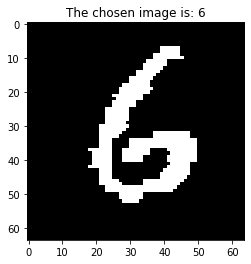

In [39]:
# Predicition (for now, the model is overfitted to the first 5000 samples in the original dataset)
test_num = 6000
test_input = train_set[test_num]
test_label = train_lab[test_num]

plt.figure()
plt.imshow(test_input, cmap="gray")
plt.title(f"The chosen image is: {test_label}")

In [40]:
test_input_tf = tf.convert_to_tensor(test_input, dtype=tf.complex64)
test_output = ONN_block(test_input_tf, training=False)

Text(0.5, 1.0, 'The output image')

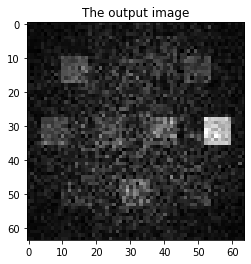

In [41]:
plt.figure()
plt.imshow(tf.abs(test_output), cmap="gray")
plt.title("The output image")